In [21]:
import pandas as pd
base = pd.read_csv('Datasets/MoviesOnStreamingPlatforms.csv')
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


In [22]:
base.head()

Unnamed: 0  ID                                     Title  Year  Age  \
0           0   1                              The Irishman  2019  18+   
1           1   2                                    Dangal  2016   7+   
2           2   3  David Attenborough: A Life on Our Planet  2020   7+   
3           3   4         Lagaan: Once Upon a Time in India  2001   7+   
4           4   5                                      Roma  2018  18+   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  
0          98/100        1     0            0        0     0  
1          97/100        1     0            0        0     0  
2          95/100        1     0            0        0     0  
3          94/100        1     0            0        0     0  
4          94/100        1     0            0        0     0

## Análisis de la data

In [23]:
cantidad_year = base.groupby(by='Year').count()[['ID']].reset_index()
cantidad_year.columns = ['Year','Amount']
cantidad_year

Year  Amount
0    1914       1
1    1915       2
2    1916       1
3    1919       1
4    1920       2
..    ...     ...
98   2017     831
99   2018     945
100  2019    1014
101  2020     862
102  2021     327

[103 rows x 2 columns]

In [62]:
def edades_permitidas(year):
    base_filtrada_year = base[base['Year']==year]

    cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
    cantidad_year.columns = ['Age','Amount']
    return cantidad_year

In [25]:
def select_characters(n):
    try:
        return n[:2]
    except:
        return 0

# Método 1: Puede tener errores con pelis que tengan 100/100
base['Ranking'] = base['Rotten Tomatoes'].apply(select_characters).astype(int)

# Método 2: Utilizando el método split
base['Ranking'] = base['Rotten Tomatoes'].str.split('/',expand=True)[0].fillna(0).astype(int)

year = 1980
base_filtrada_year = base[base['Year']==year]

base_filtrada_year.sort_values(by='Ranking',ascending=False)[:10][['Title','Age']].reset_index(drop=True)

Title  Age
0                Star Wars: The Empire Strikes Back   7+
1                                  The Elephant Man   7+
2                                        Caddyshack  18+
3                                   The Long Riders  18+
4                                        Motel Hell  18+
5  Bon Voyage, Charlie Brown (and Don't Come Back!)  all
6                        Return to the 36th Chamber  18+
7                           Clan of the White Lotus  13+
8                                     The Big Brawl  18+
9                                   The Jazz Singer   7+

In [63]:
def plataforma(year):
    base_filtrada_year = base[base['Year']==year]
    
    return base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum()

## Gráficos

In [70]:
import altair as alt

years = base[base['Year'] >= 1990]['Year'].unique()
years.sort()
 
for year in years:
    base_filtrada_year = base[base['Year']==year]
    cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
    cantidad_year.columns = ['Age','Amount']
    cantidad_year['Year'] = year
 
    if year == years[0]:
        df = cantidad_year
    else:
        df = pd.concat([df,cantidad_year])
 
df['Year'] = df['Year'].astype(str)
chart = alt.Chart(df).mark_bar().encode(
    x='Year:O',
    y='Amount:Q',
    color='Age:N'
)
chart

alt.Chart(...)

In [41]:
import matplotlib.pyplot as plt
def histograma_grafico(year):
    base_filtrada_year = base[base['Year']==year]

    cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
    cantidad_year.columns = ['Age','Amount']
    cantidad_year

    # Crear el gráfico de barras usando Matplotlib
    plt.figure(figsize=(10, 6))  # Configura el tamaño del gráfico
    plt.bar(cantidad_year['Age'], cantidad_year['Amount'], color='blue')  # Crea barras

    # Añadiendo título y etiquetas
    plt.title('Cantidad por Edad en el Año 1999')
    plt.xlabel('Edad')
    plt.ylabel('Cantidad')

    # Mostrar valores en las barras
    for i, v in enumerate(cantidad_year['Amount']):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

    # Mostrar el gráfico
    plt.savefig(f'images/histogram_age_year_{year}.png')
    plt.close()


In [42]:
import matplotlib.pyplot as plt

def dona_grafico(year):    
    base_filtrada_year = base[base['Year']==year]
    cantidad_year = base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum().reset_index()
    cantidad_year.columns = ['Platform','Amount']
    
    plt.figure(figsize=(6, 6))
    plt.pie(cantidad_year['Amount'], labels=cantidad_year['Platform'], autopct='%1.1f%%', wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
    plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
    plt.title('Donut Chart: Movies by Platform')
    plt.savefig(f'images/donuts_platform_year_{year}.png')
    plt.close()

## Generación de PDF

In [2]:
from fpdf import FPDF

class PDFWithBackground(FPDF):
    def __init__(self):
        super().__init__()
        self.background = None

    def set_background(self, image_path):
        self.background = image_path

    def add_page(self, orientation=''):
        super().add_page(orientation)
        if self.background:
            self.image(self.background, 0, 0, self.w, self.h)

    def footer(self):
        # Posición a 1.5 cm desde el fondo
        self.set_y(-15)
        # Configurar la fuente para el pie de página
        self.set_font('Arial', 'I', 8)
        # Número de página
        self.cell(0, 10, 'Página ' + str(self.page_no()), 0, 0, 'C')
    

/Users/luis/Desktop/Movie_App/Env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/Users/luis/Desktop/Movie_App/Env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


El año 1917 no se encuentra en la base
El año 1918 no se encuentra en la base


/Users/luis/Desktop/Movie_App/Env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


El año 1921 no se encuentra en la base


/Users/luis/Desktop/Movie_App/Env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


El año 1924 no se encuentra en la base


/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_5520/1229280053.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))
/Users/luis/Desktop/Movie_App/Env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


El año 1926 no se encuentra en la base


''

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


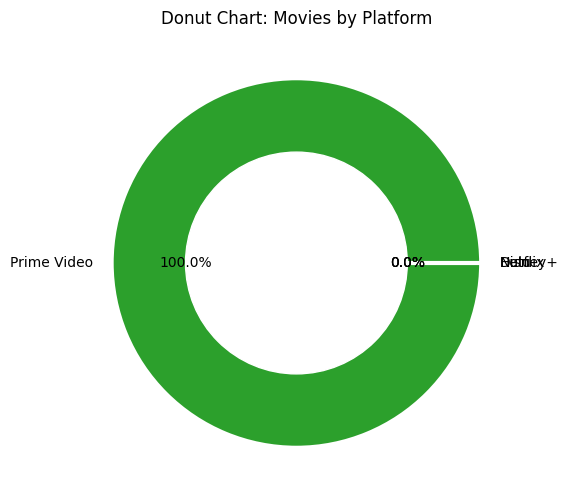

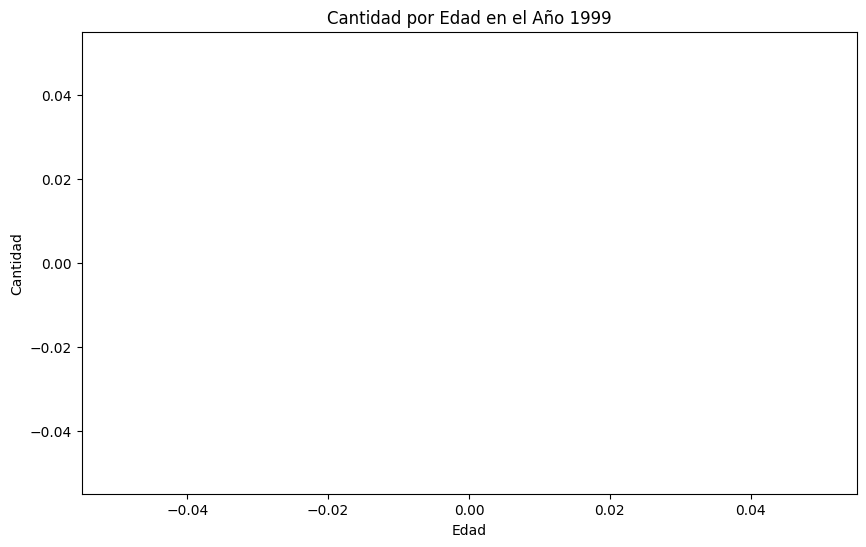

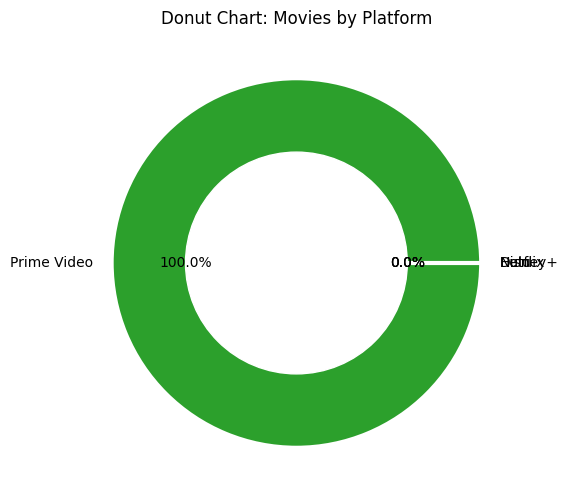

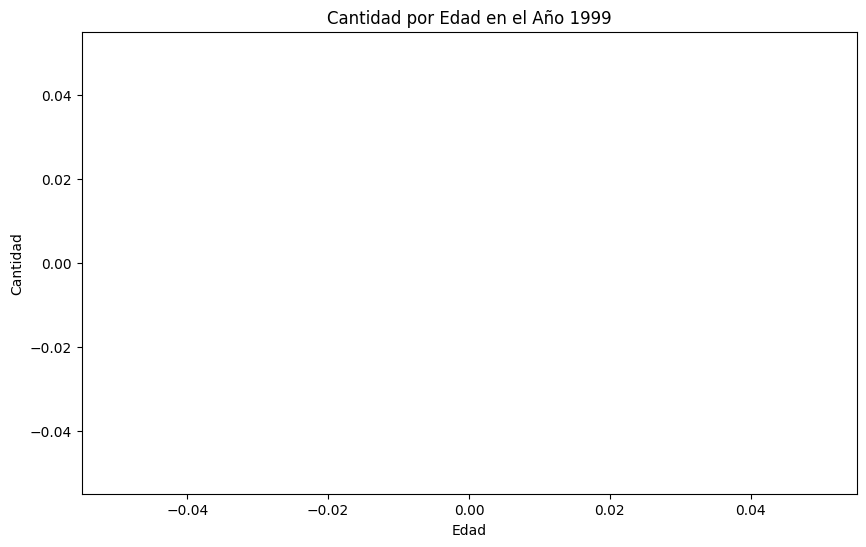

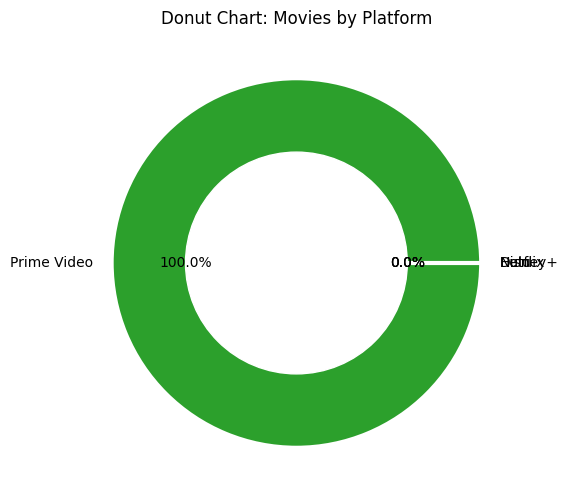

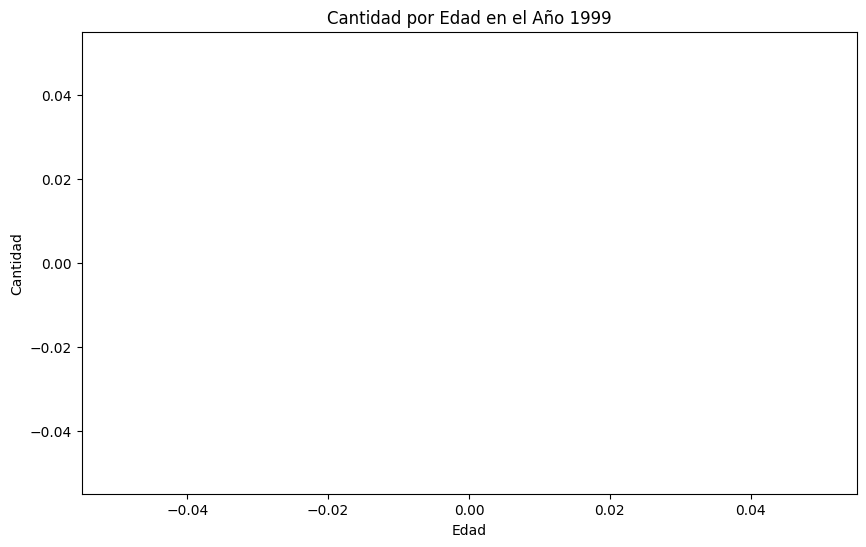

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 600x600 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 600x600 with 1 Axes>

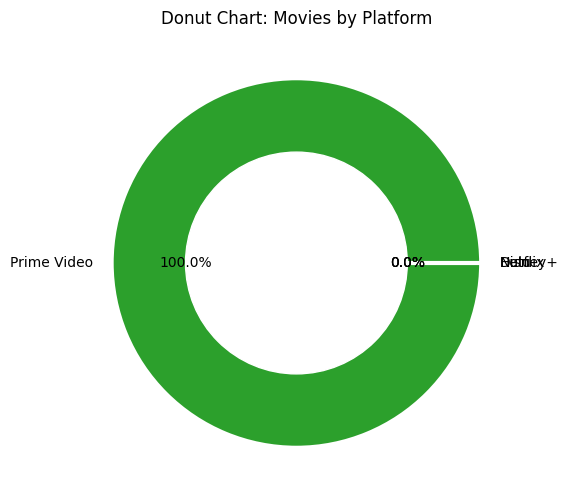

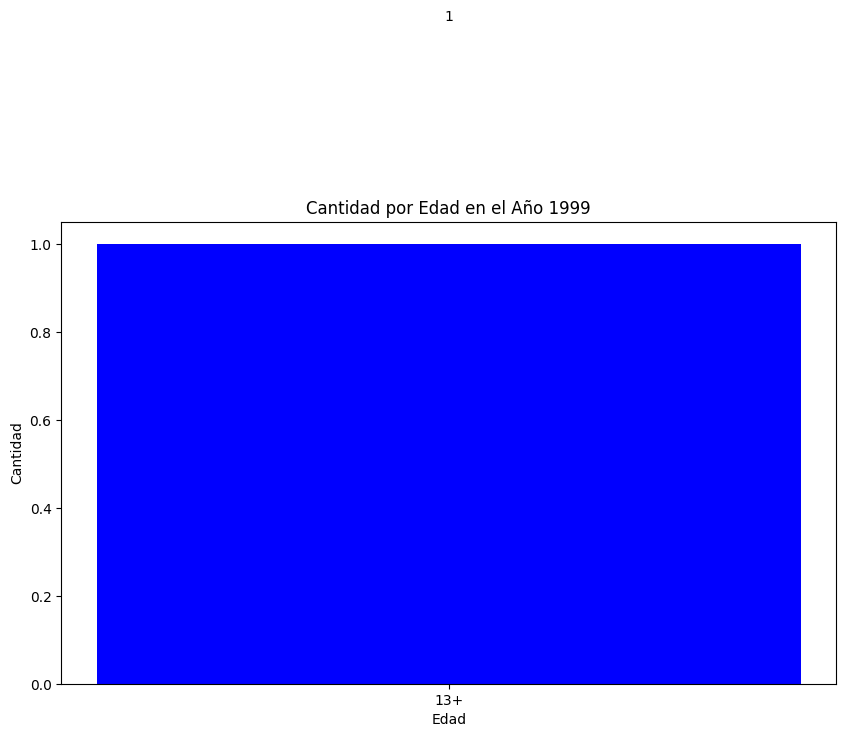

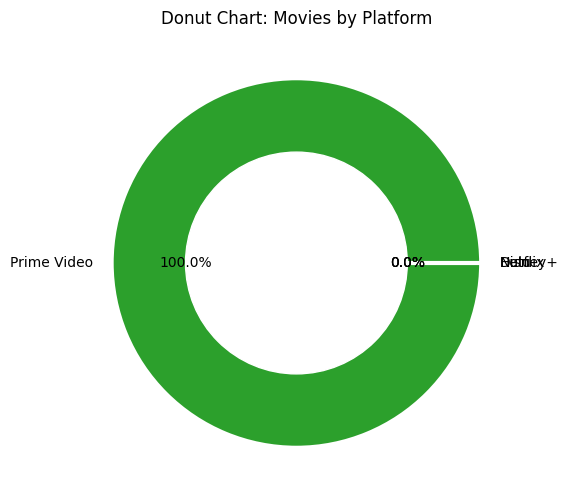

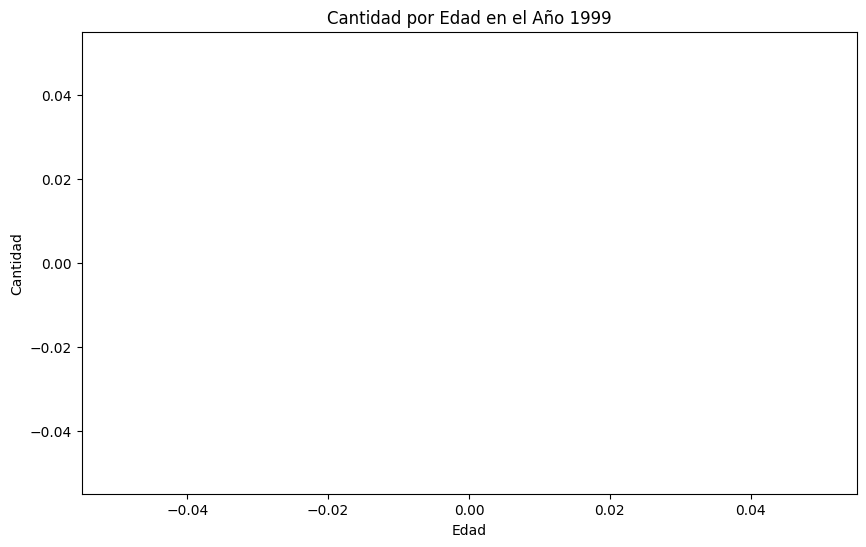

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 600x600 with 1 Axes>

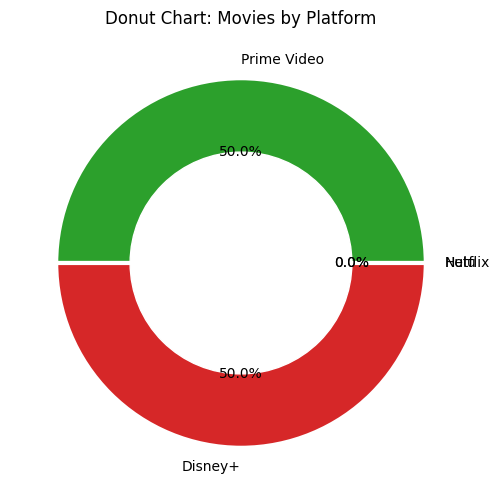

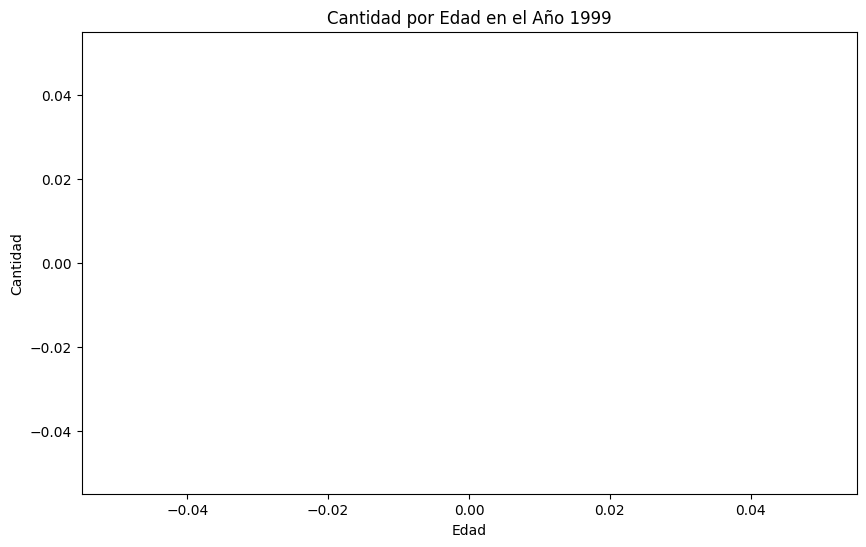

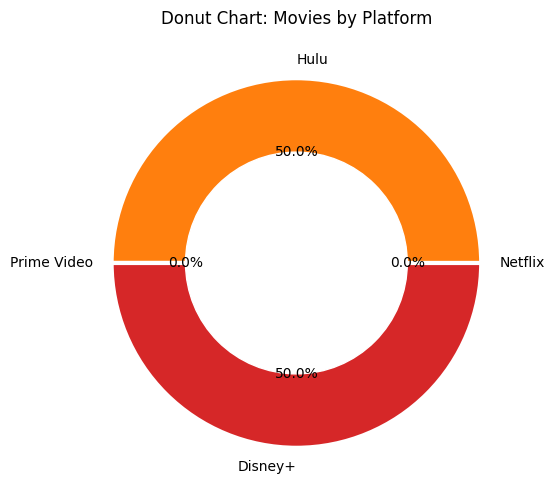

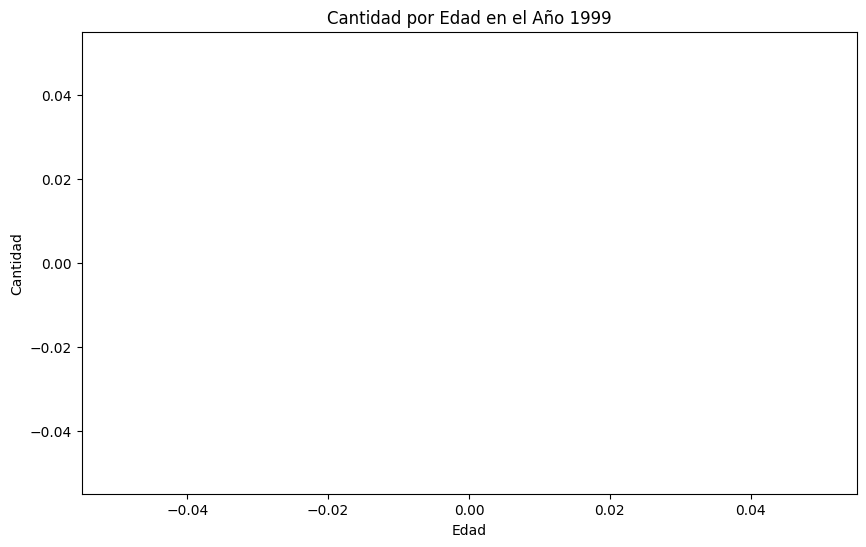

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 600x600 with 1 Axes>

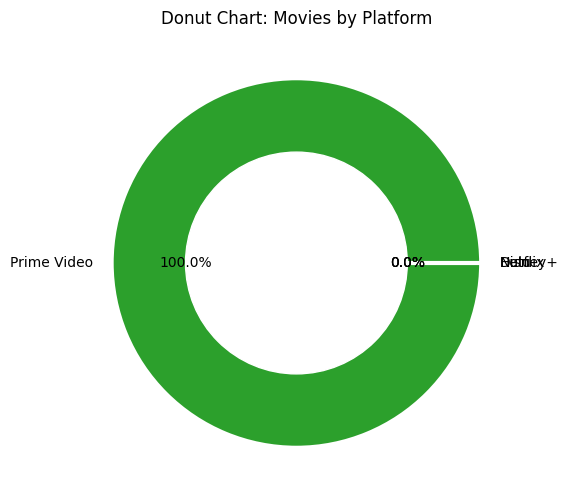

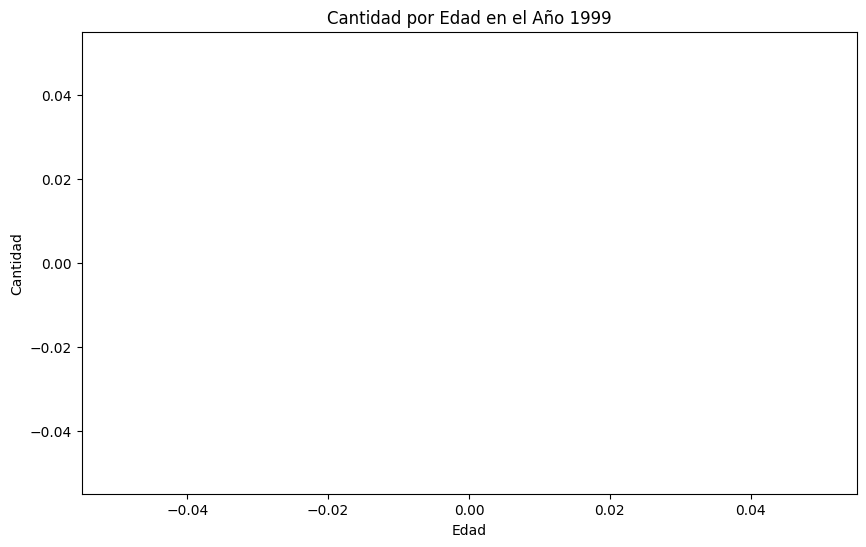

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 600x600 with 1 Axes>

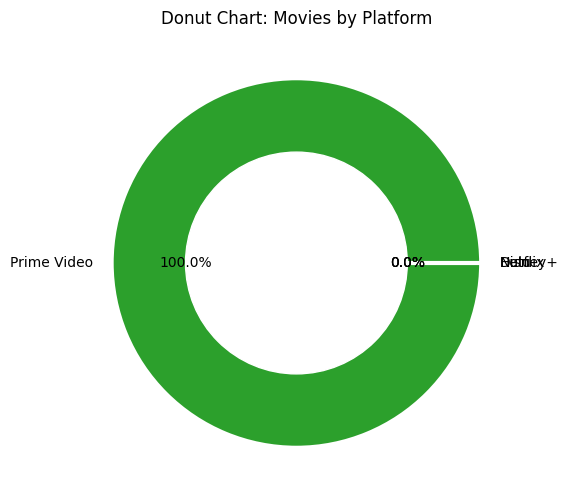

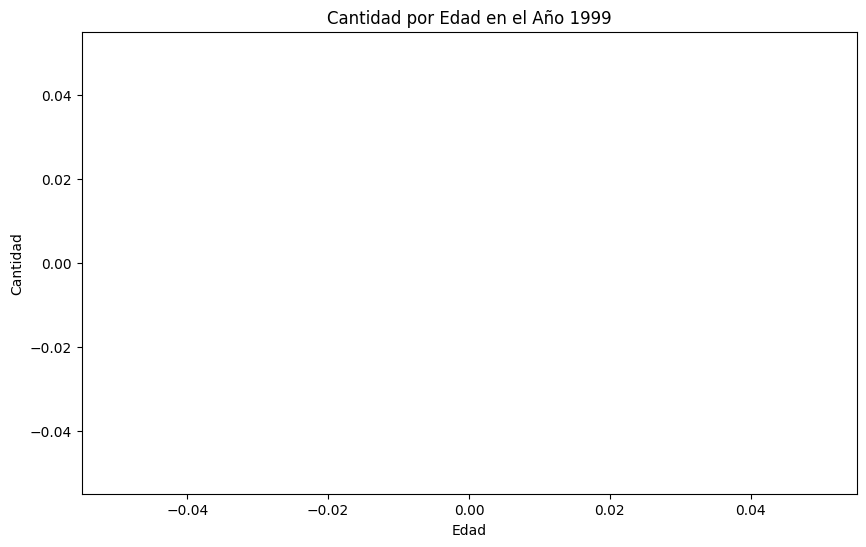

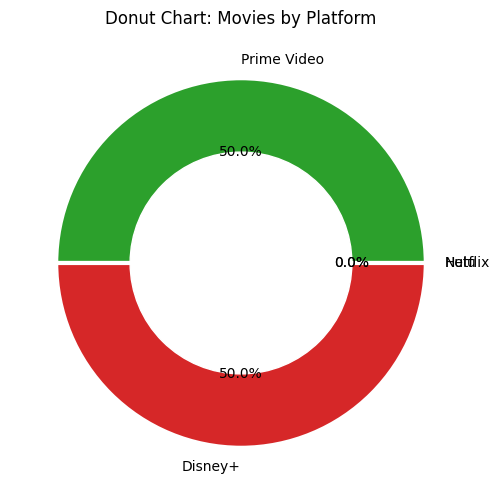

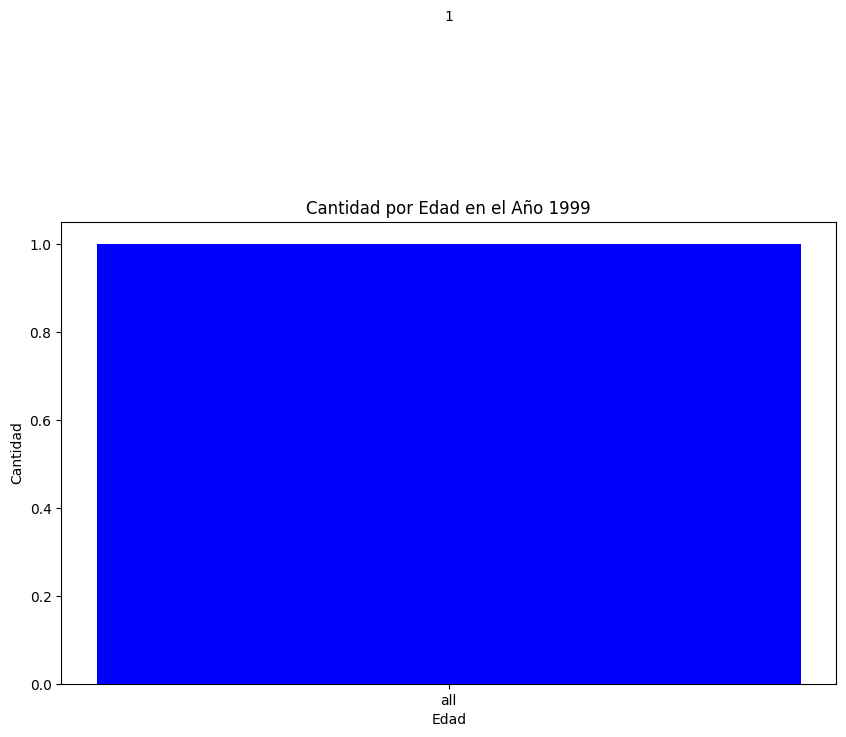

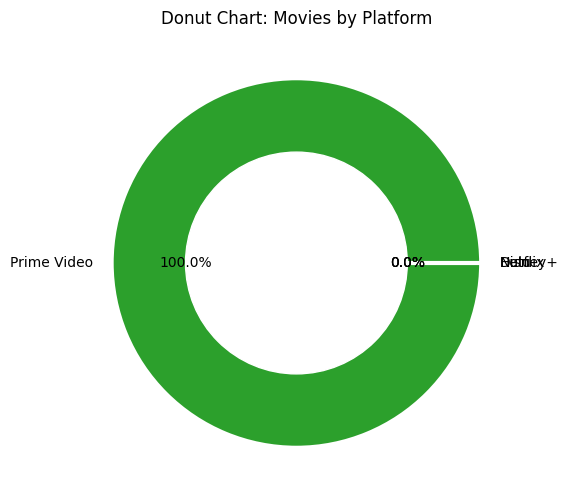

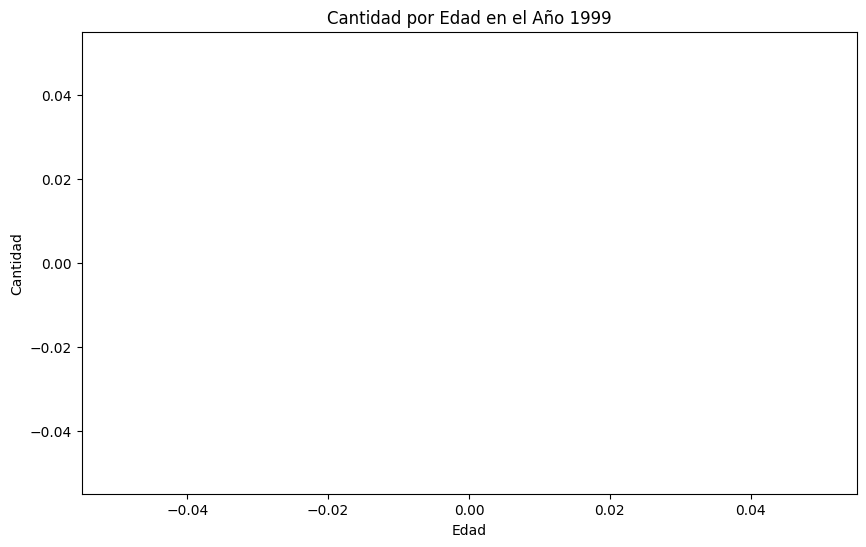

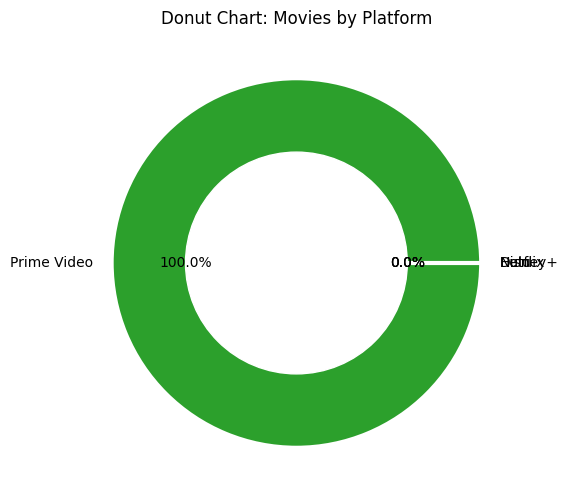

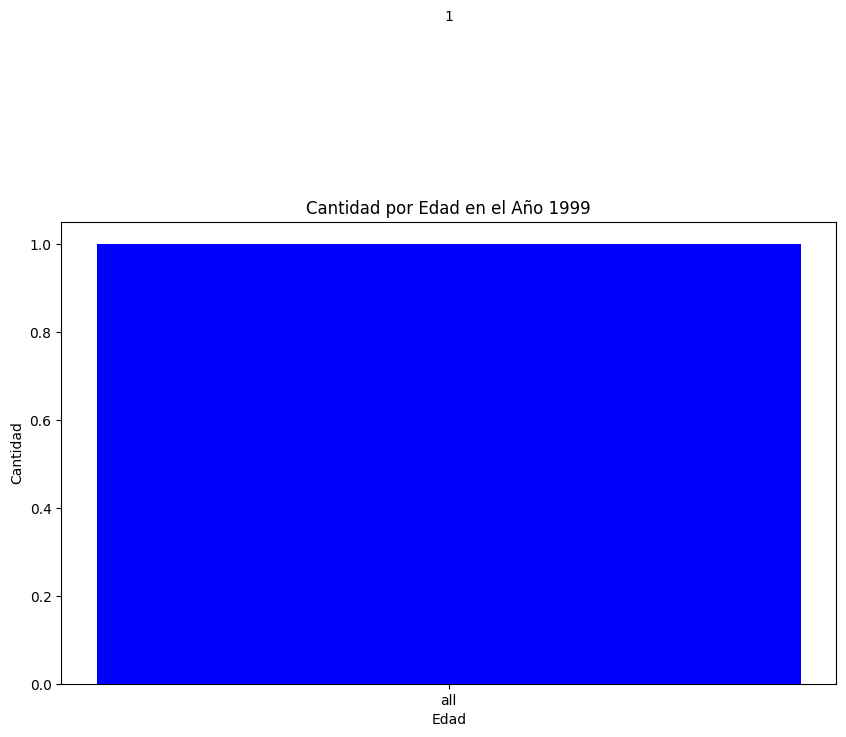

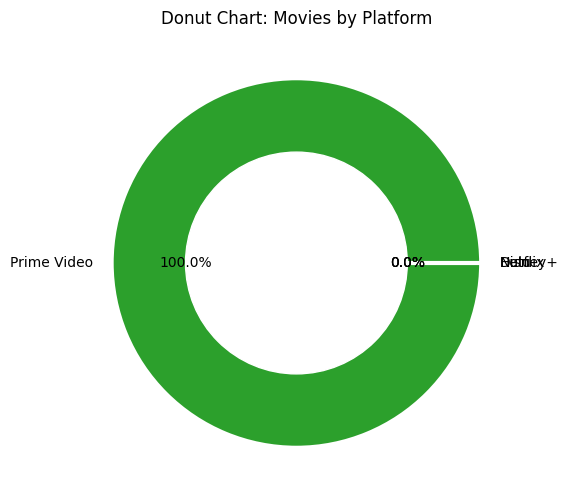

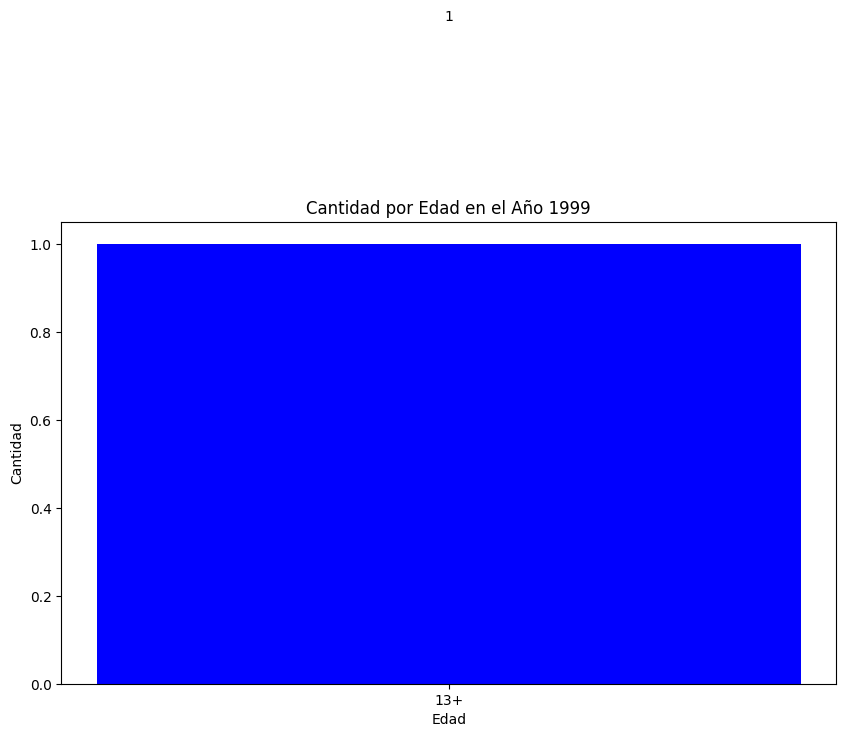

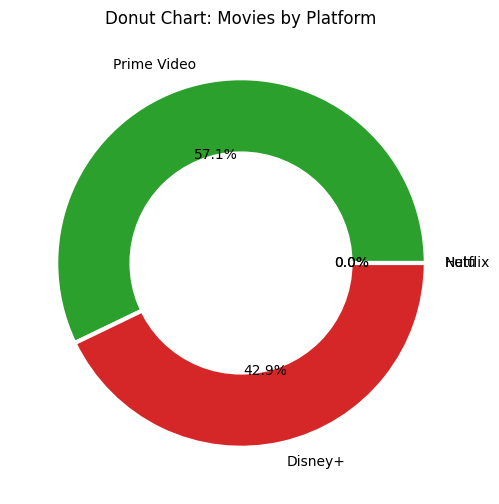

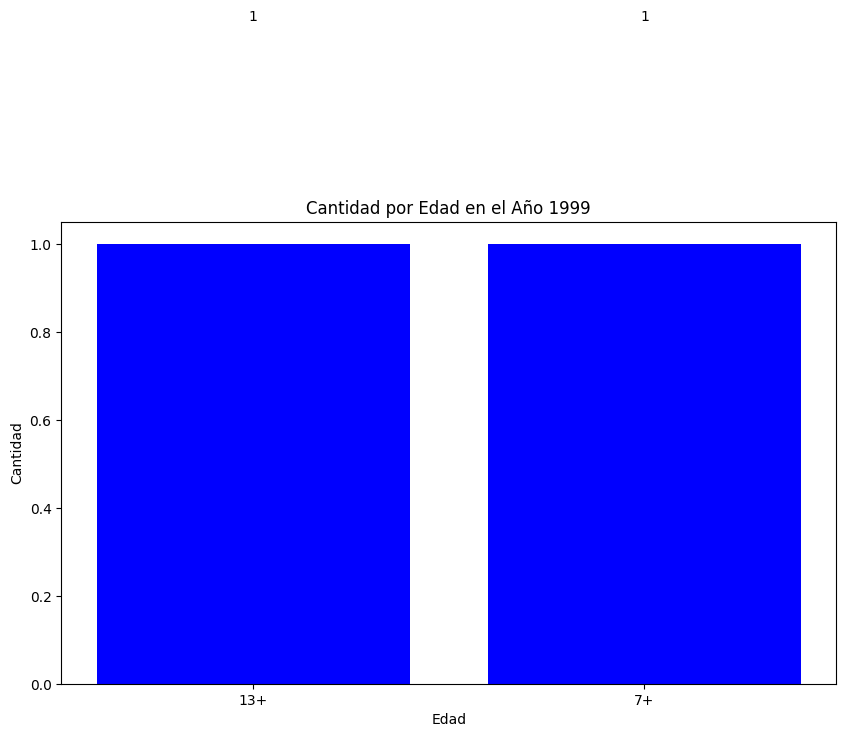

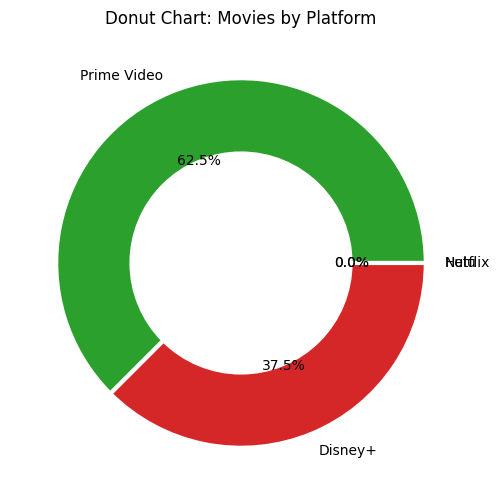

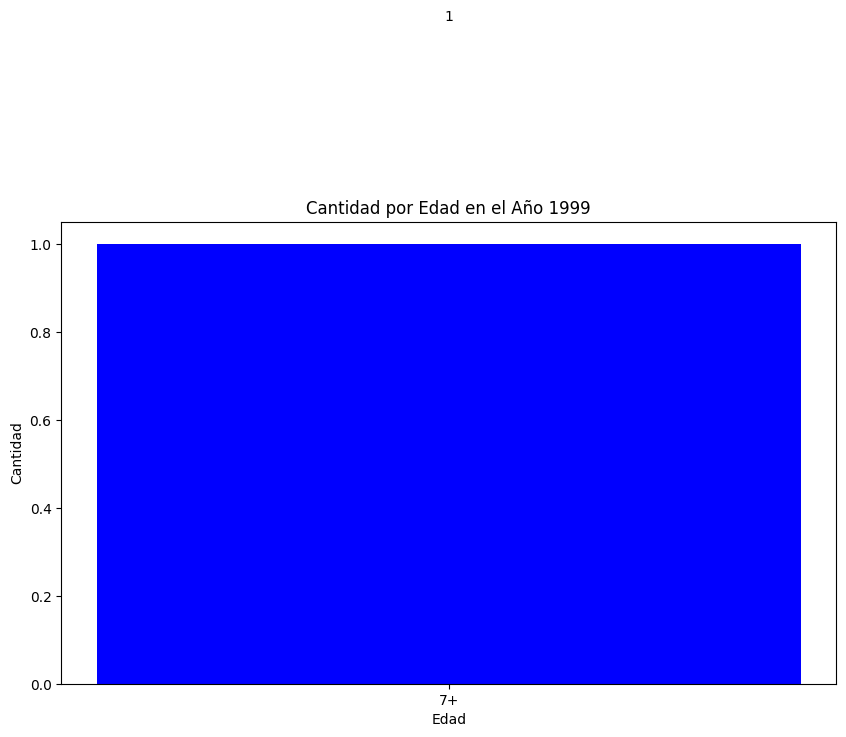

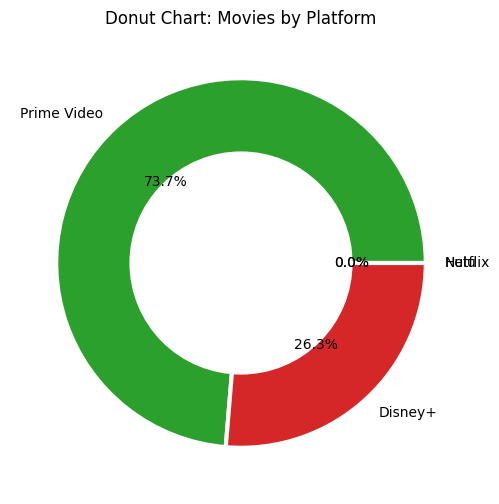

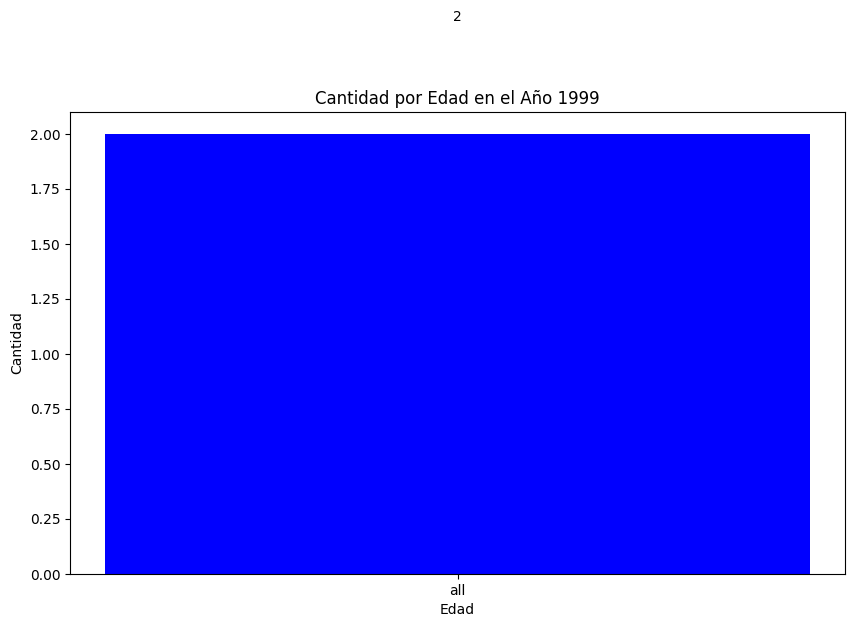

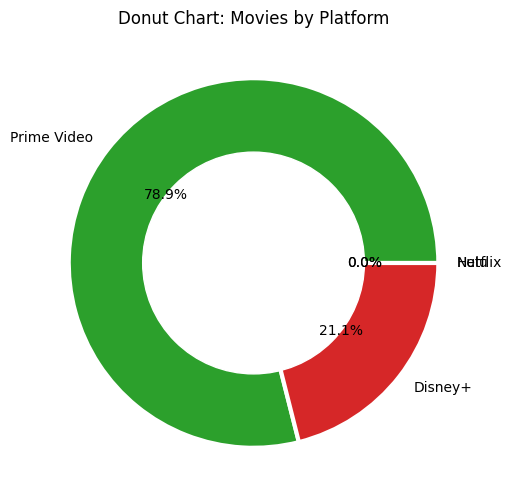

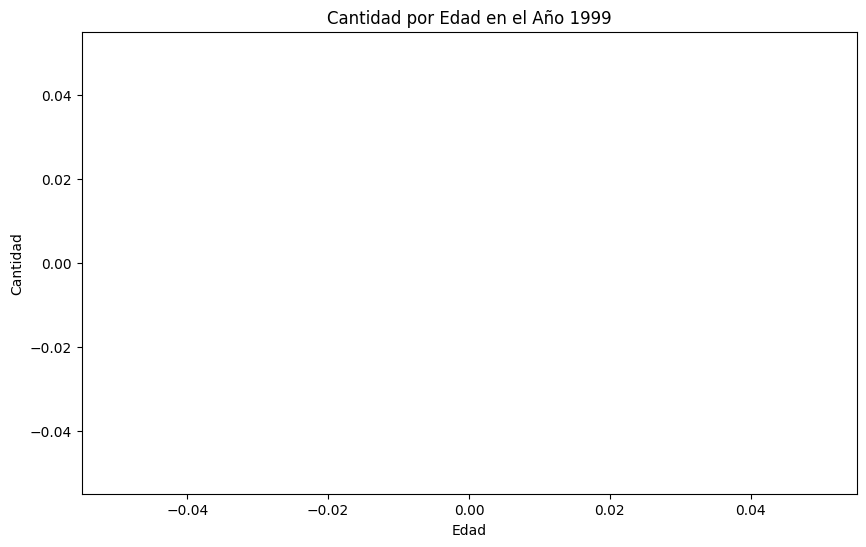

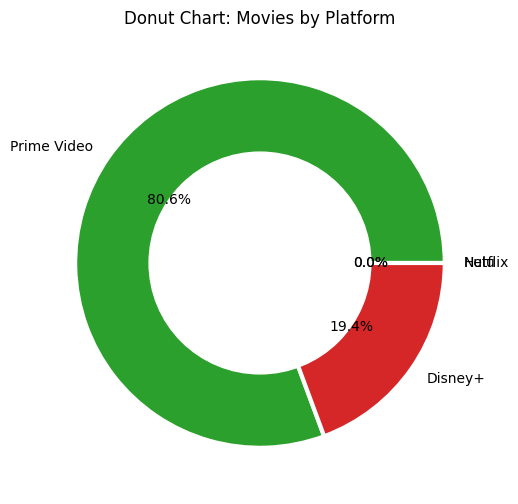

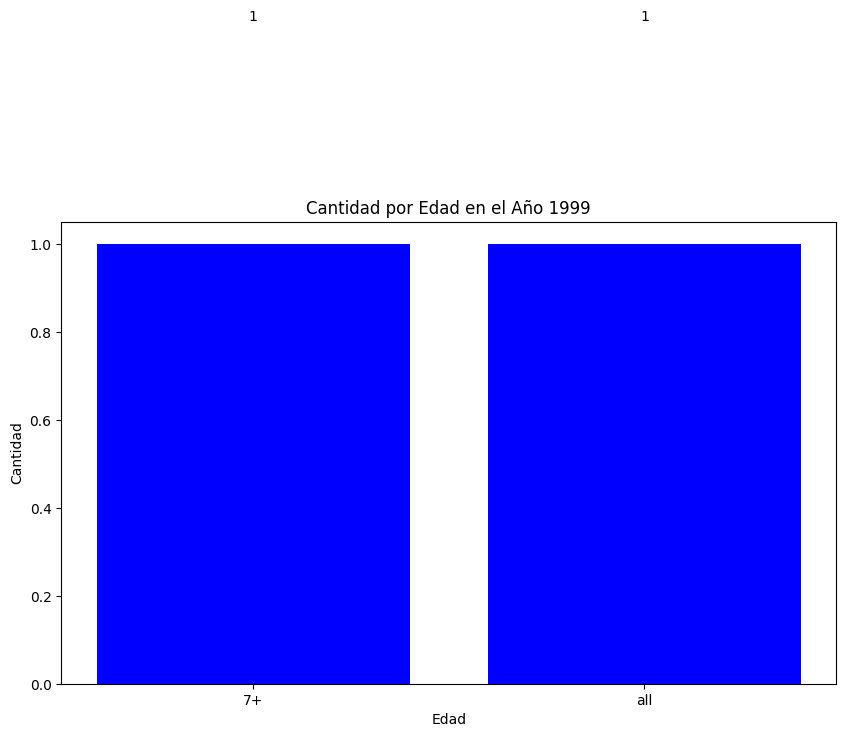

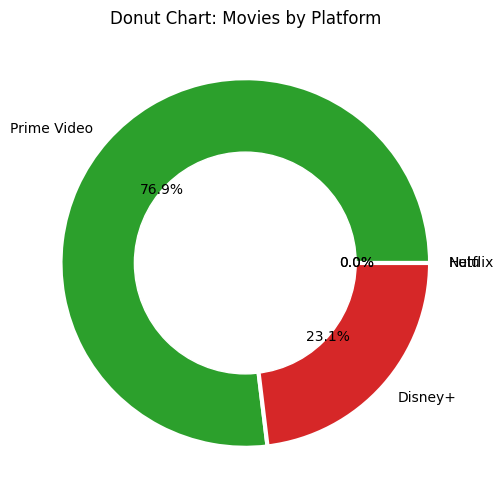

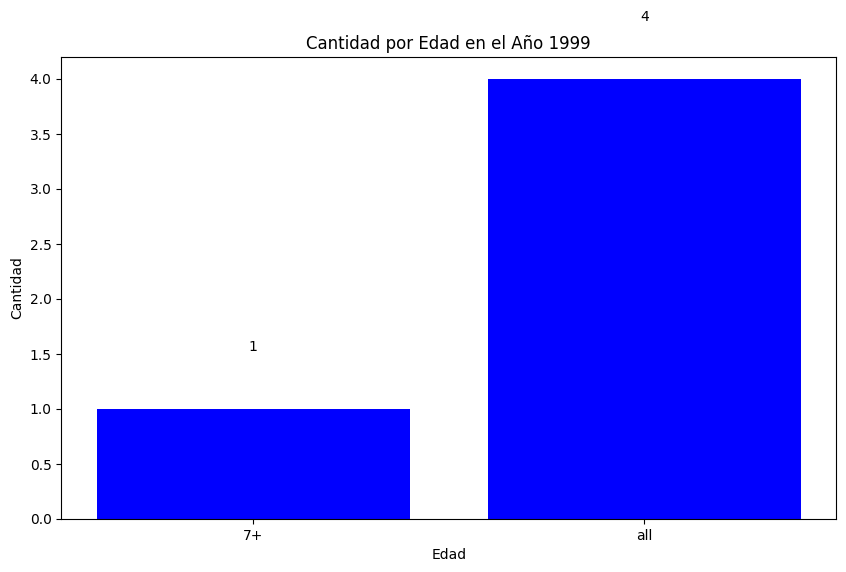

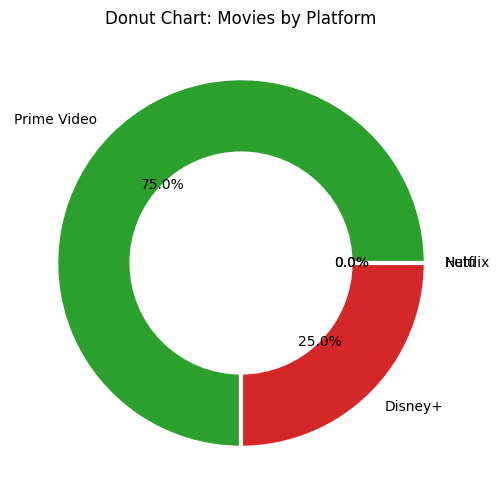

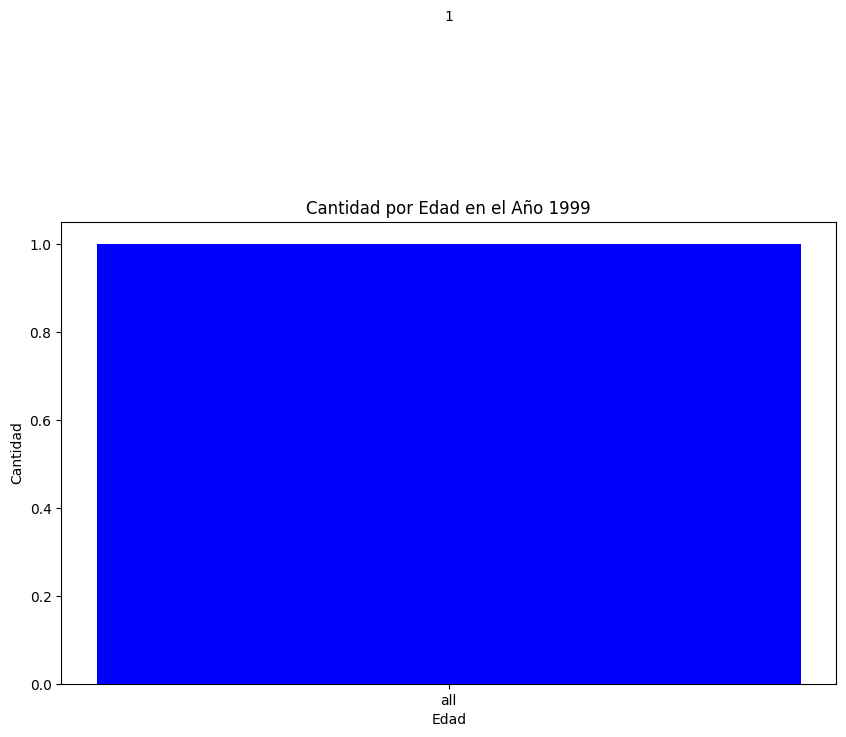

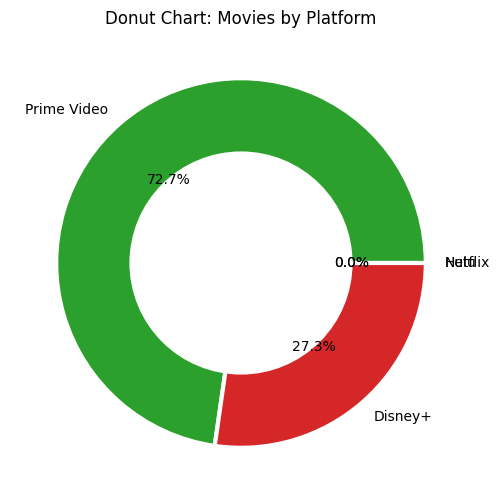

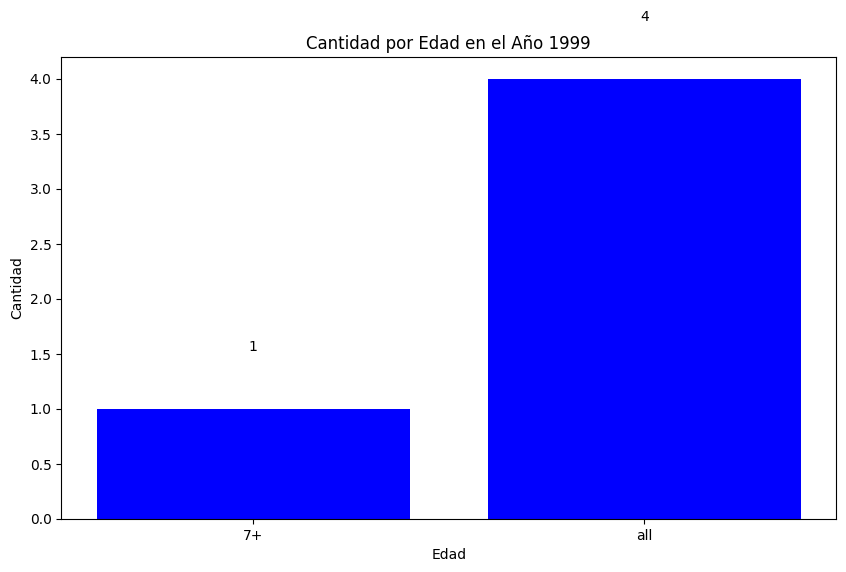

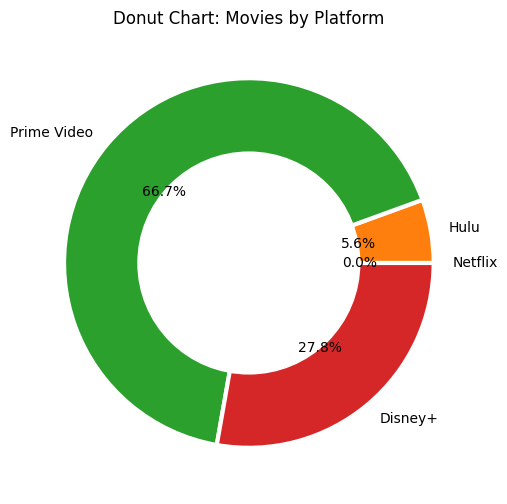

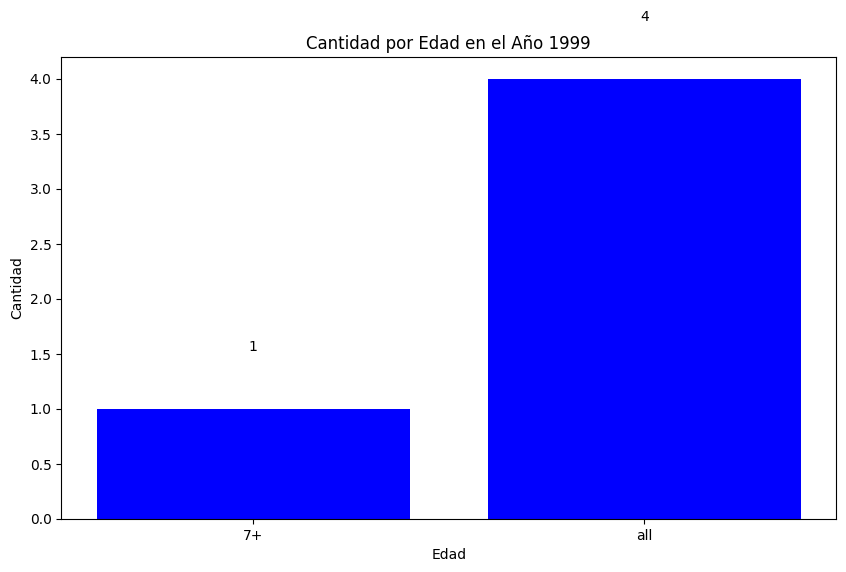

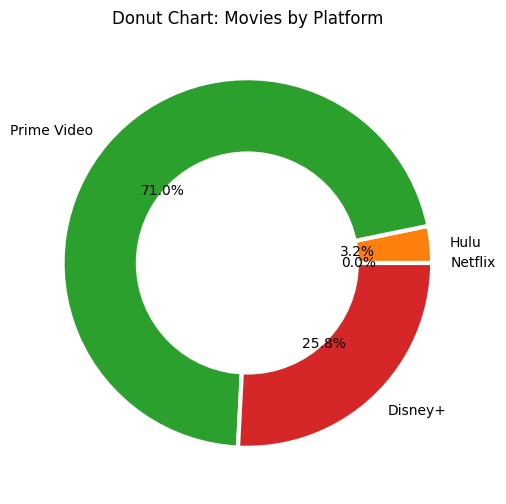

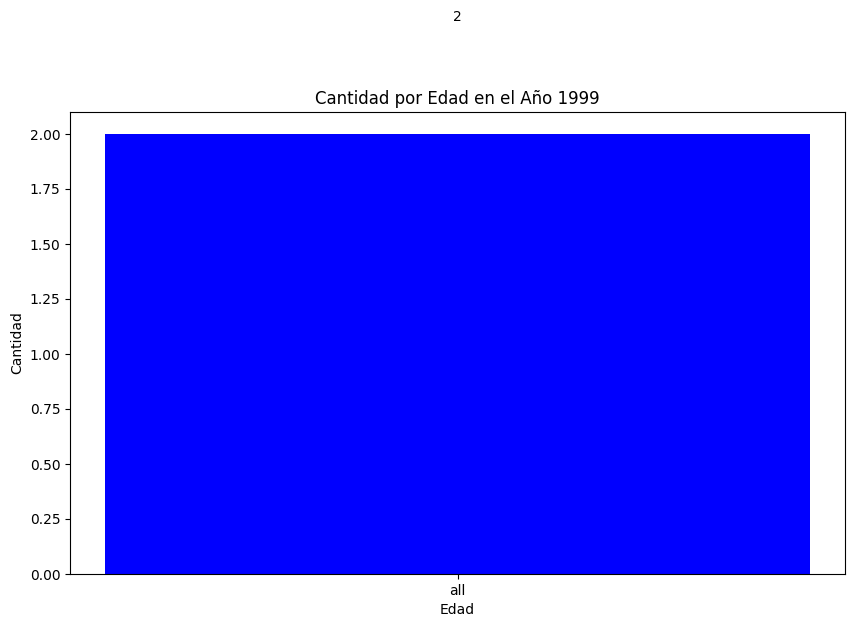

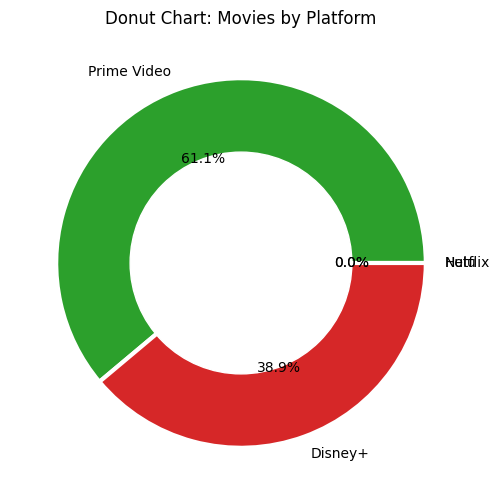

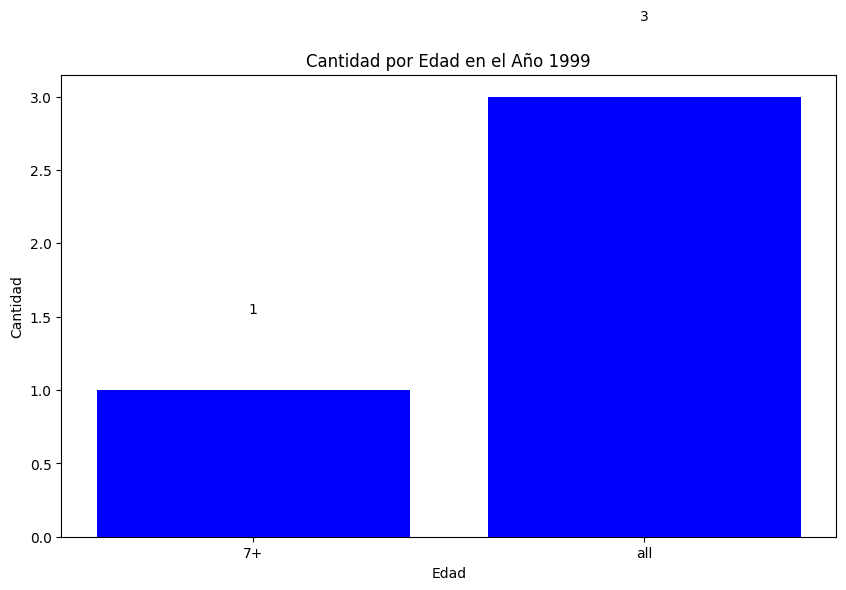

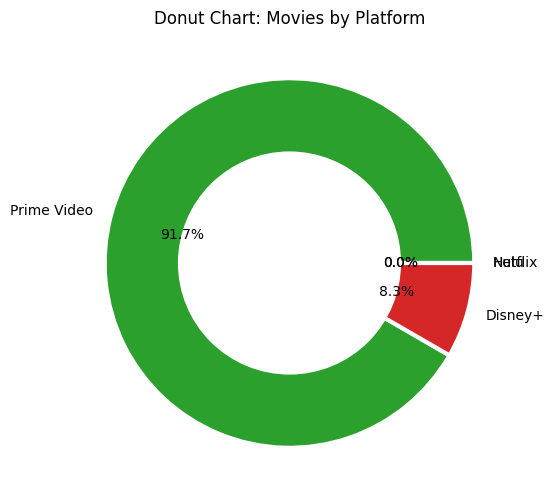

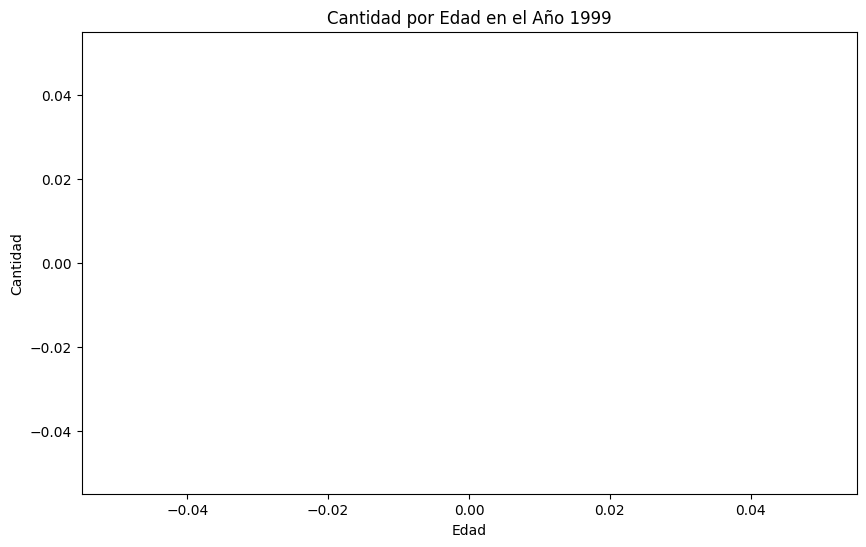

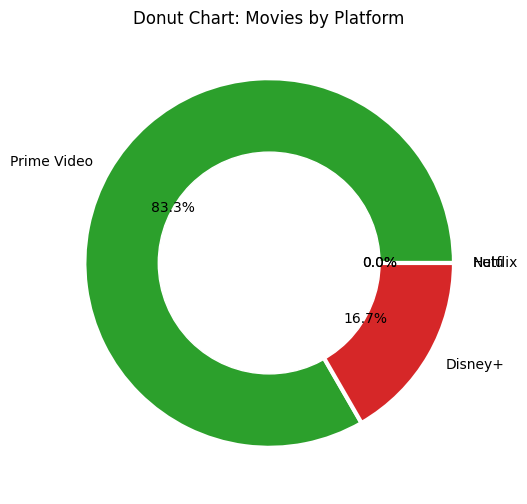

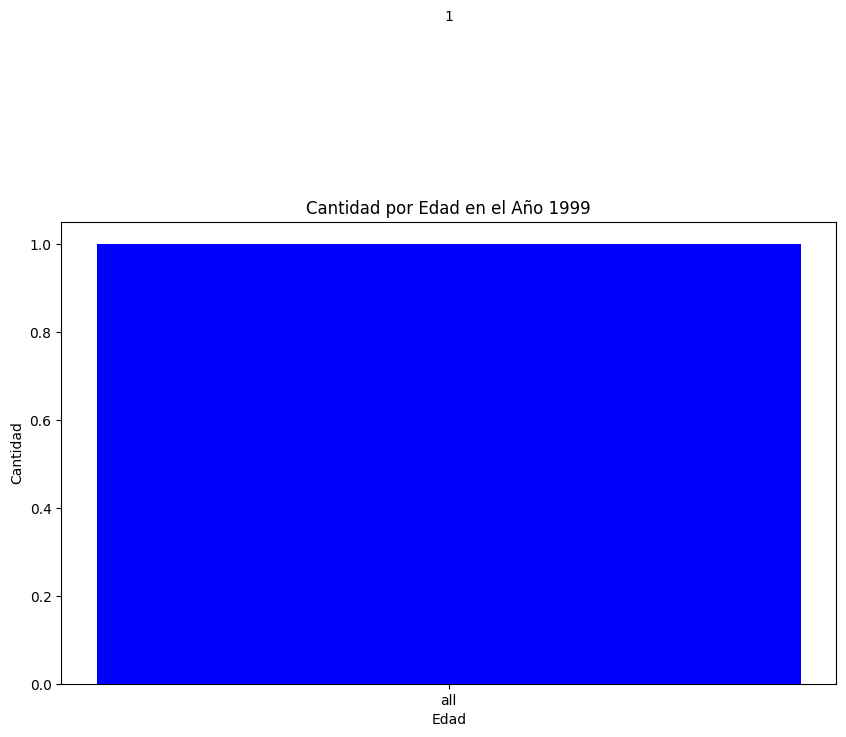

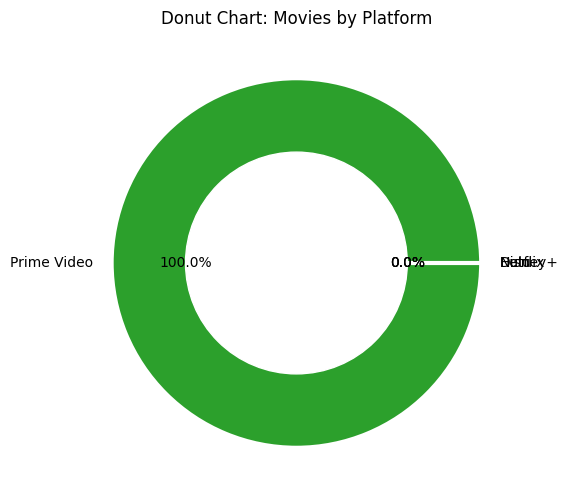

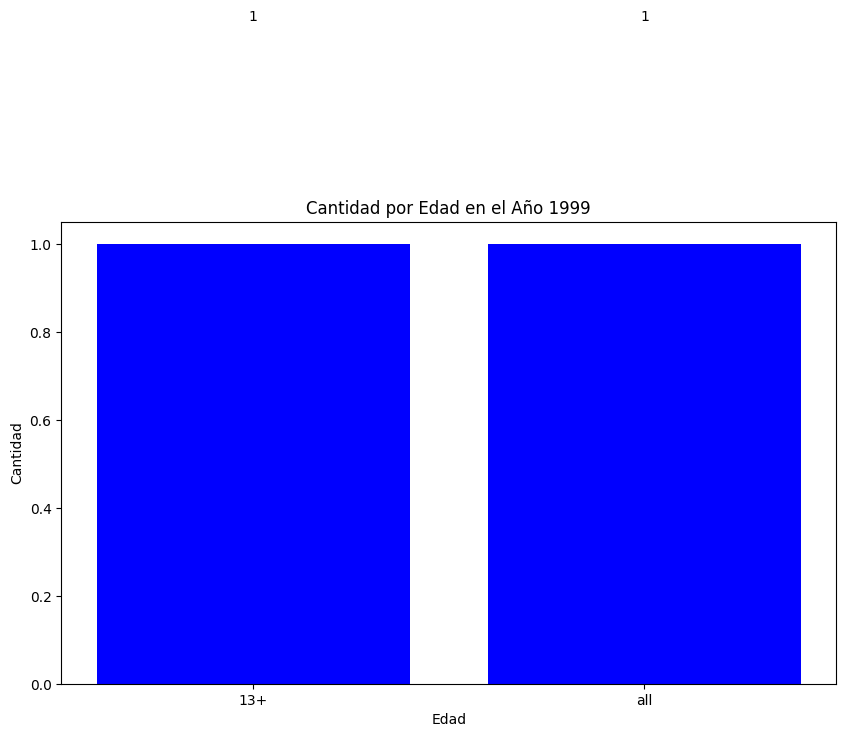

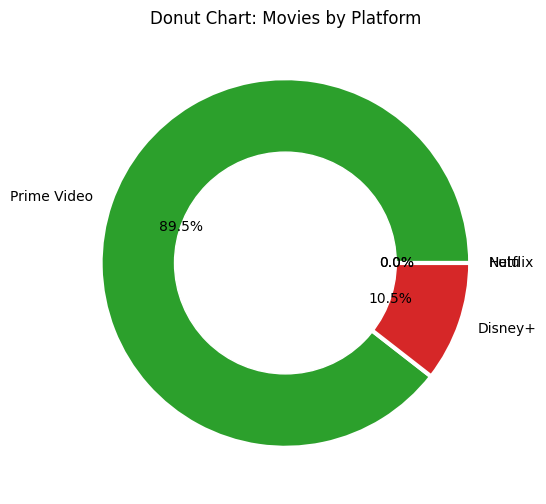

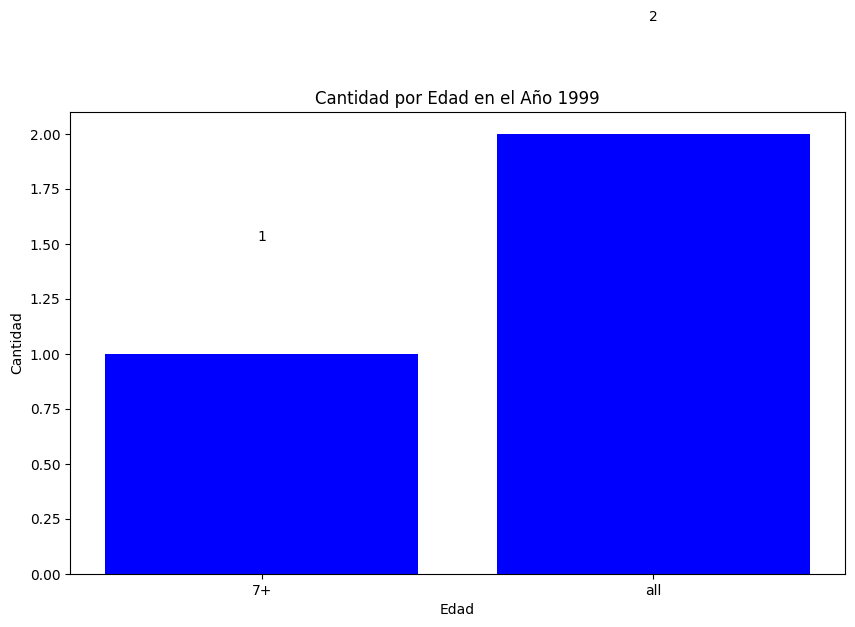

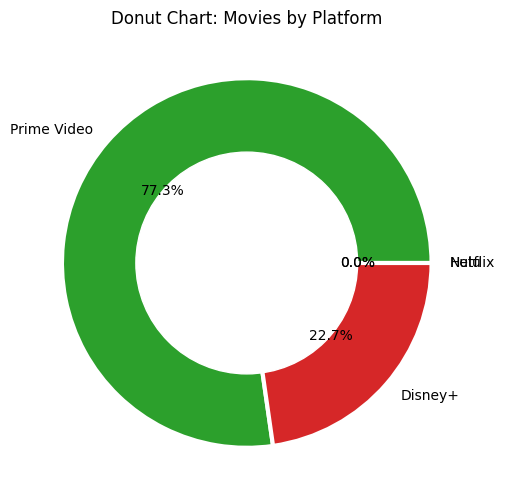

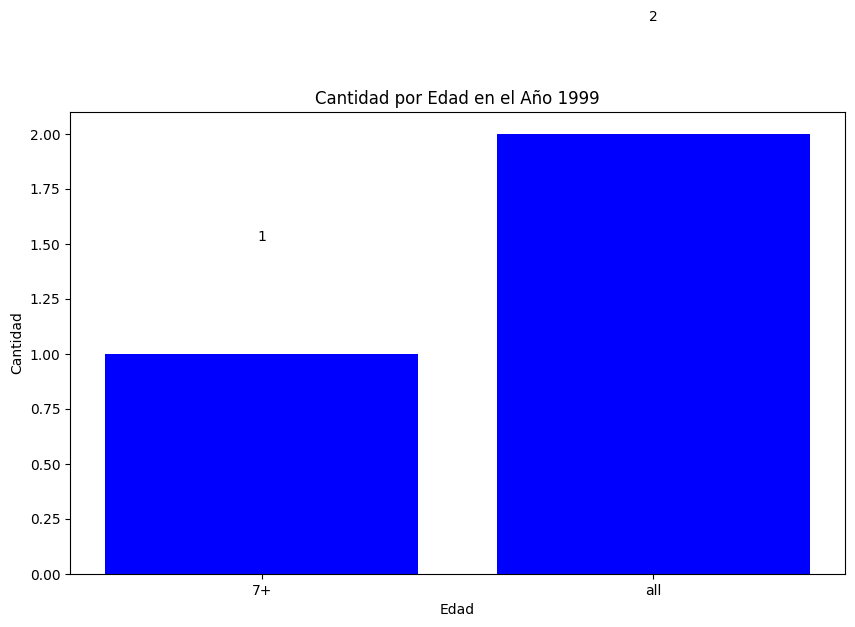

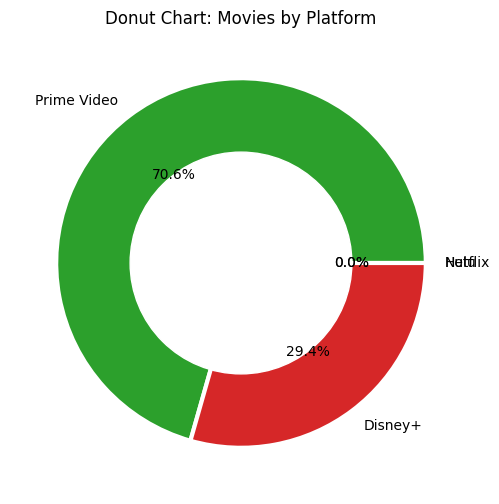

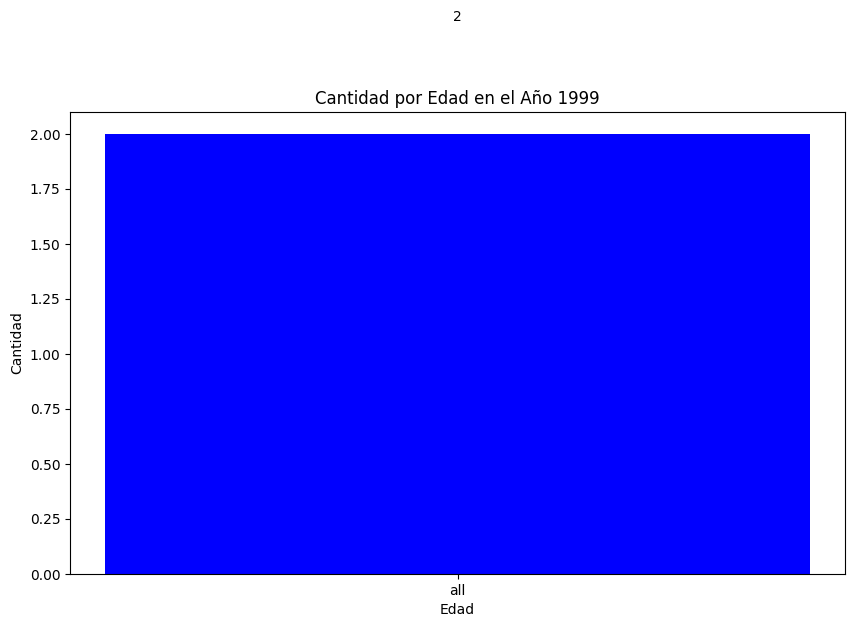

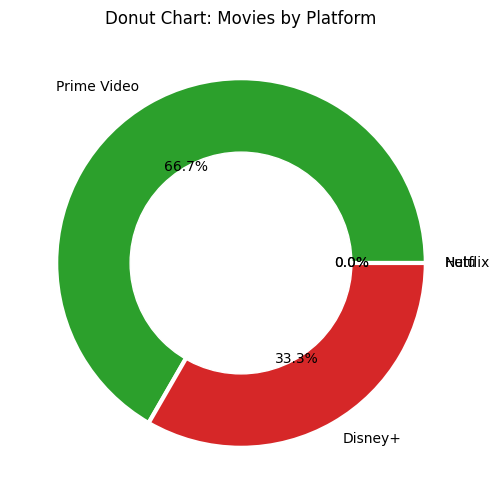

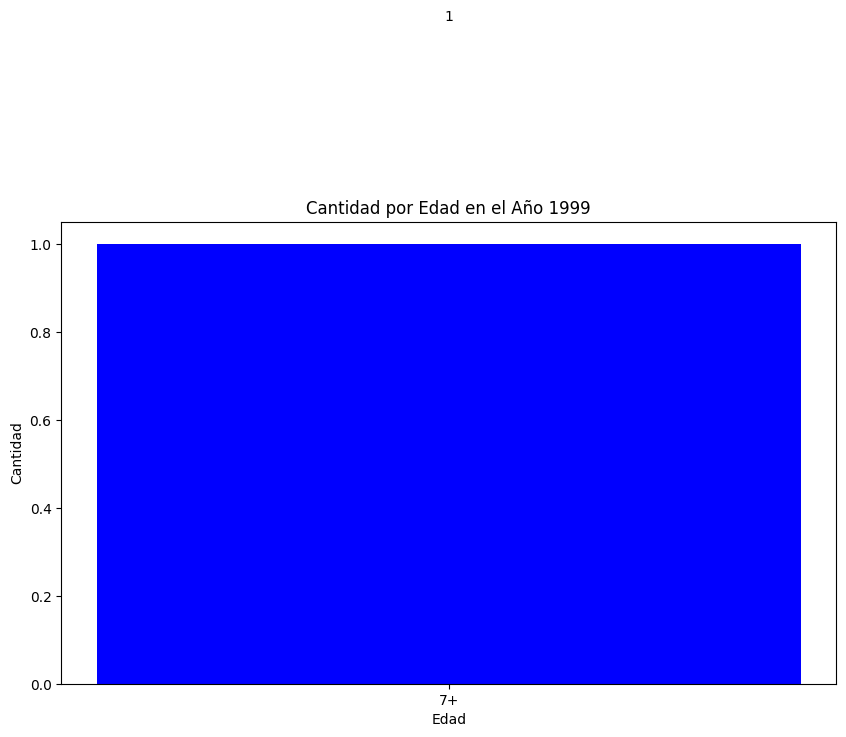

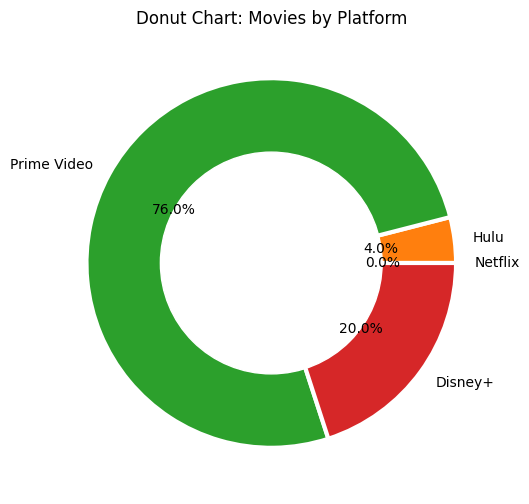

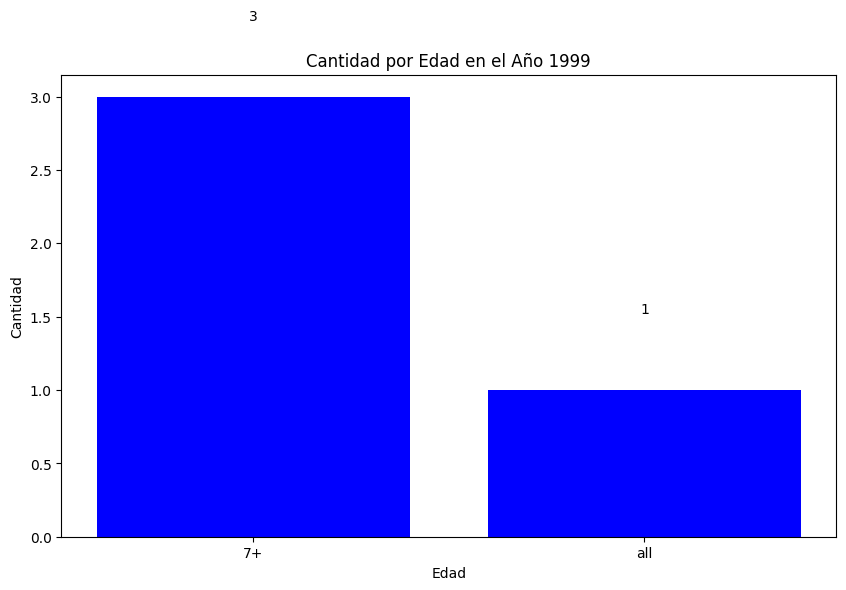

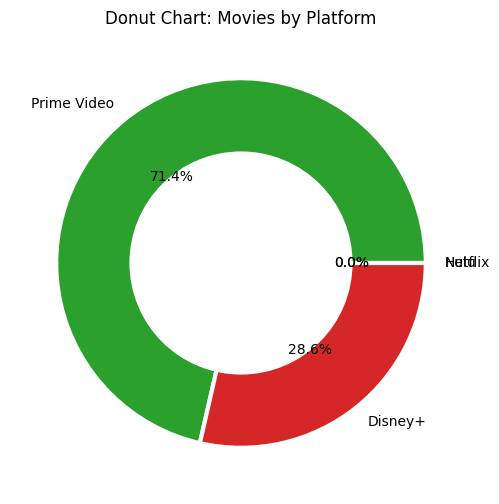

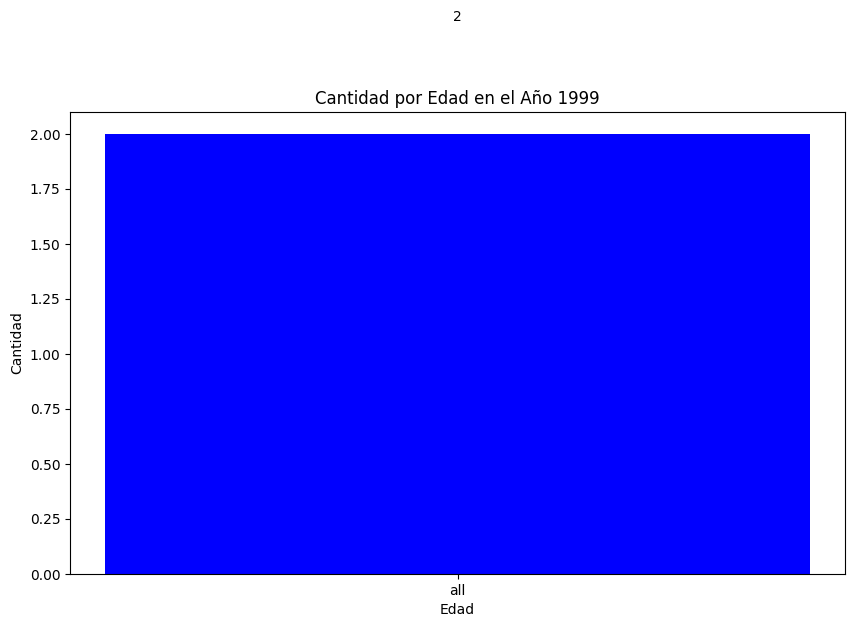

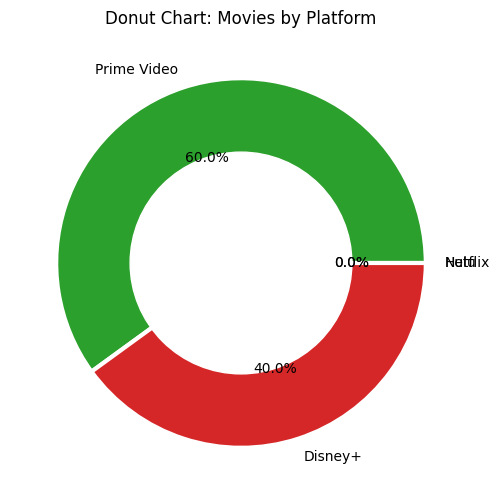

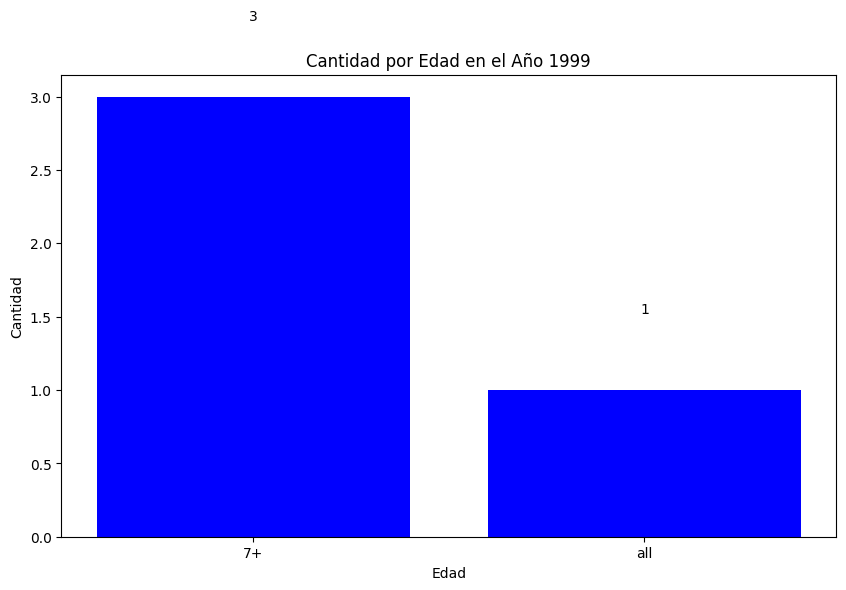

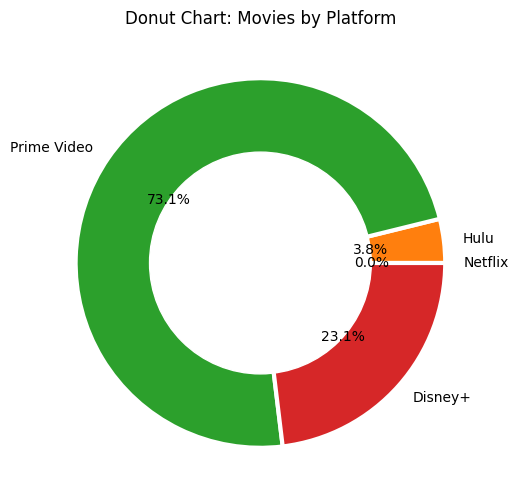

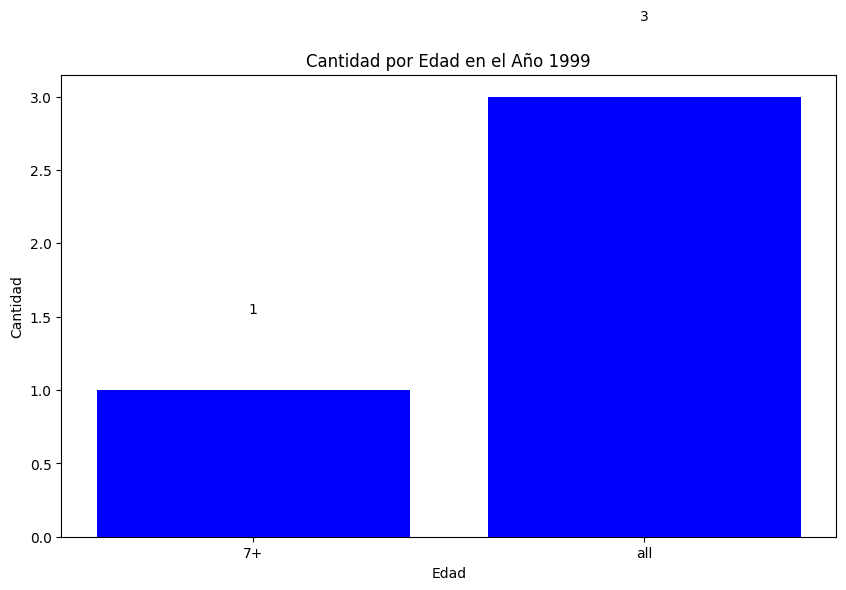

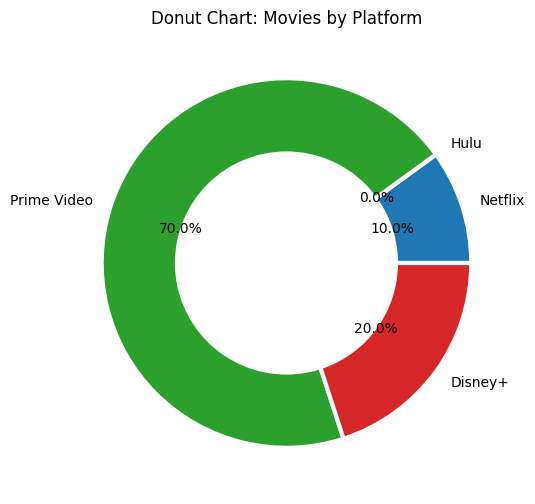

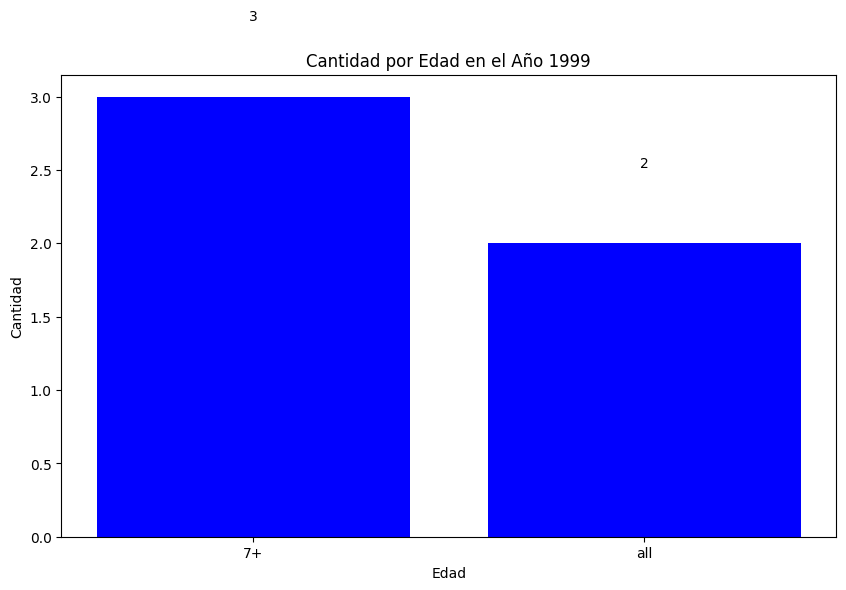

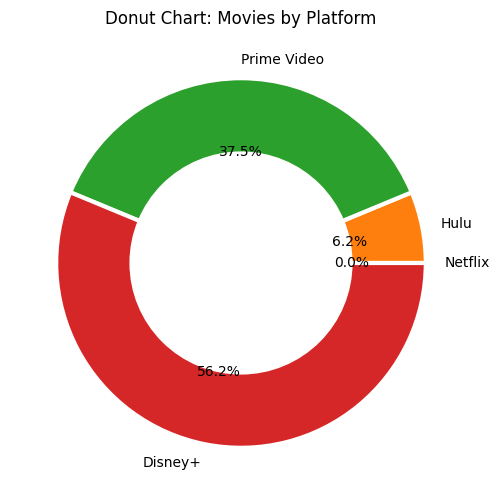

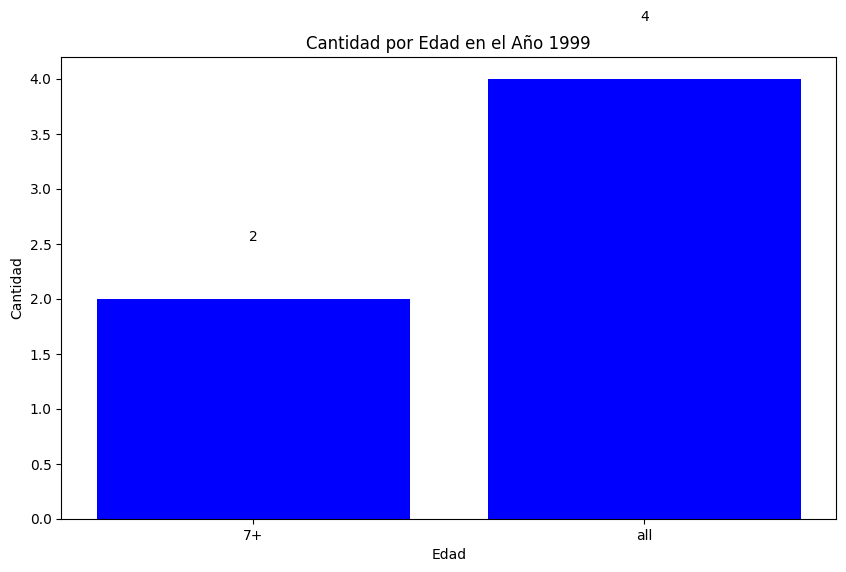

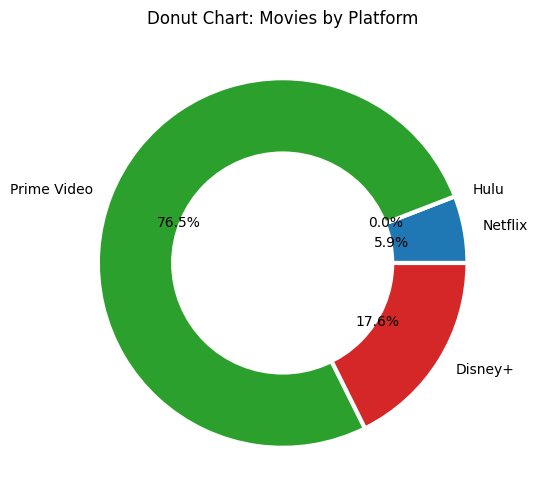

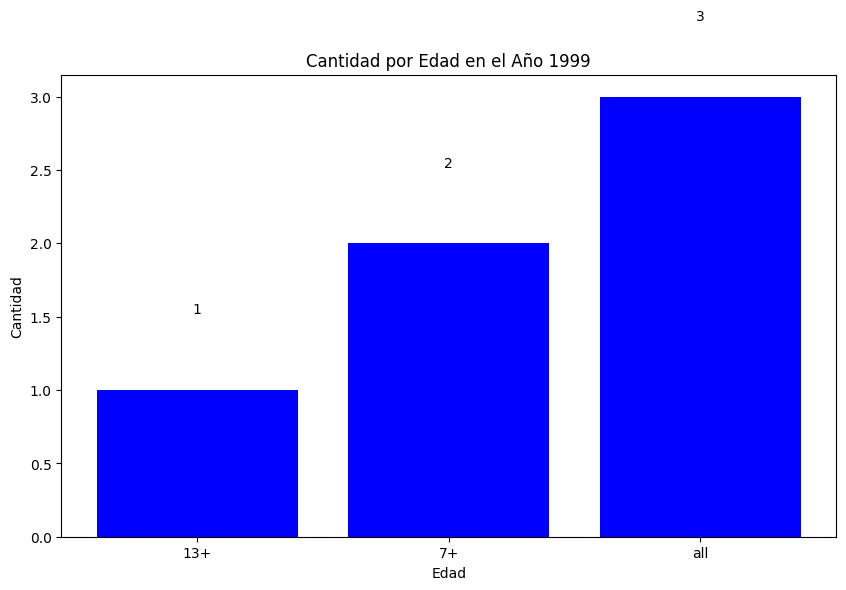

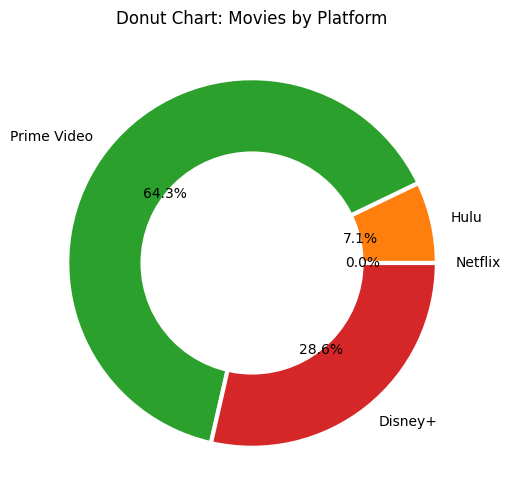

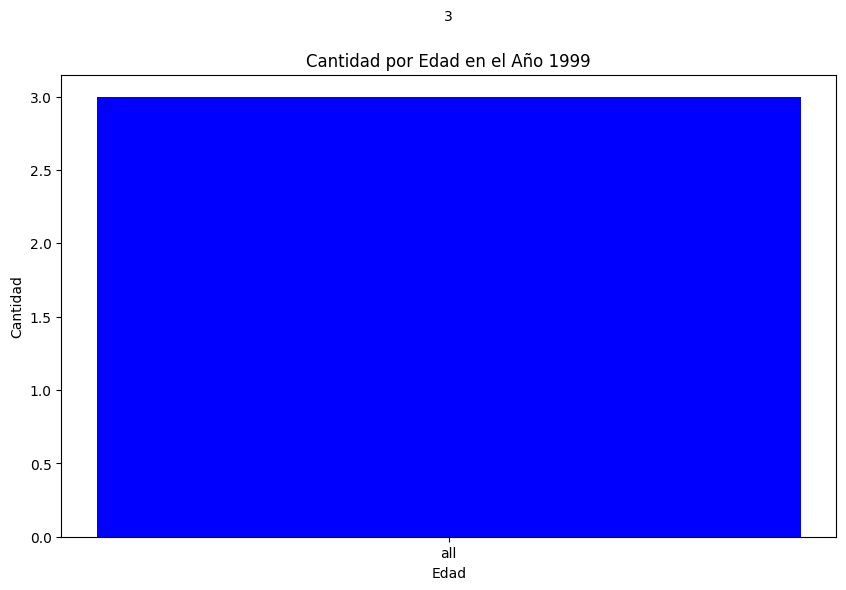

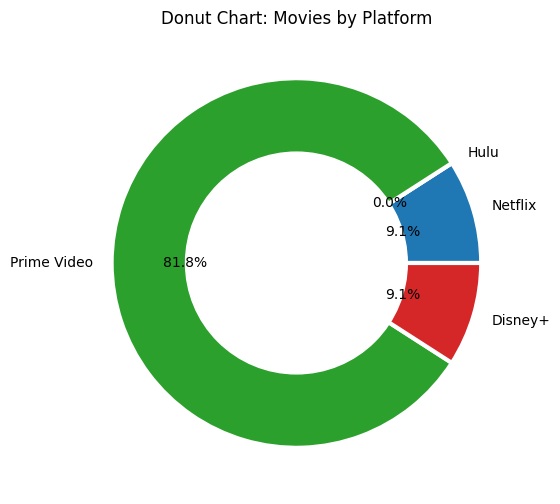

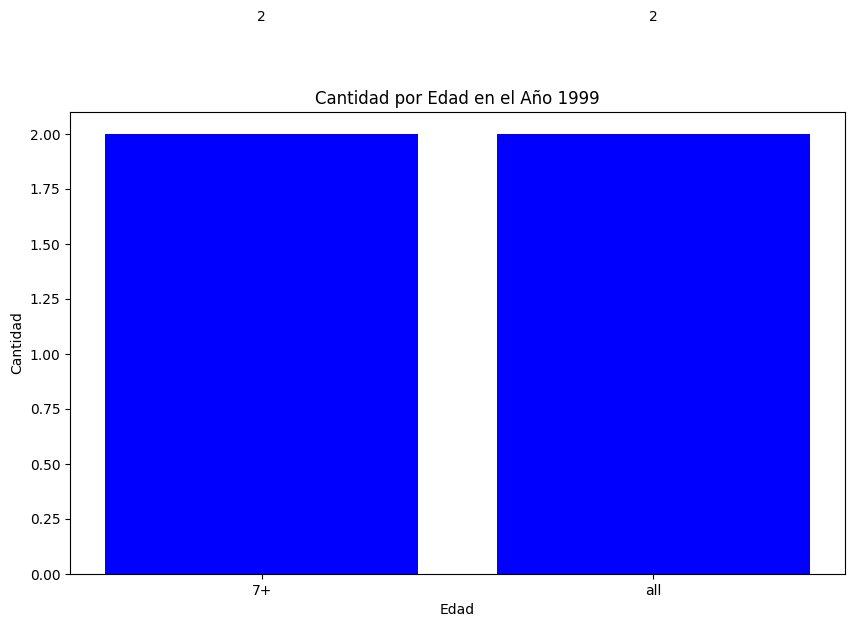

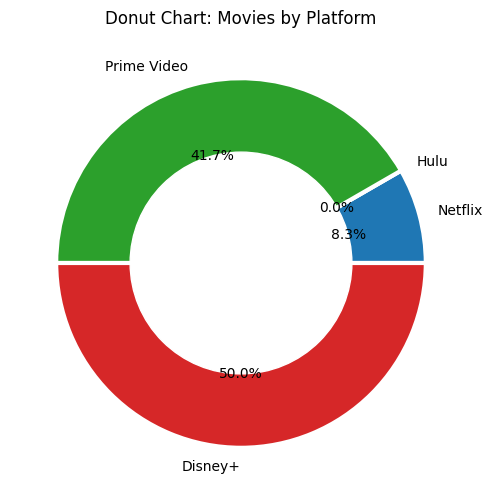

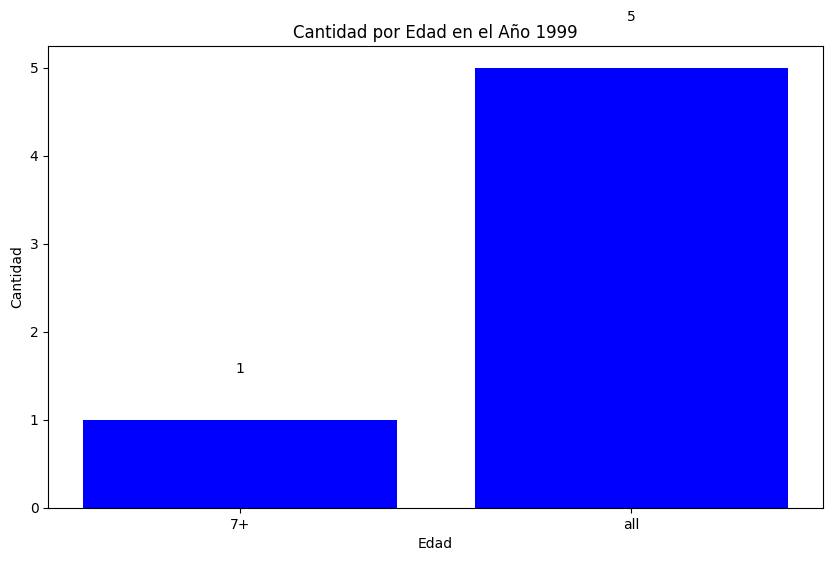

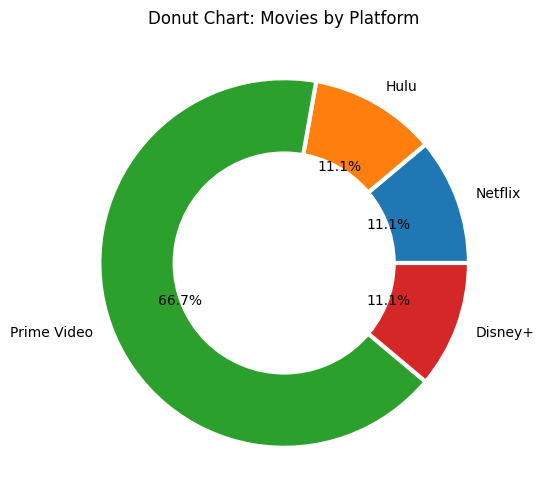

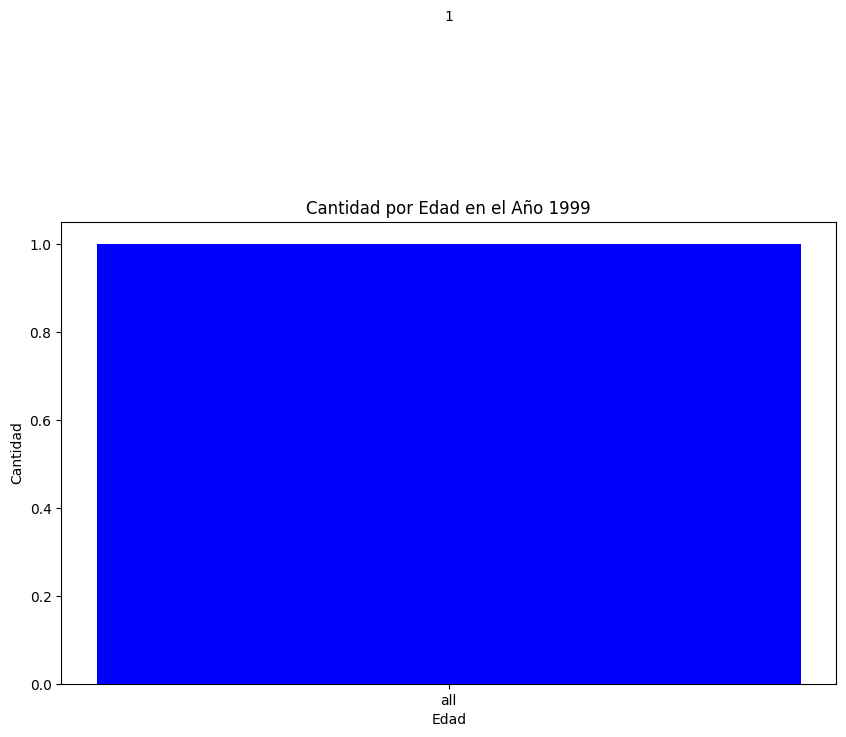

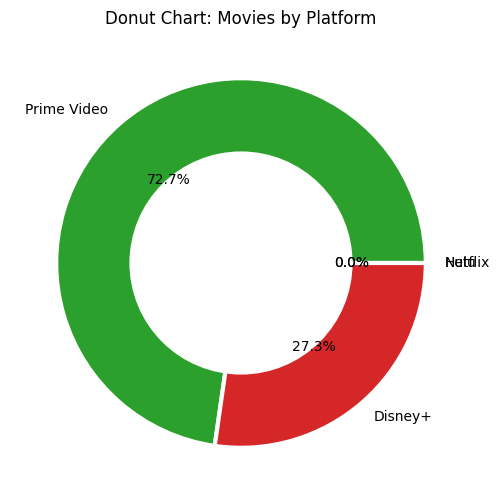

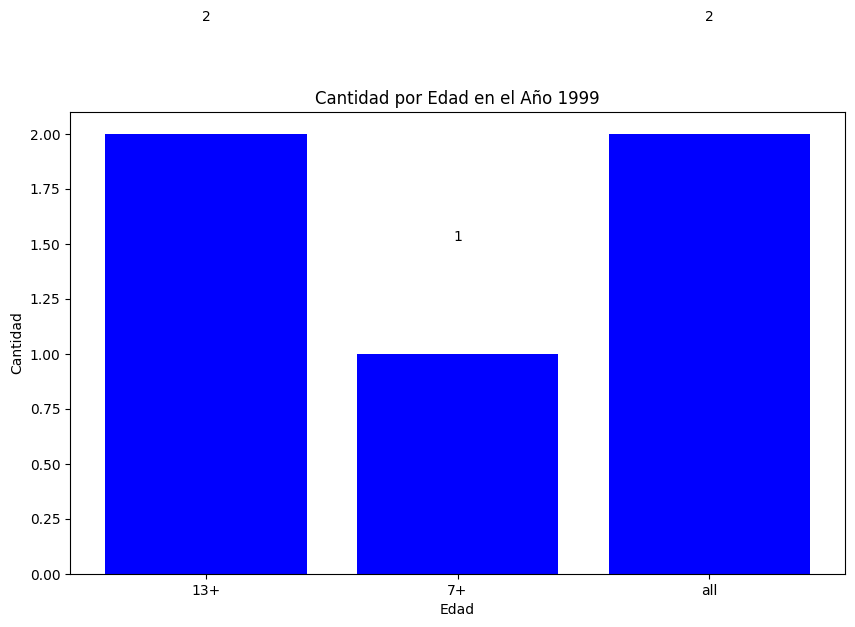

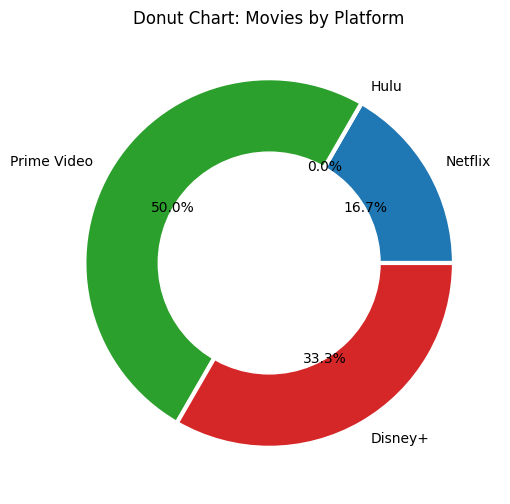

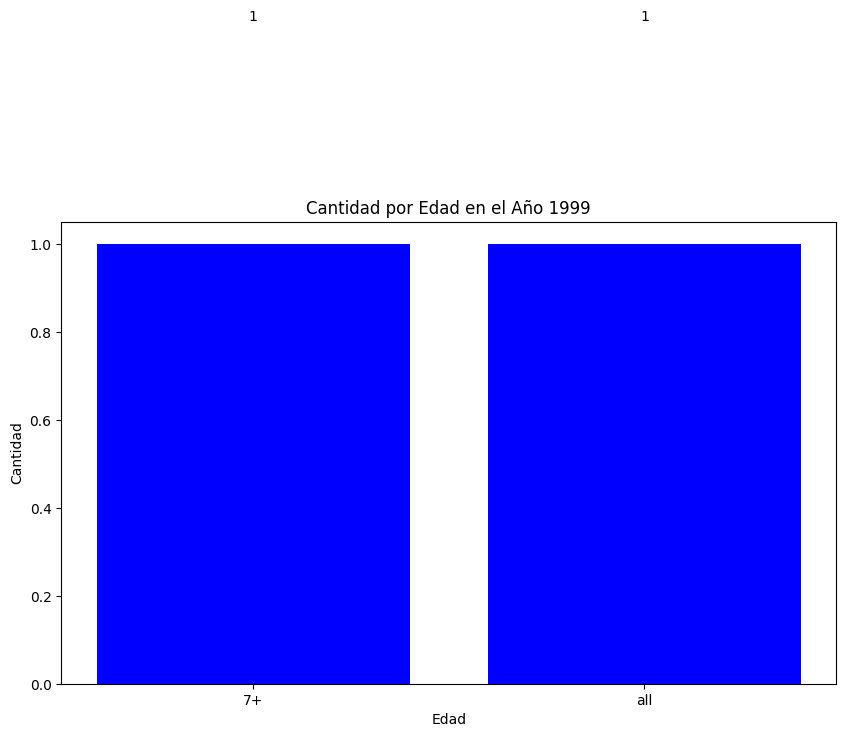

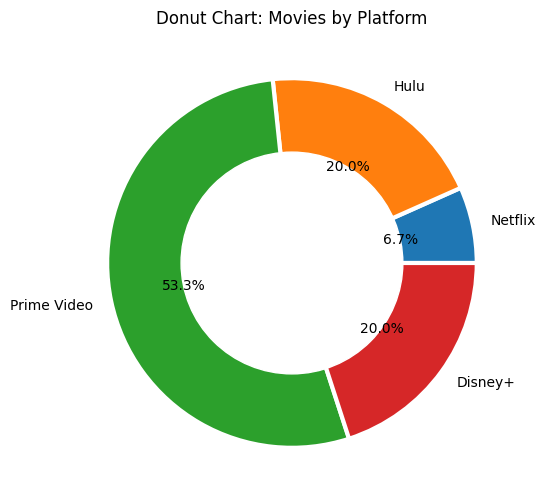

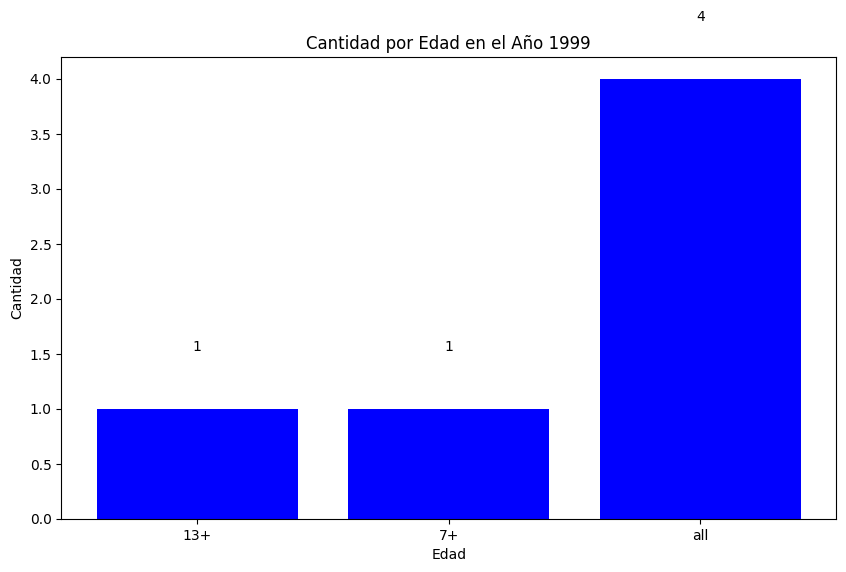

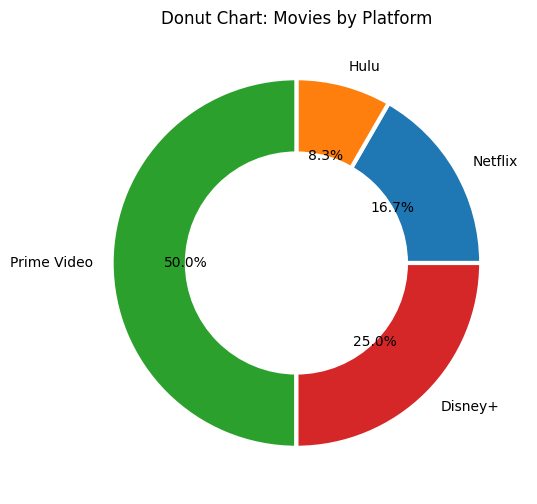

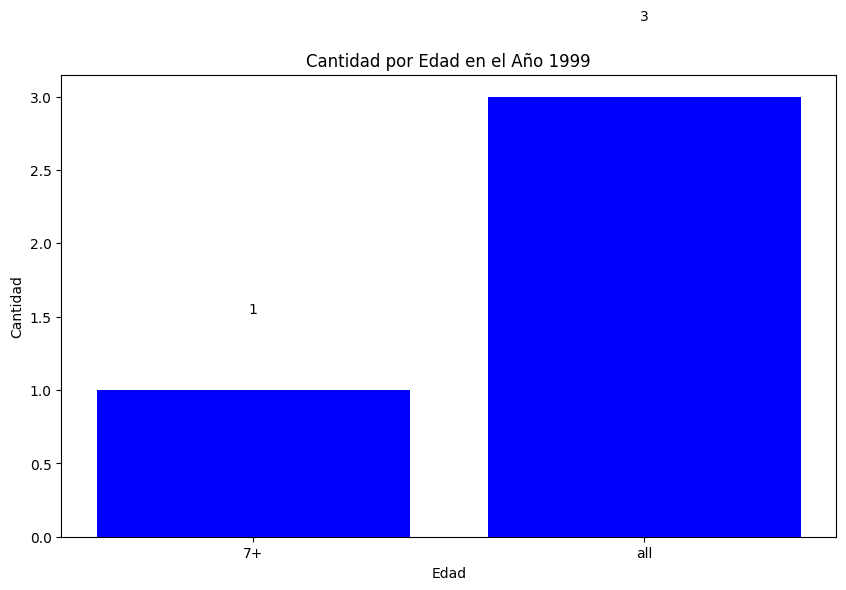

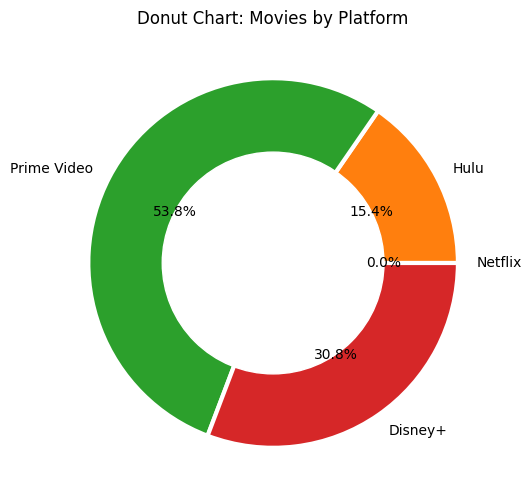

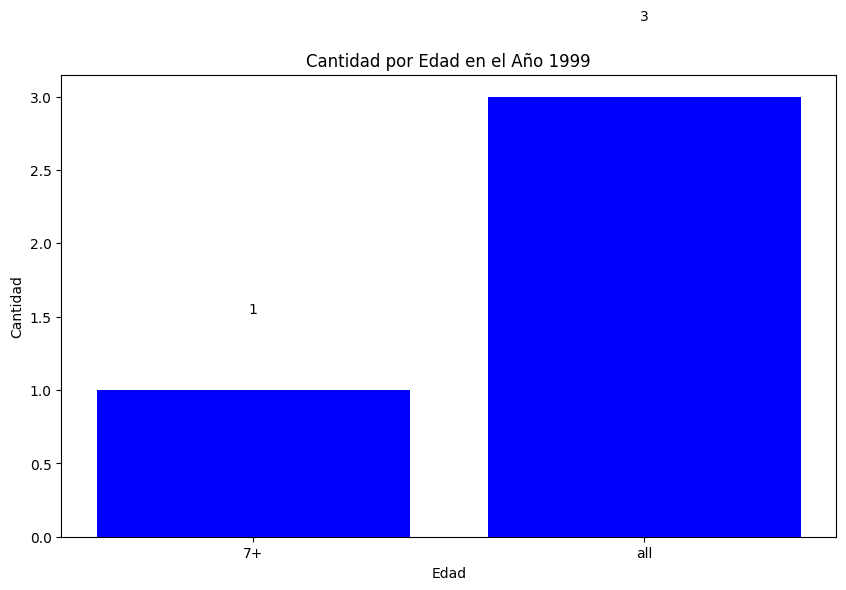

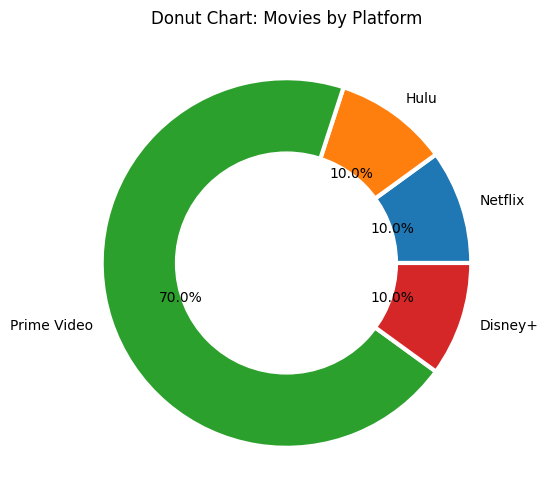

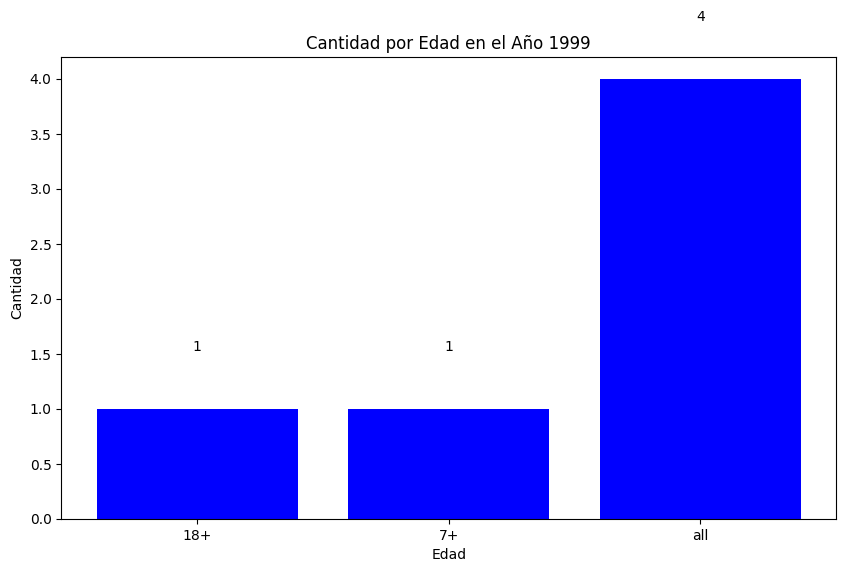

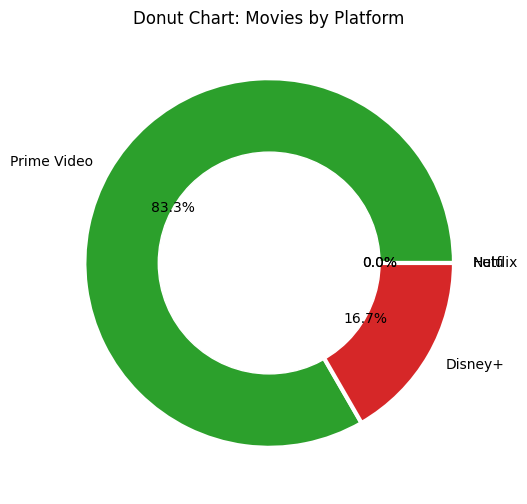

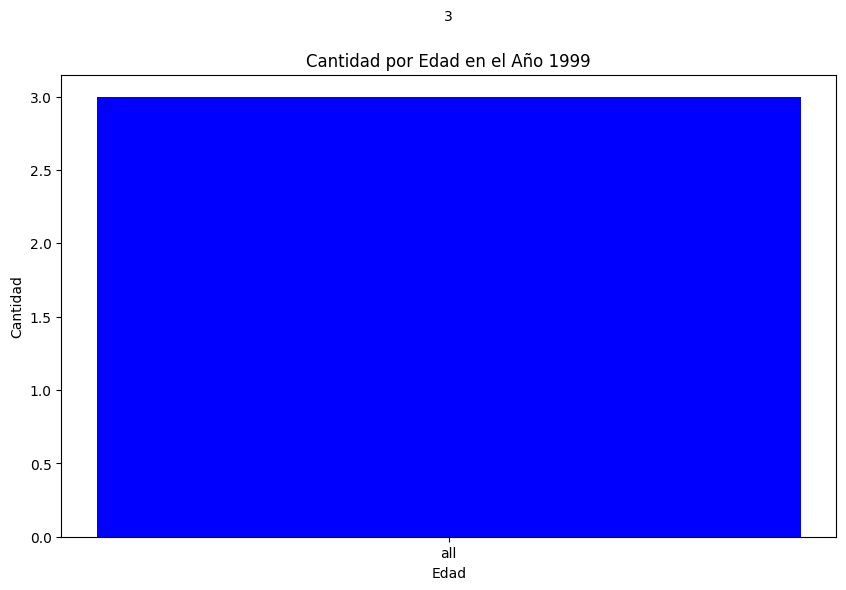

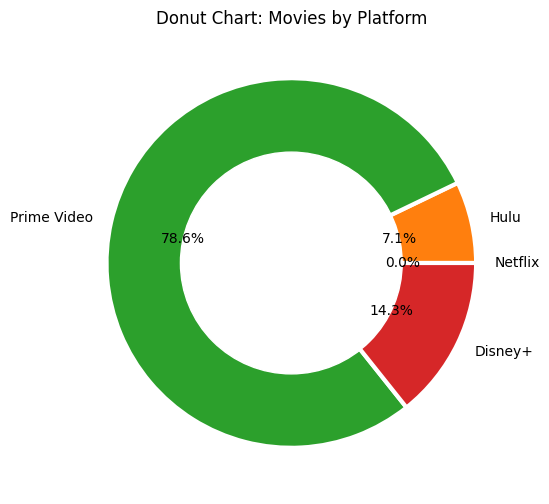

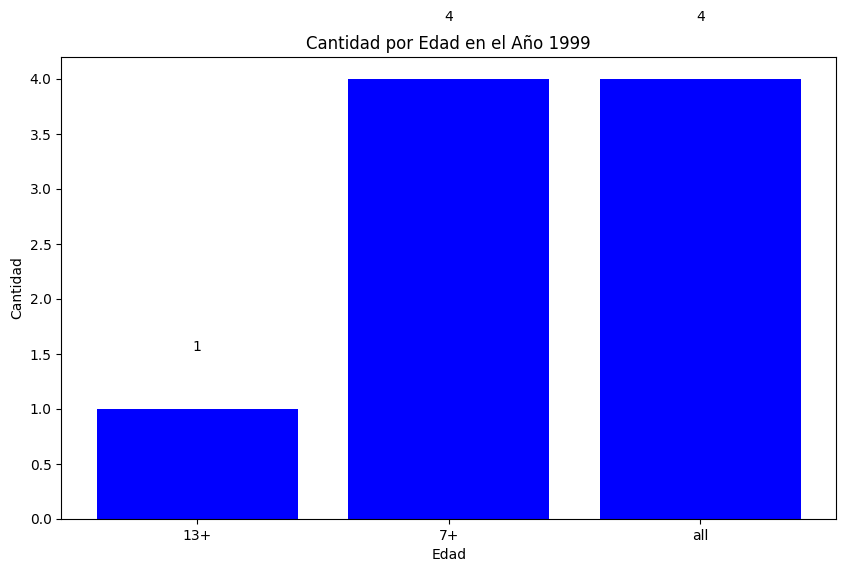

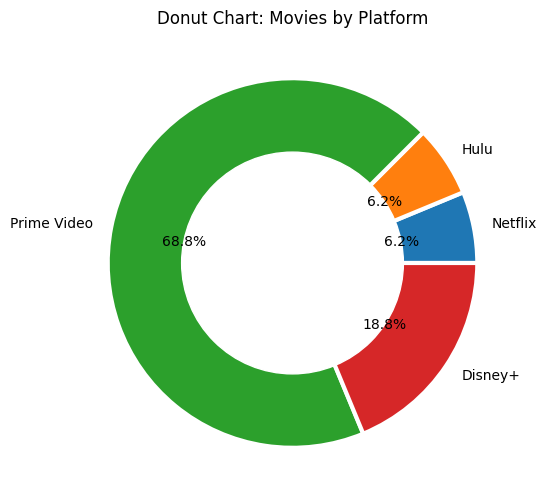

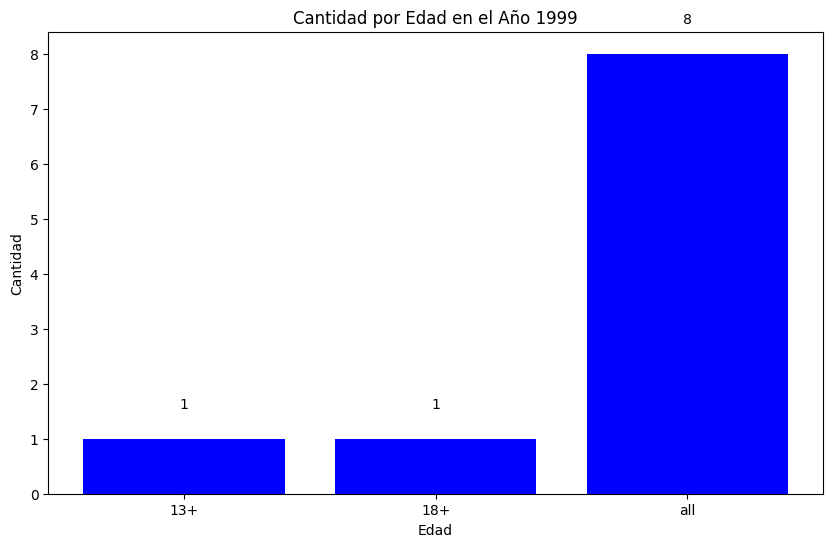

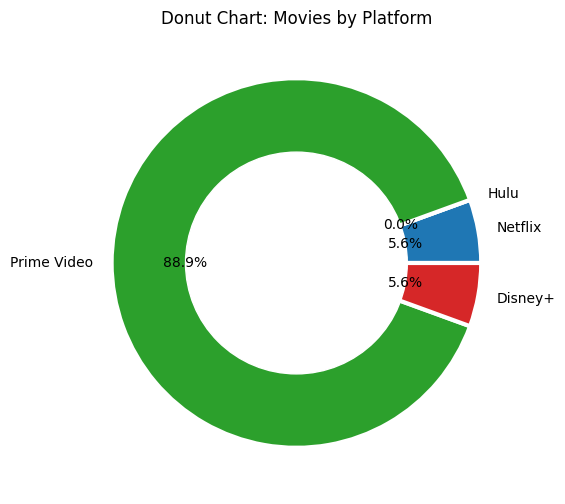

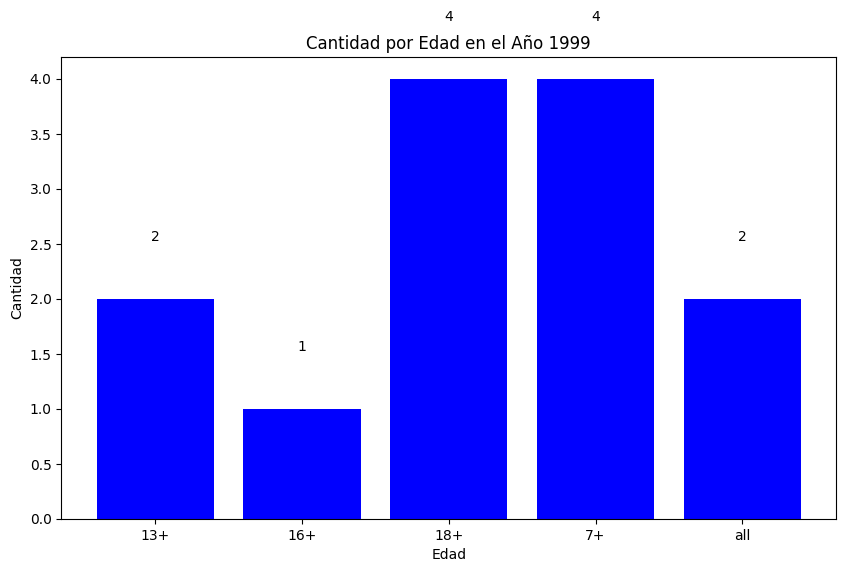

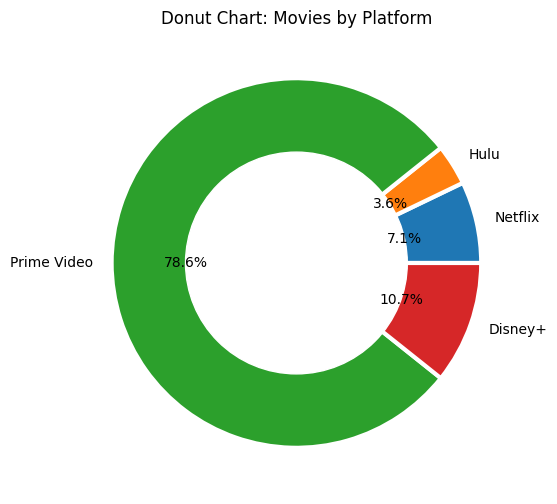

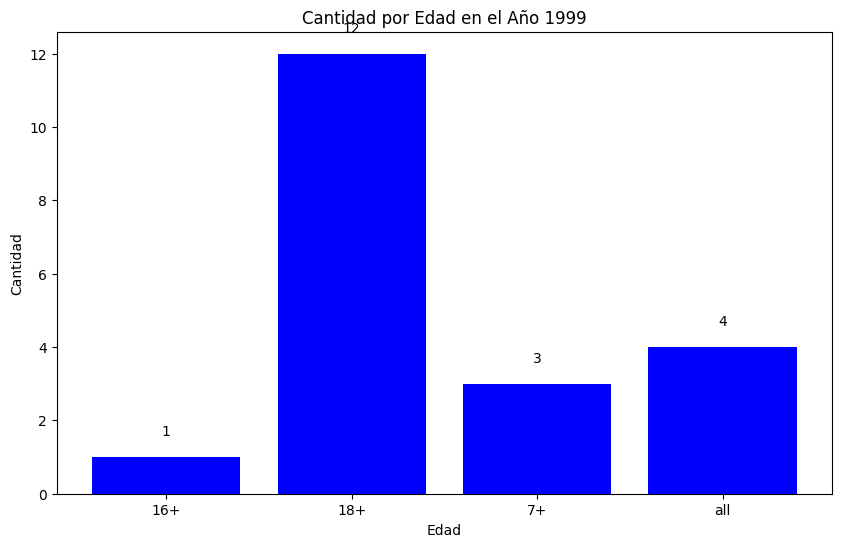

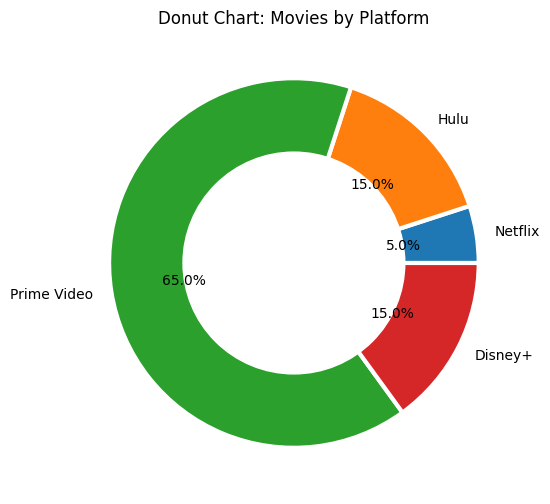

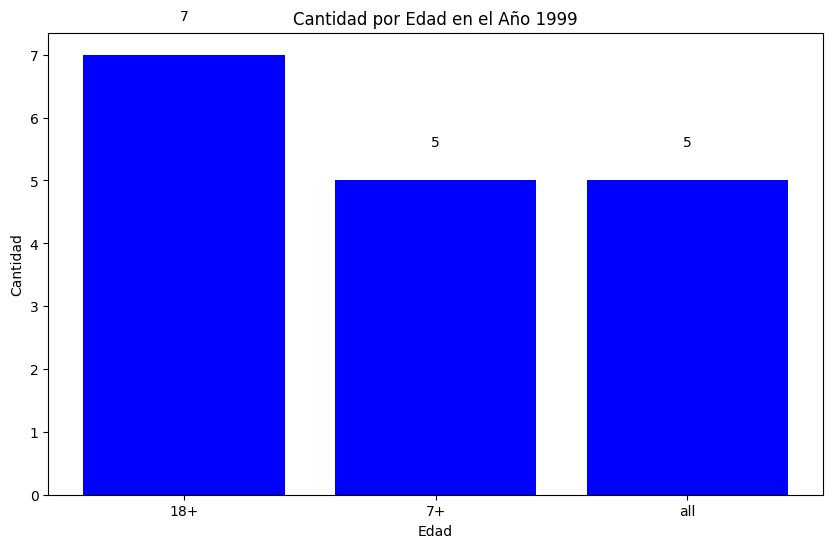

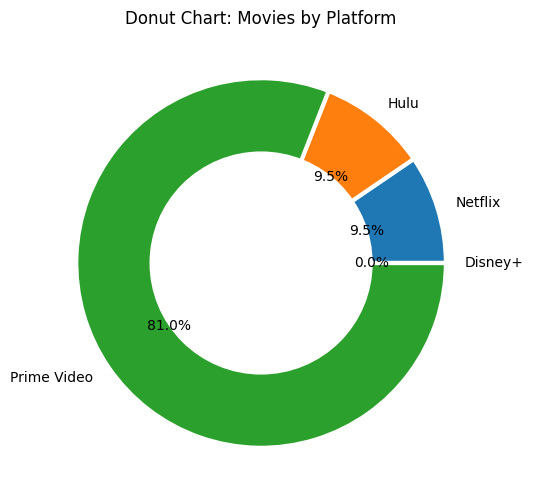

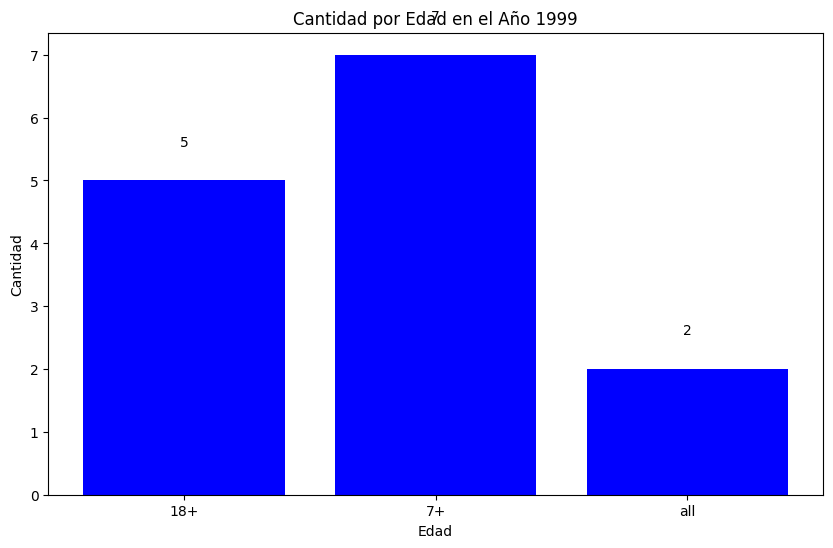

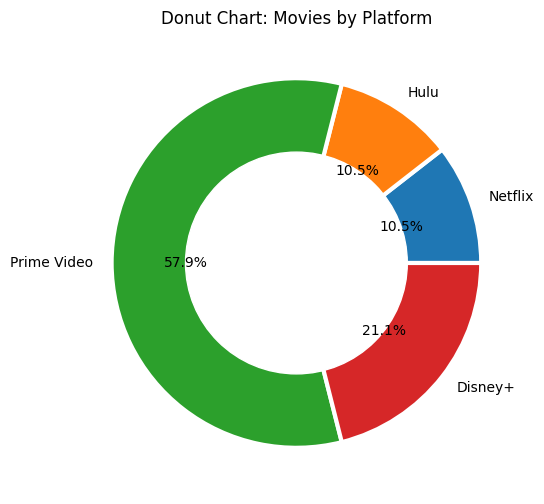

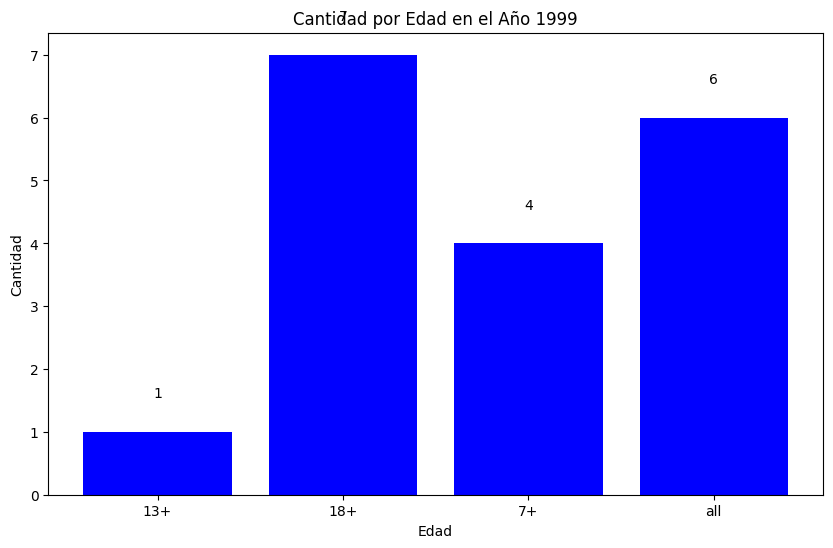

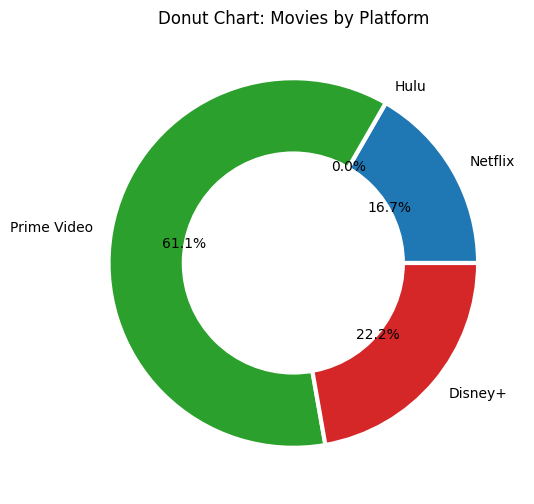

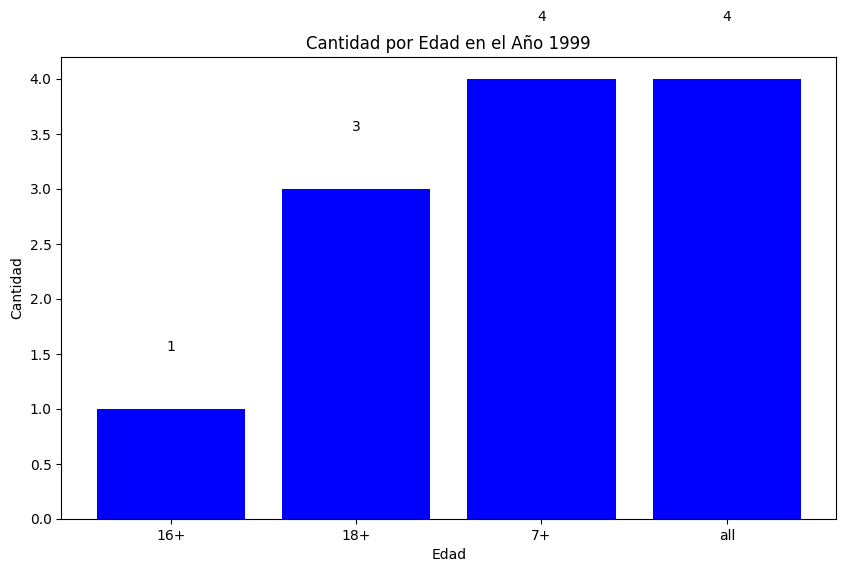

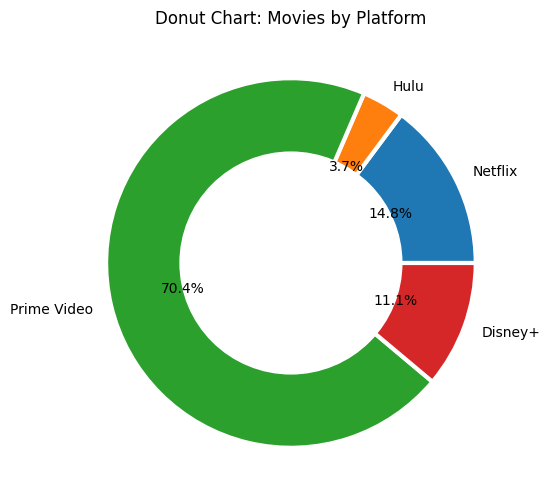

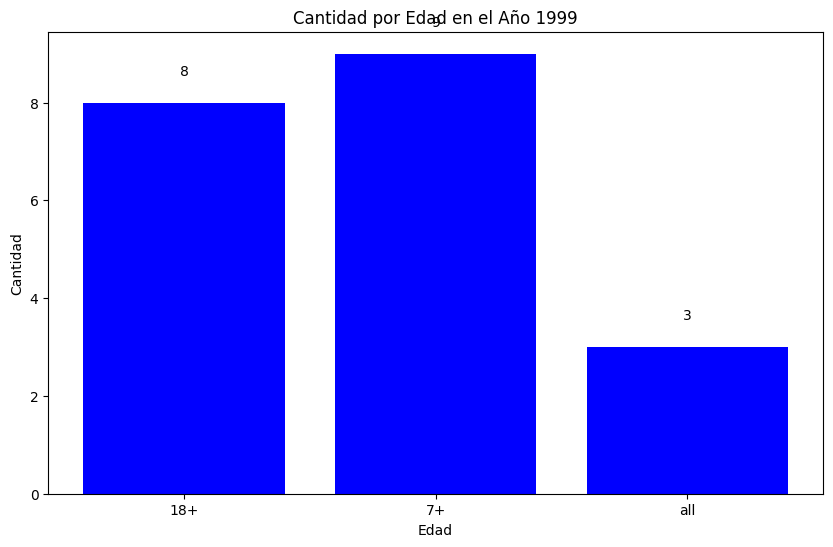

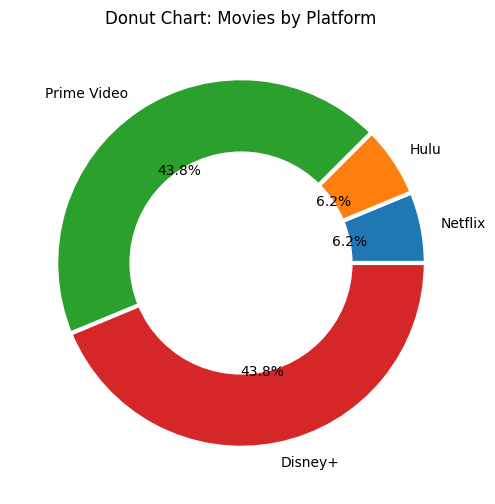

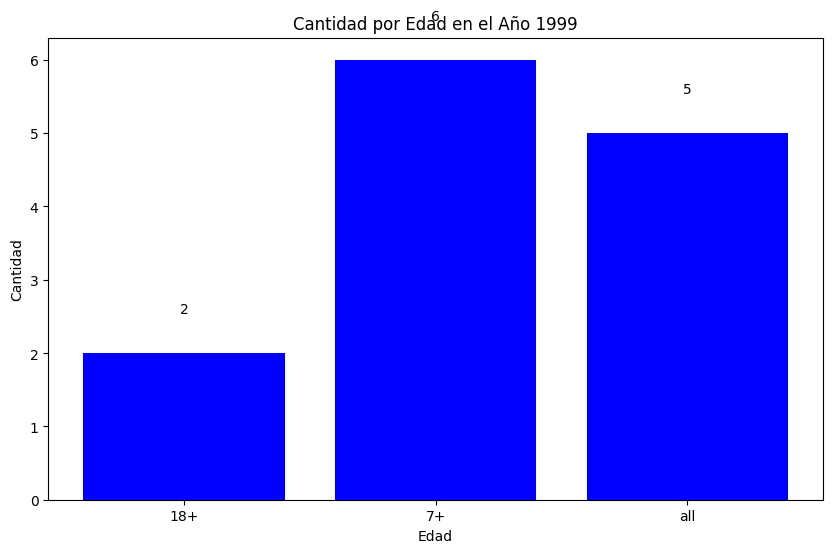

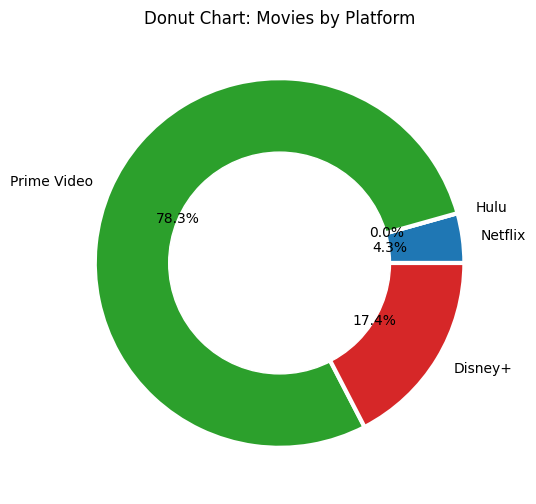

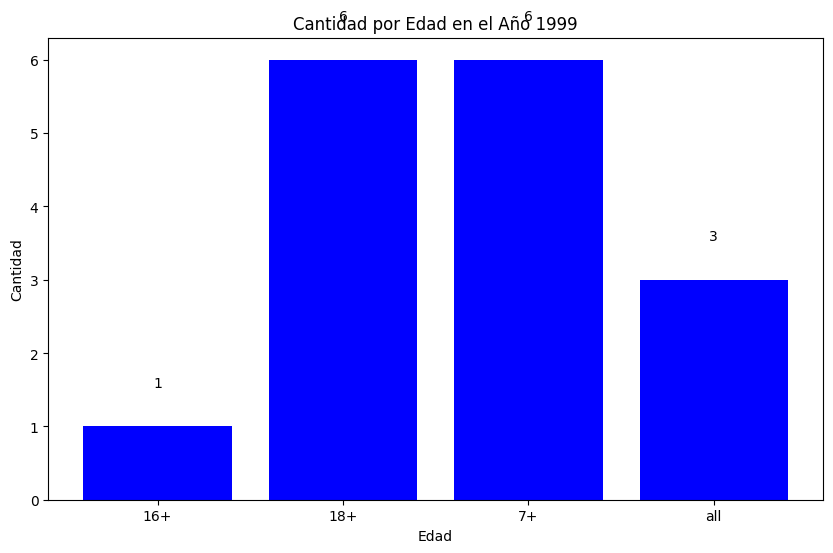

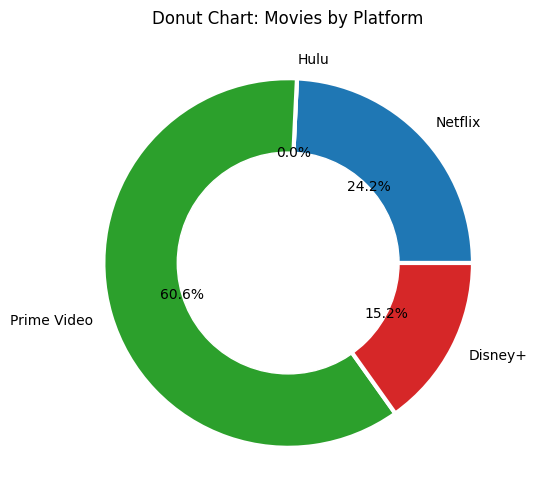

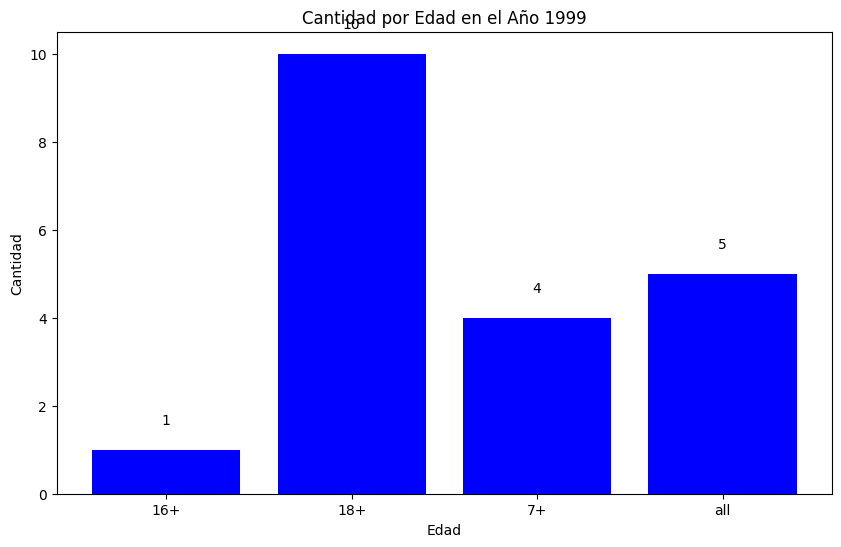

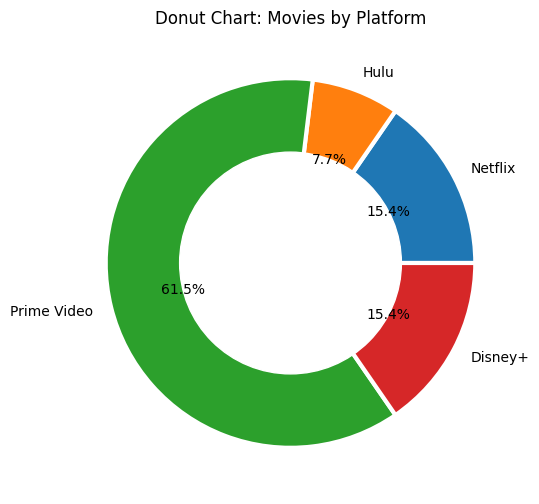

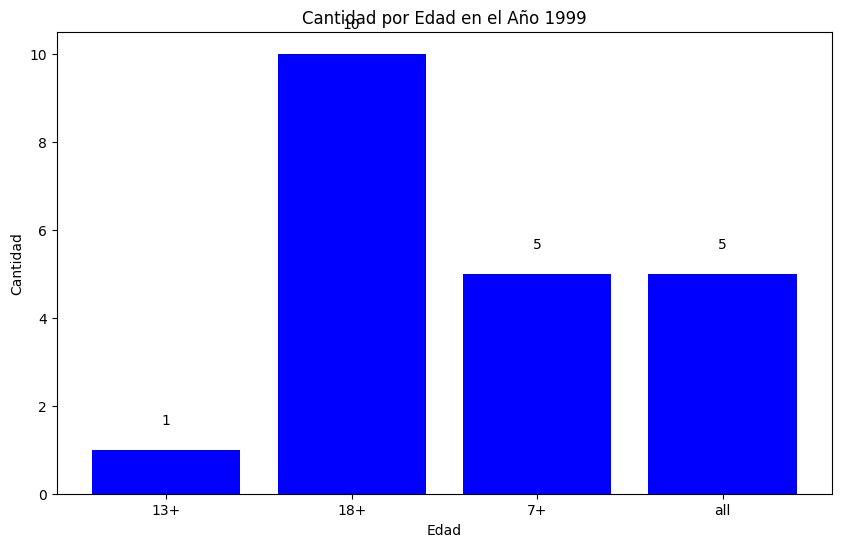

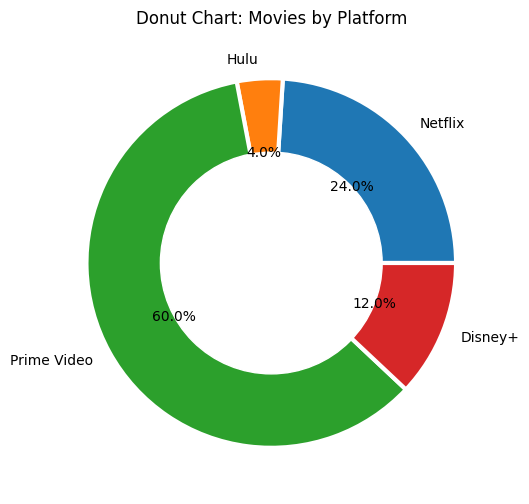

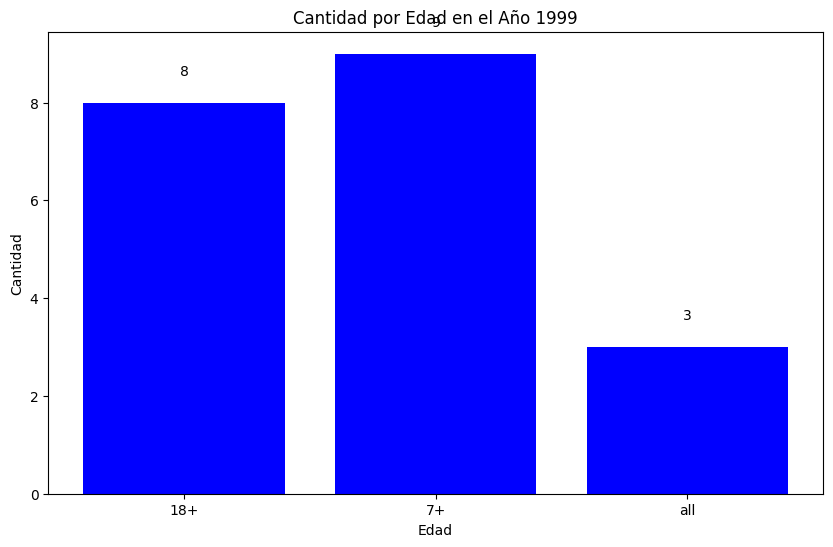

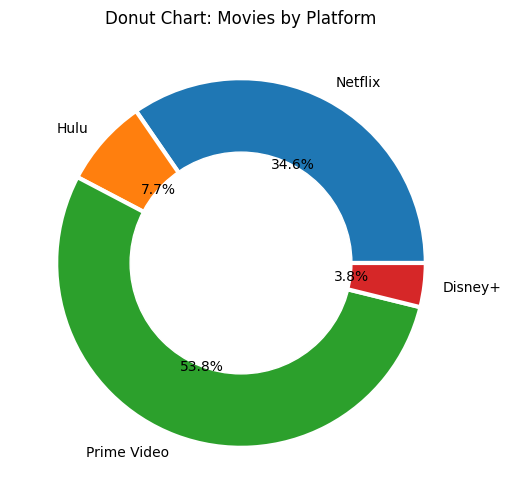

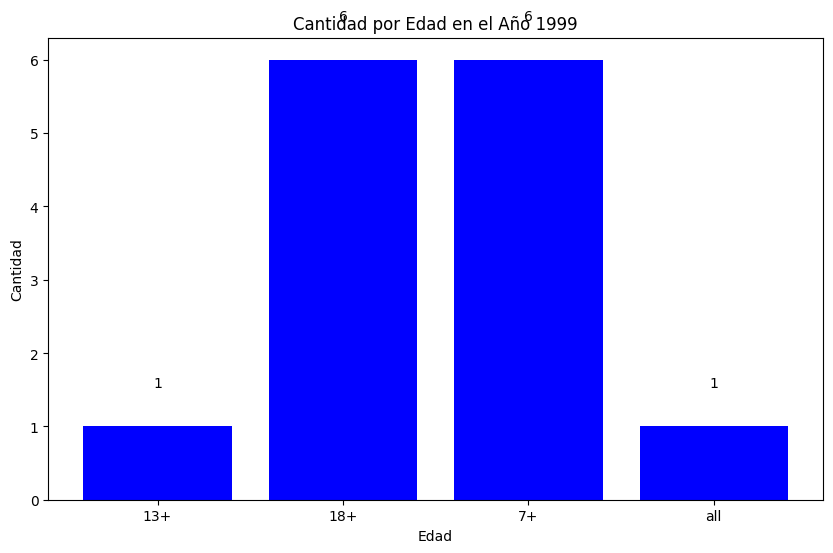

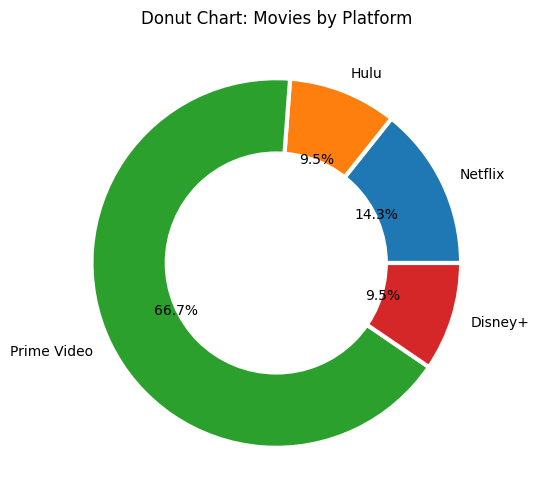

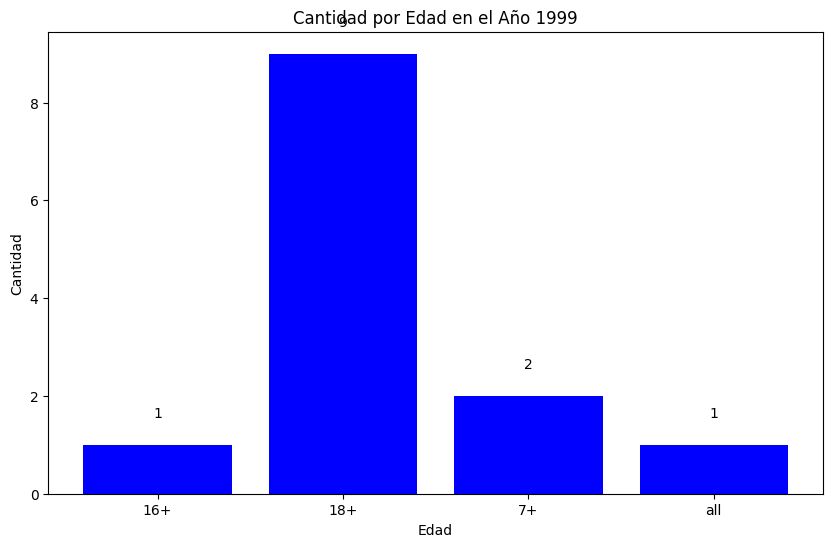

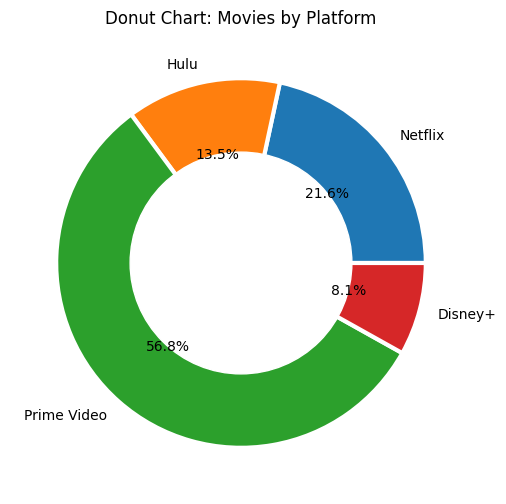

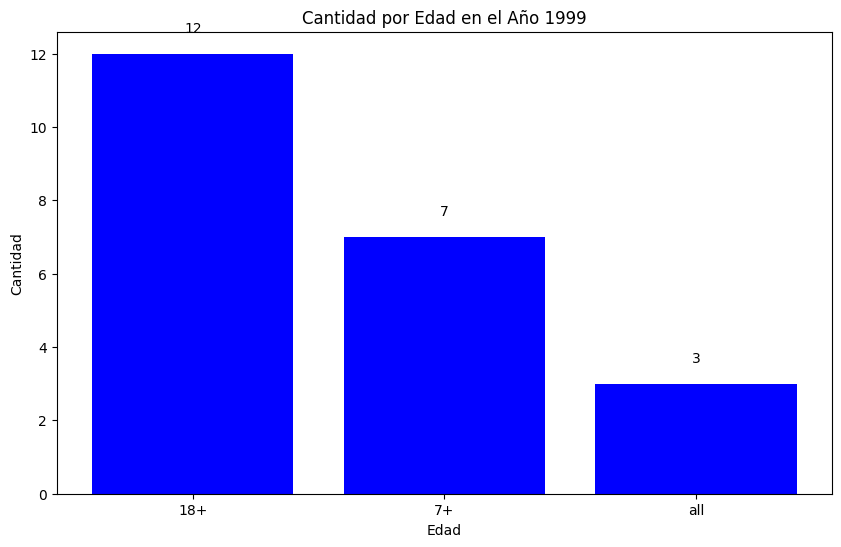

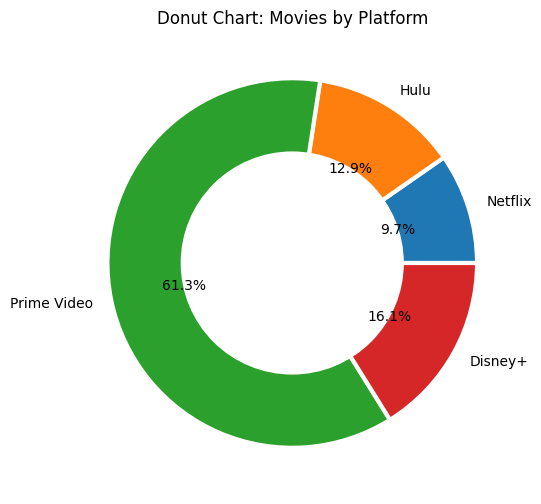

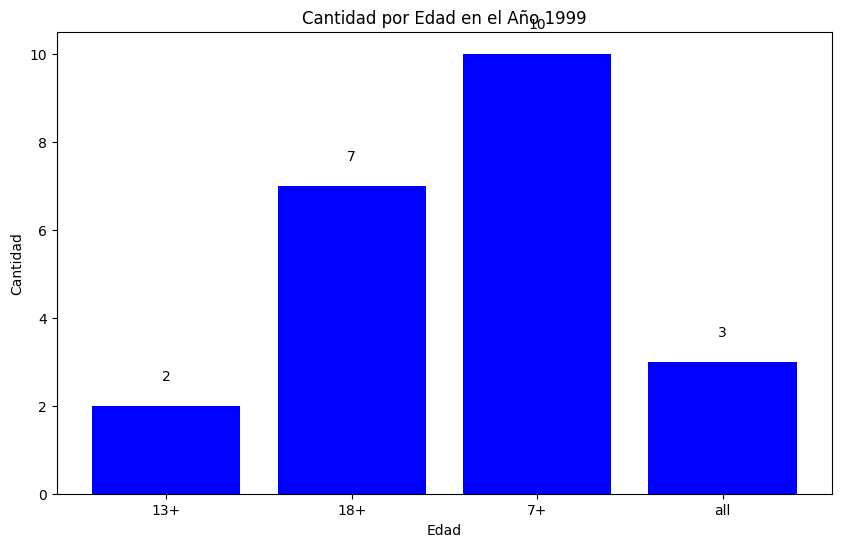

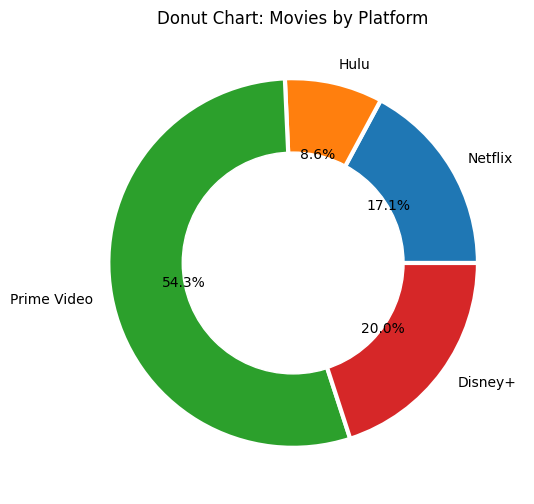

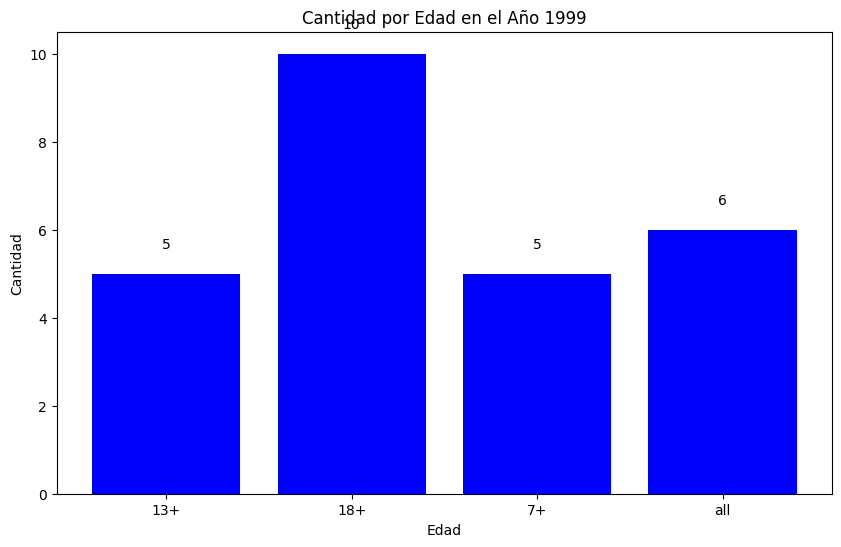

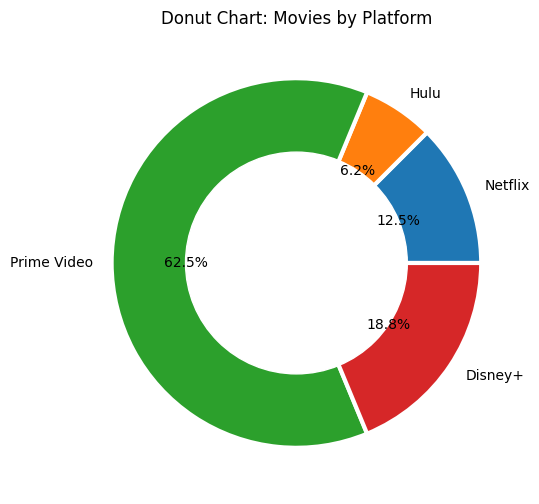

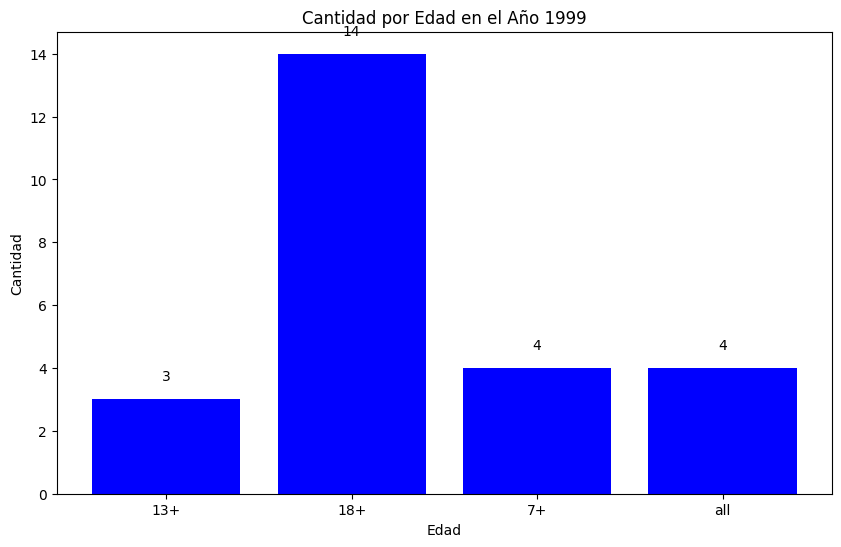

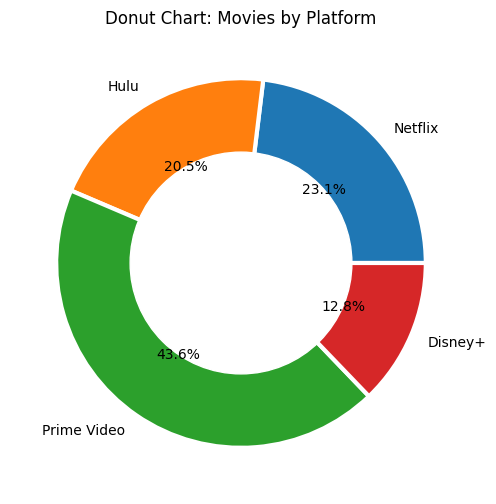

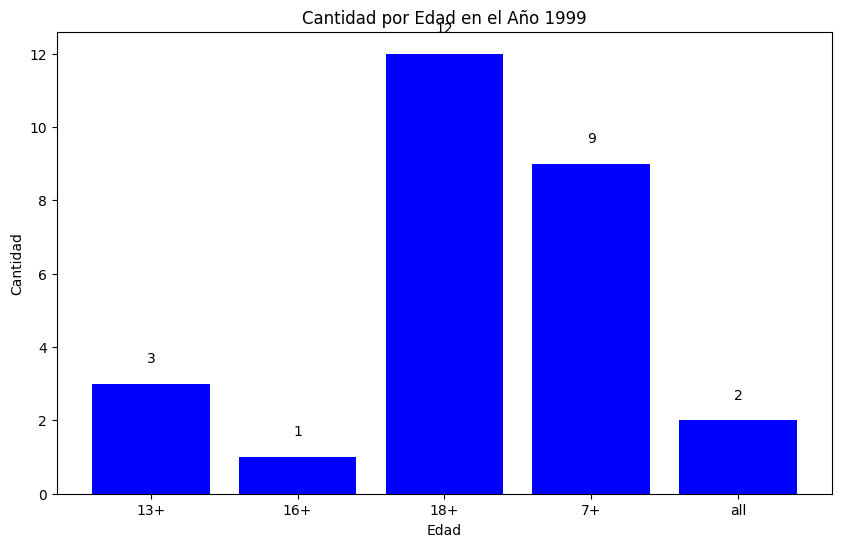

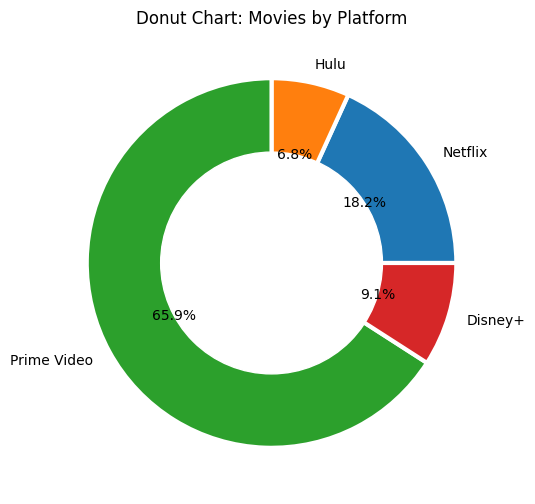

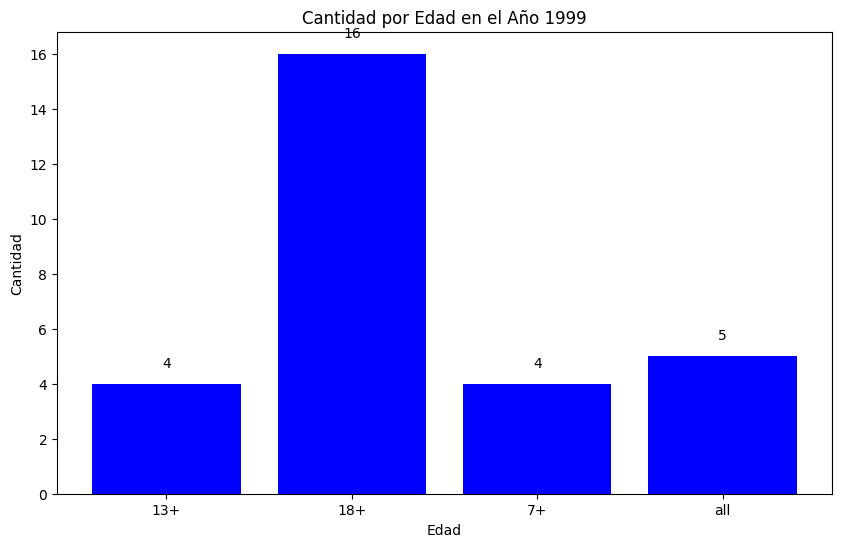

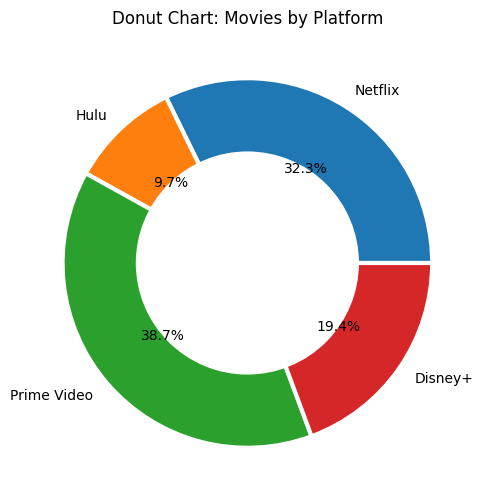

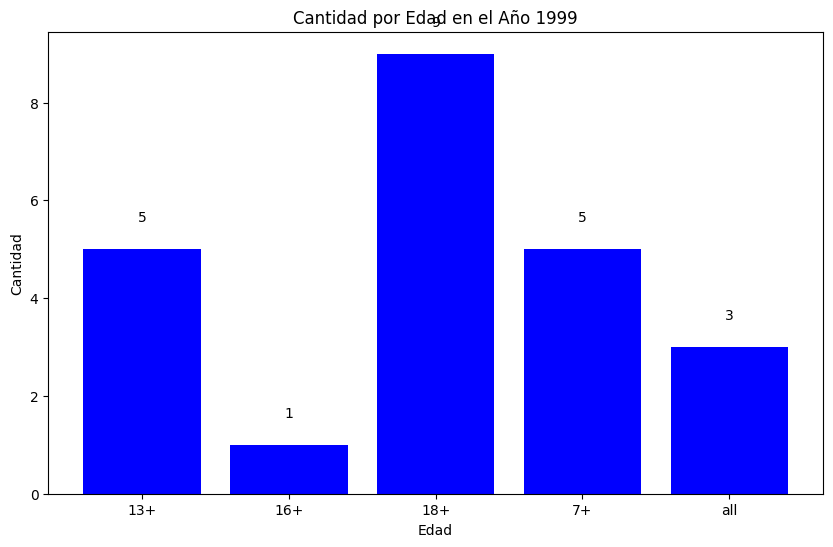

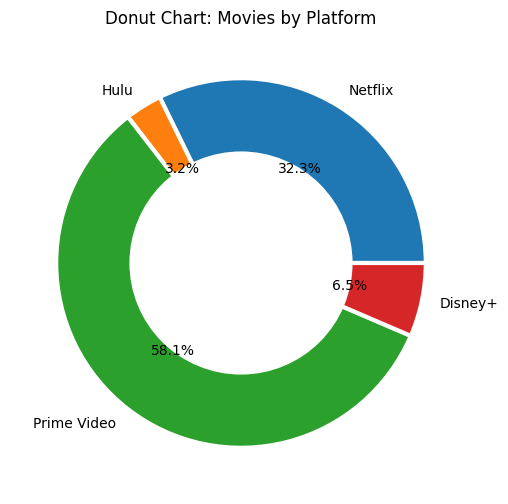

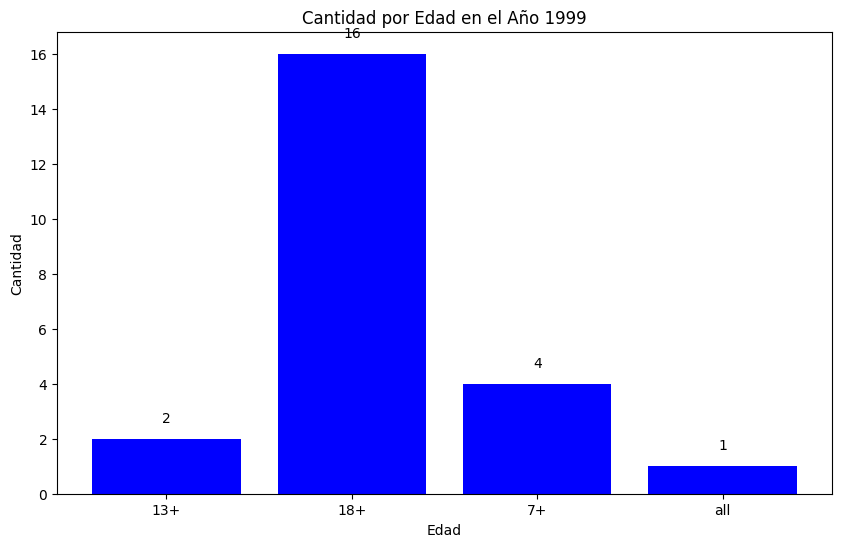

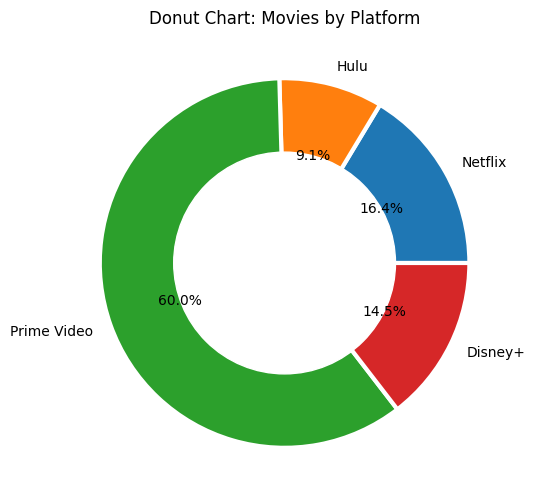

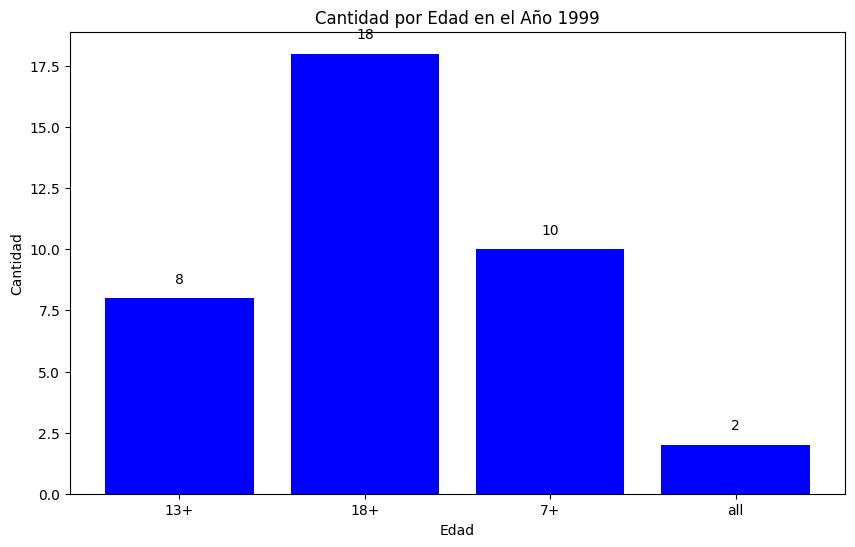

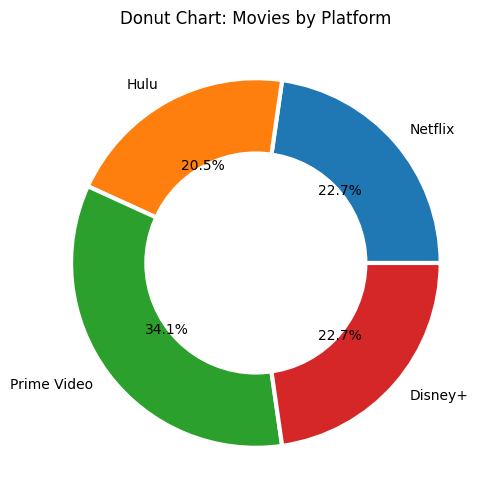

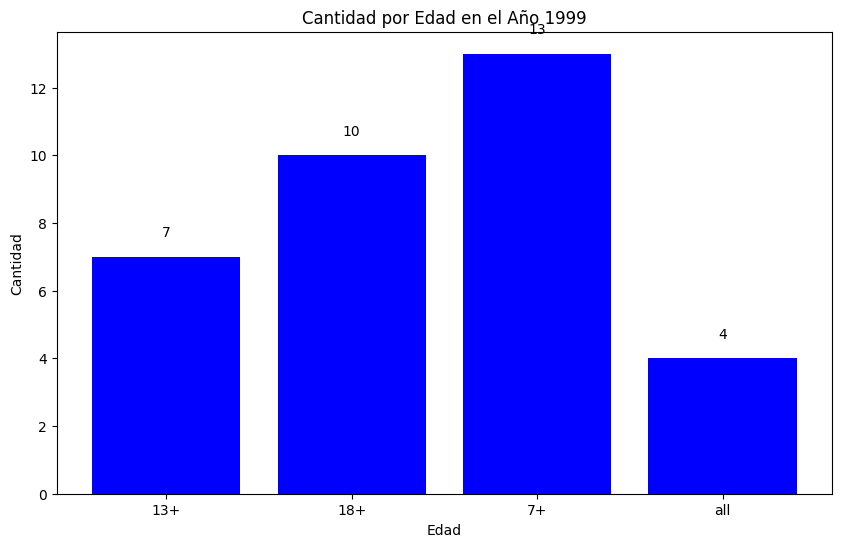

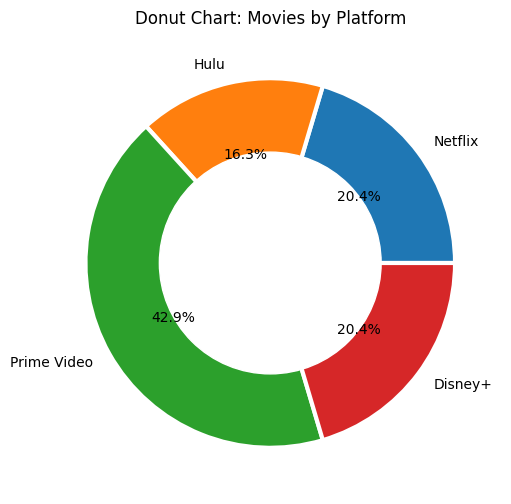

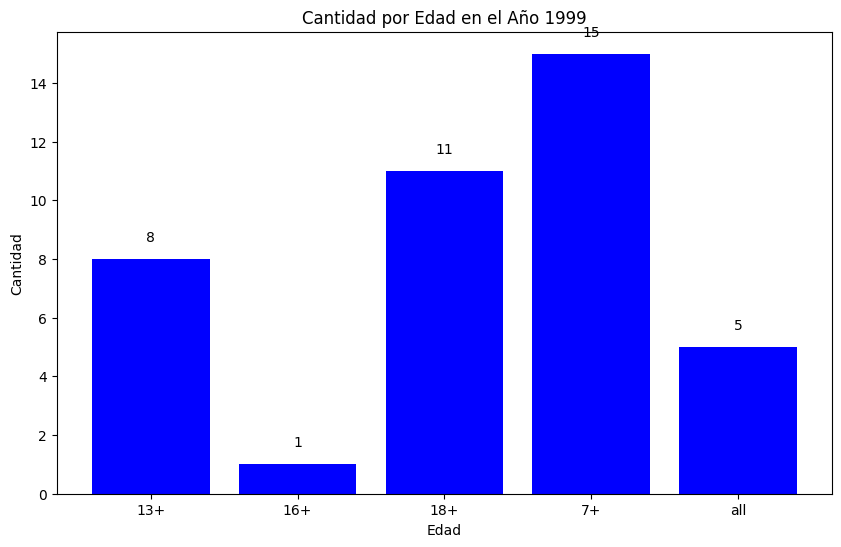

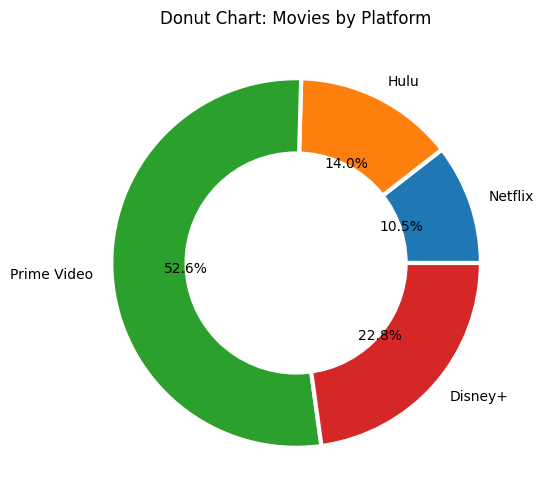

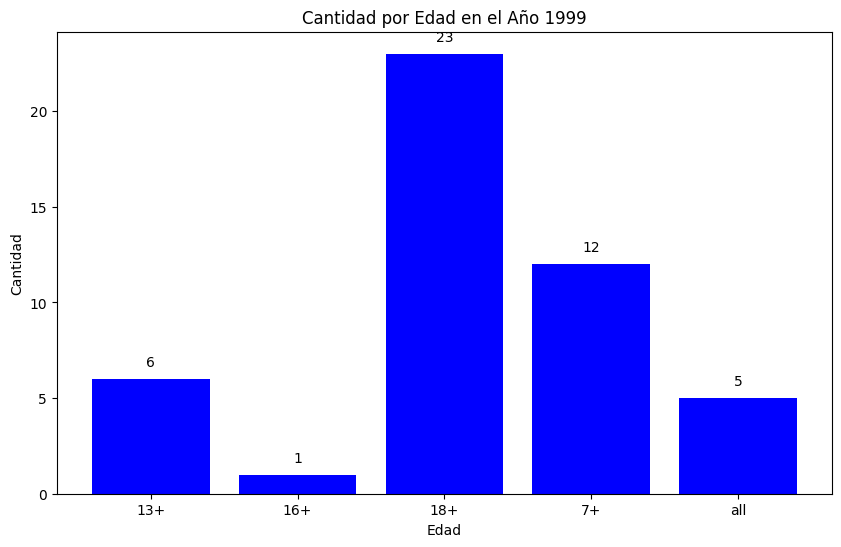

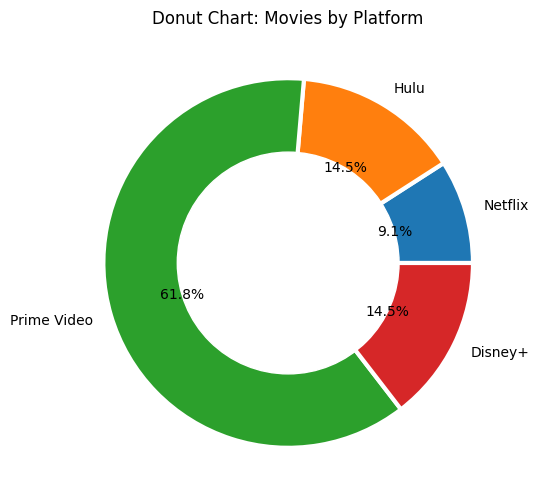

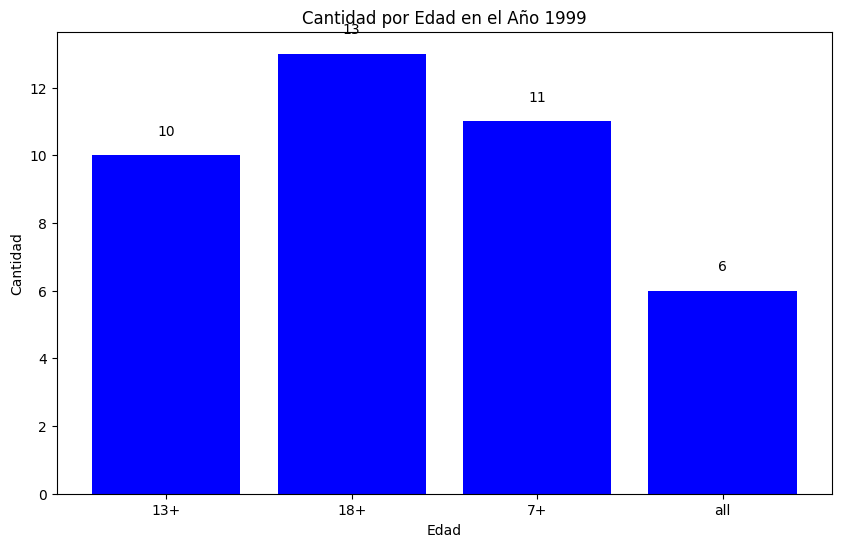

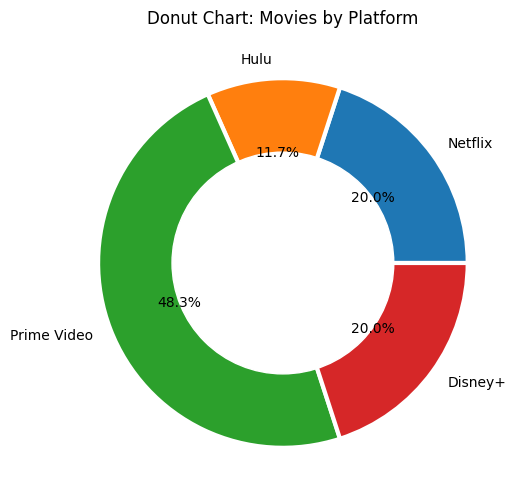

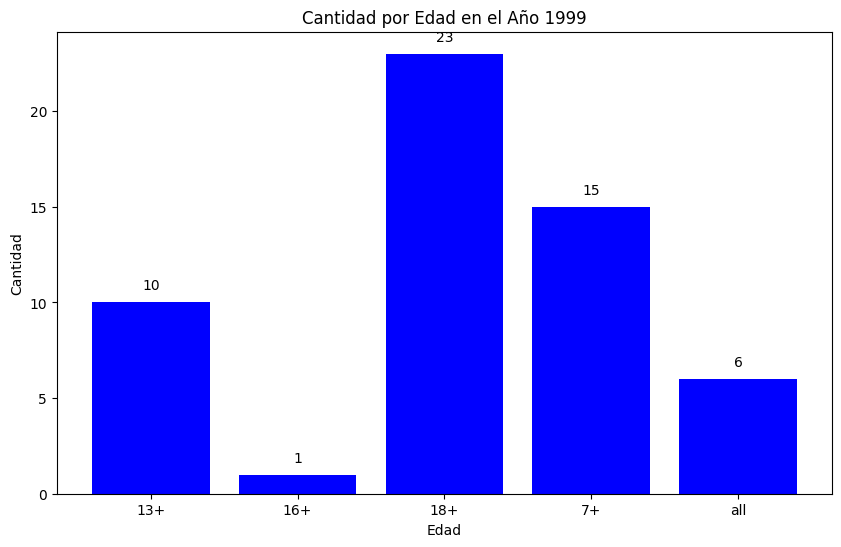

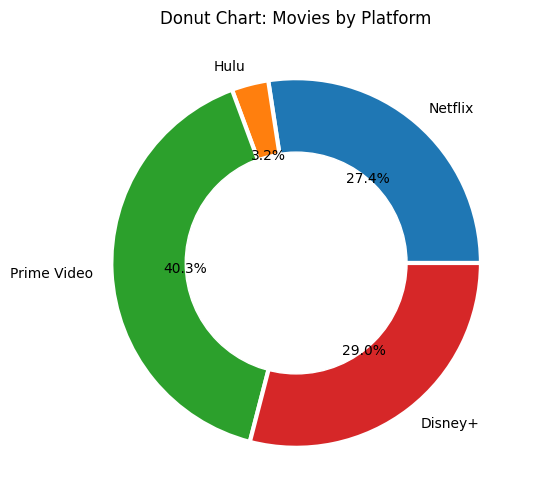

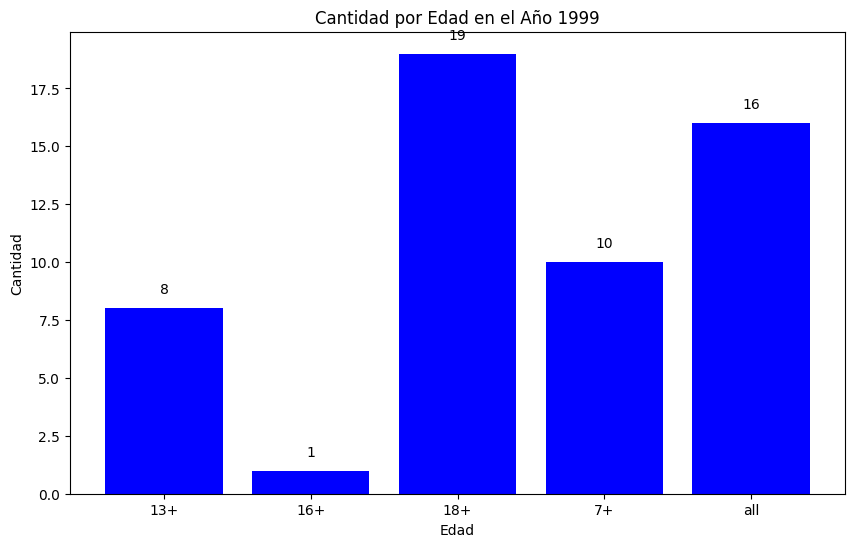

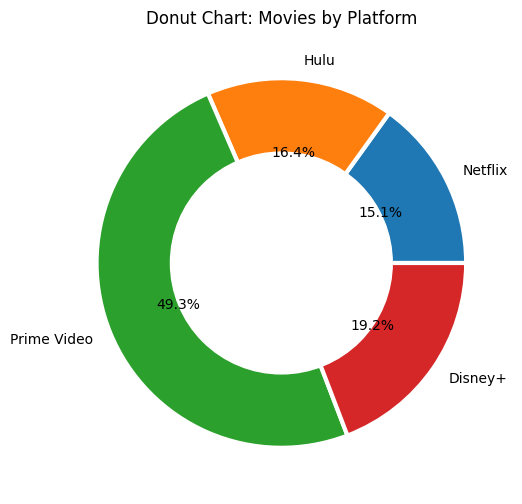

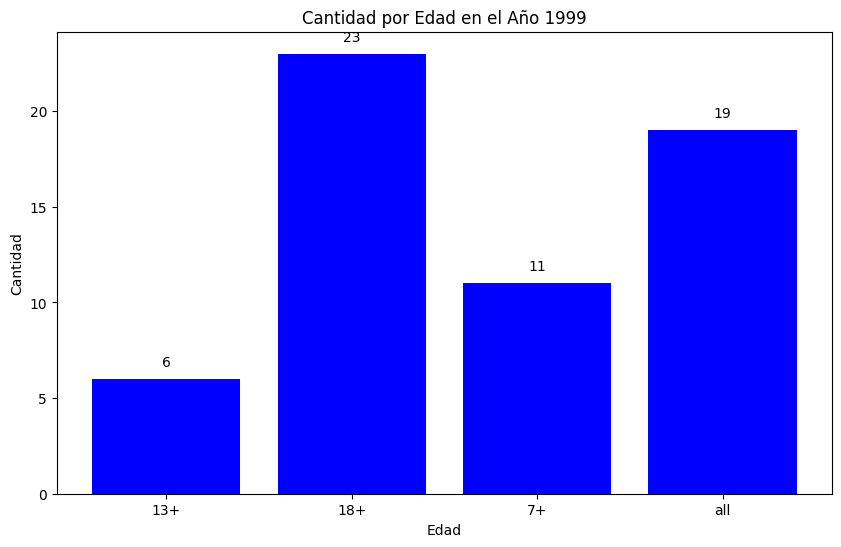

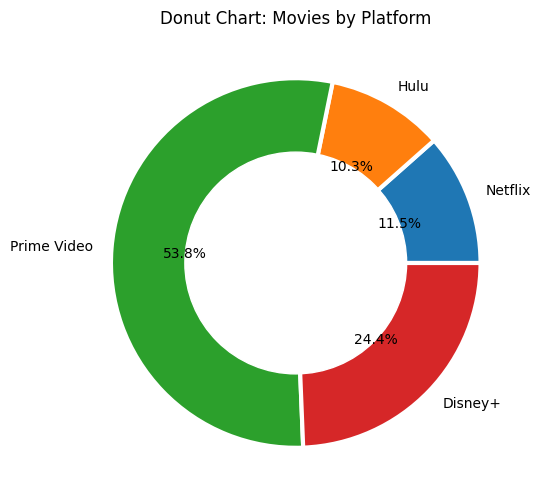

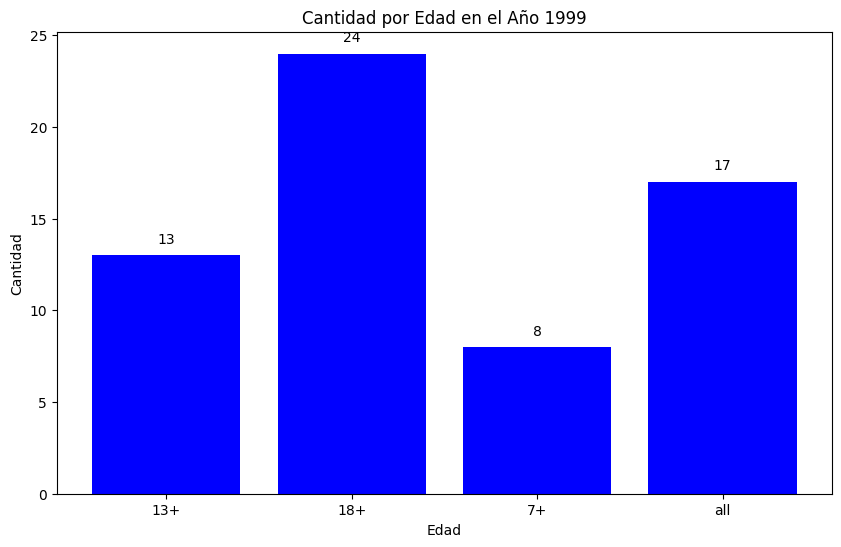

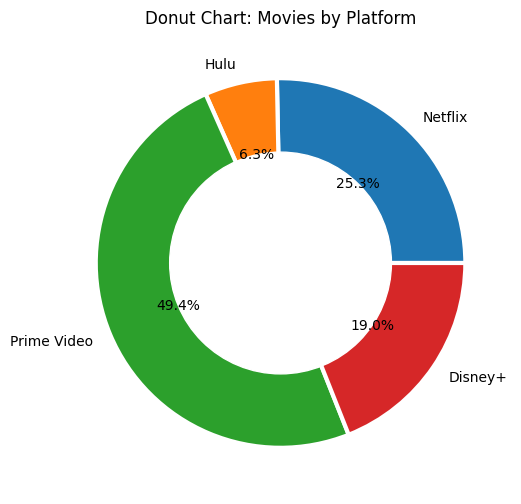

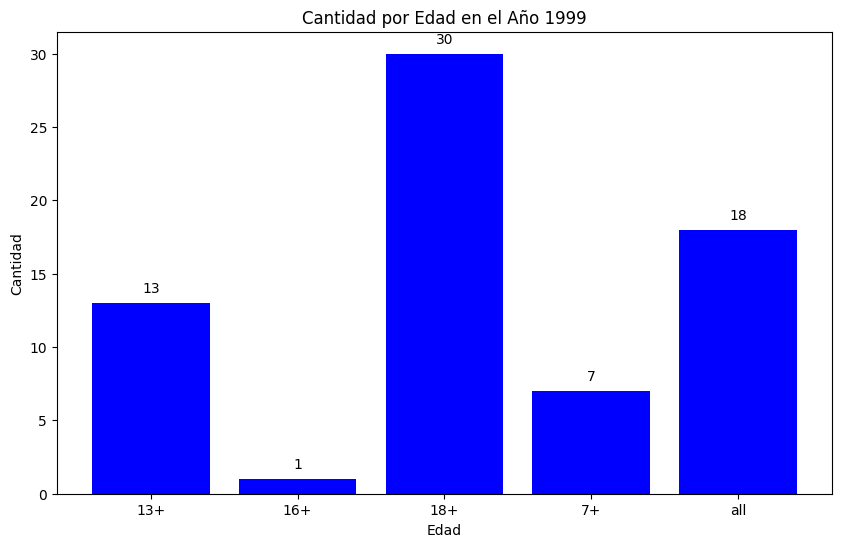

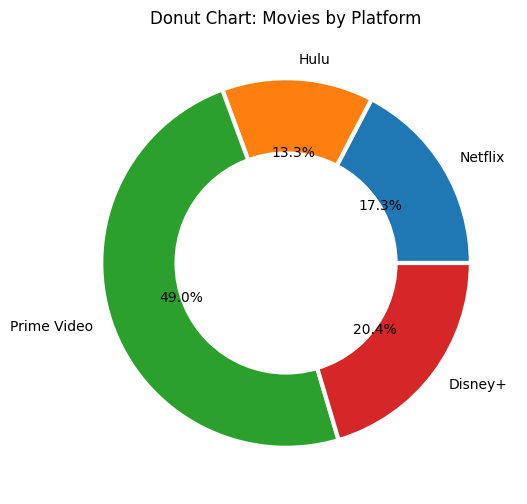

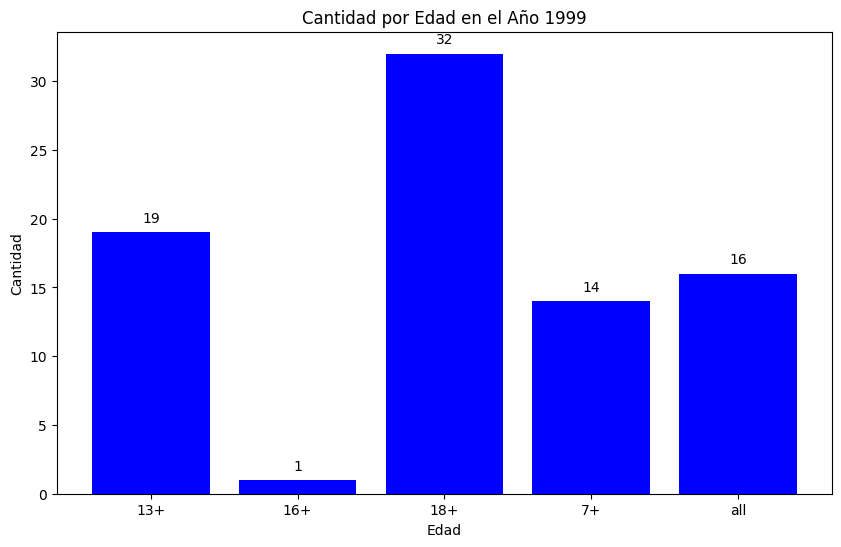

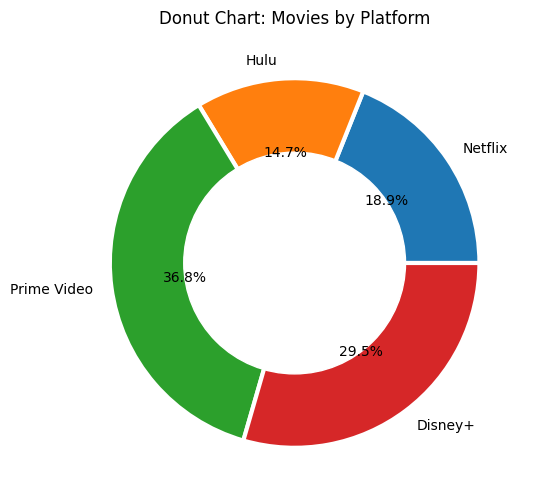

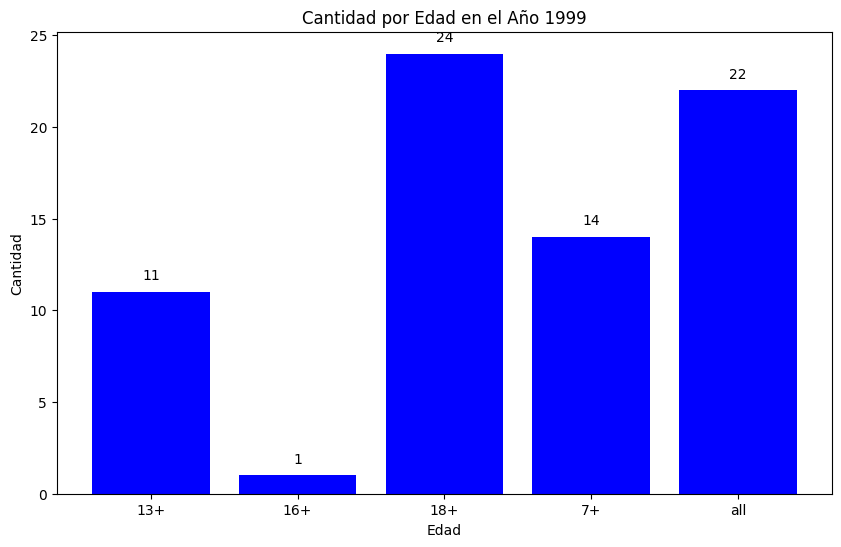

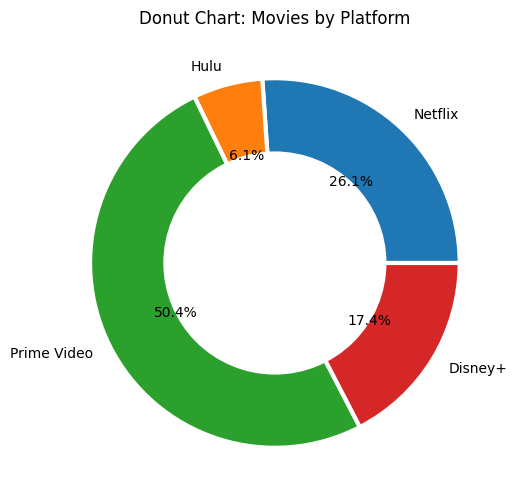

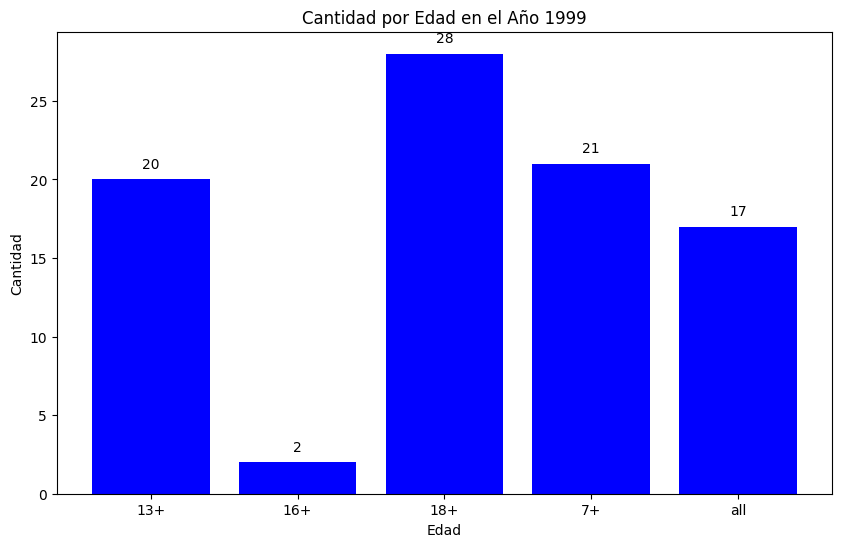

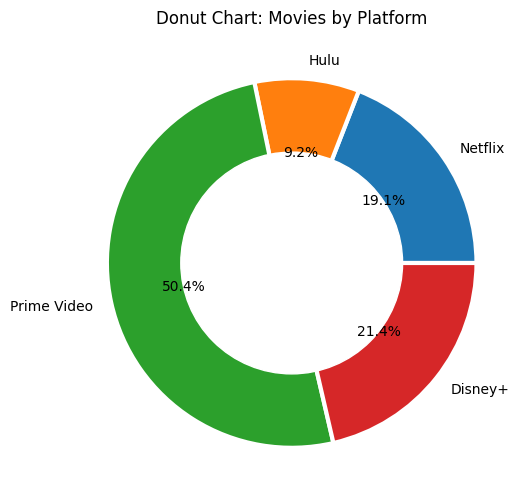

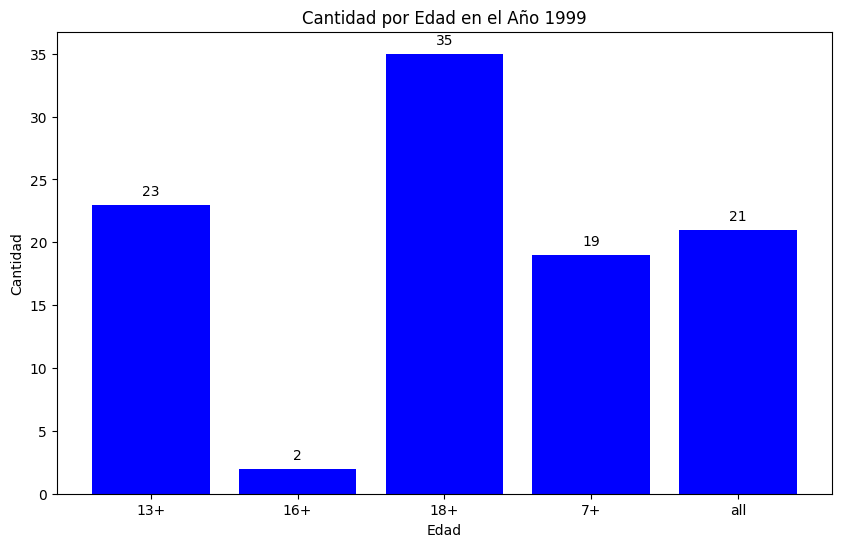

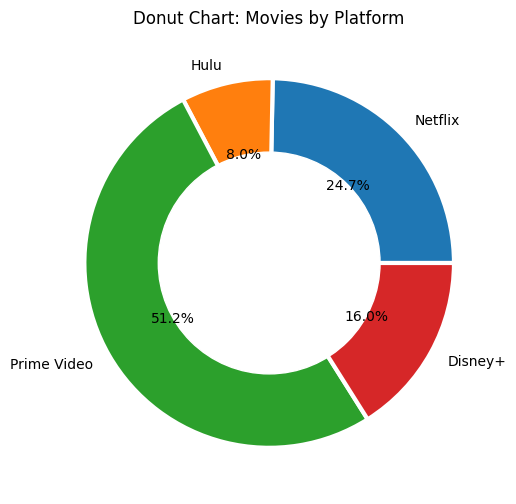

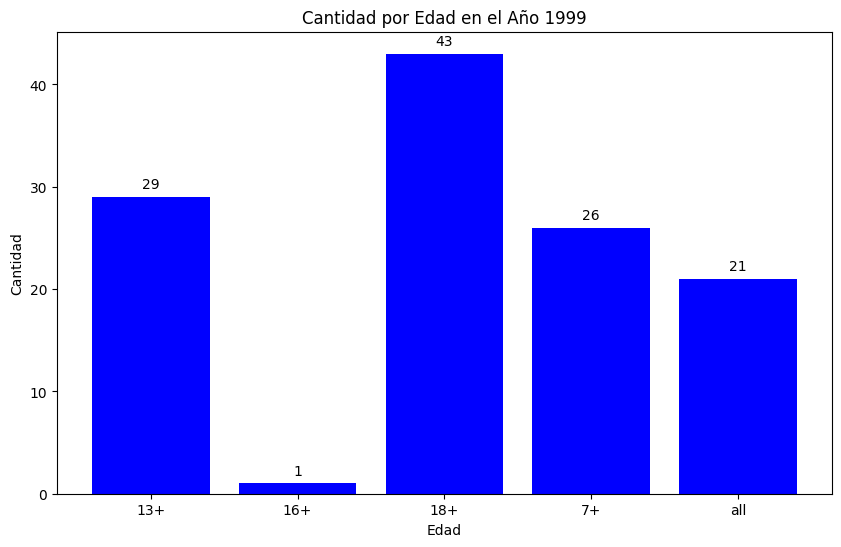

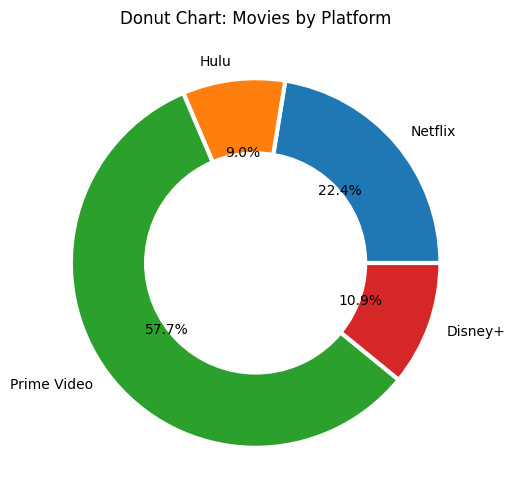

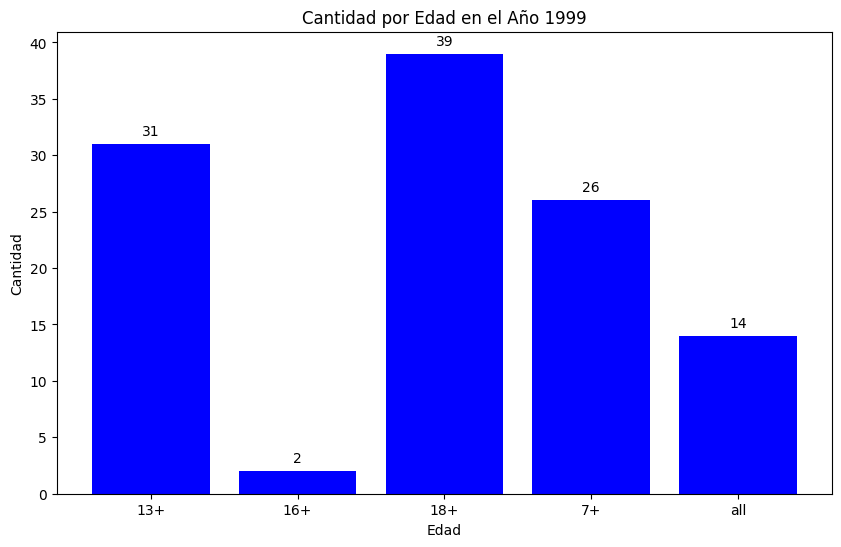

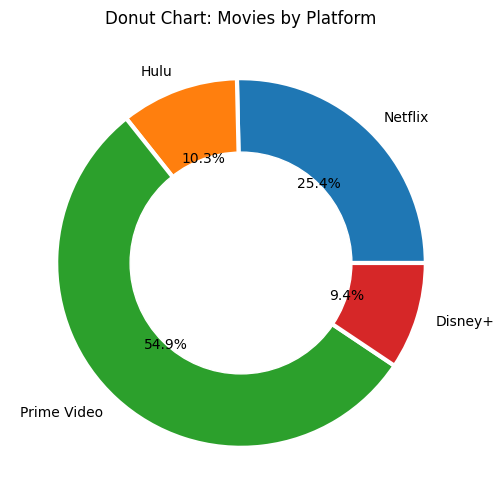

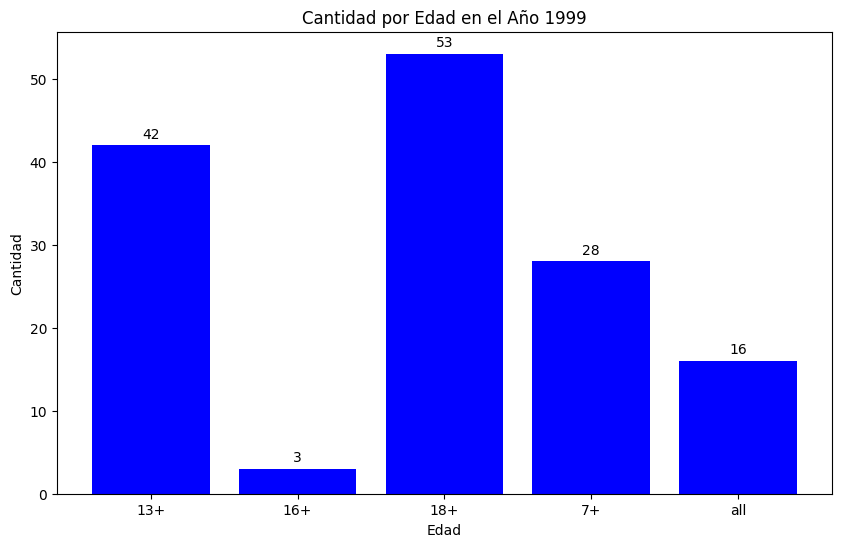

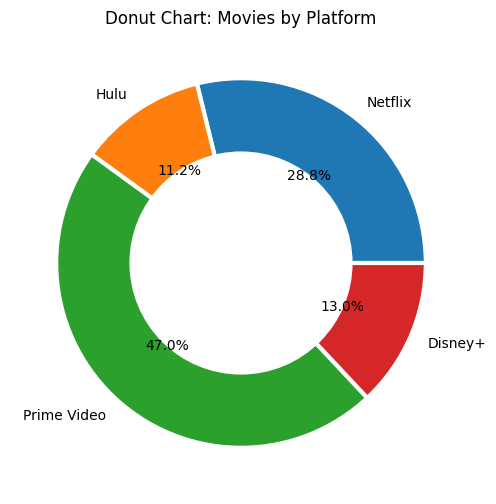

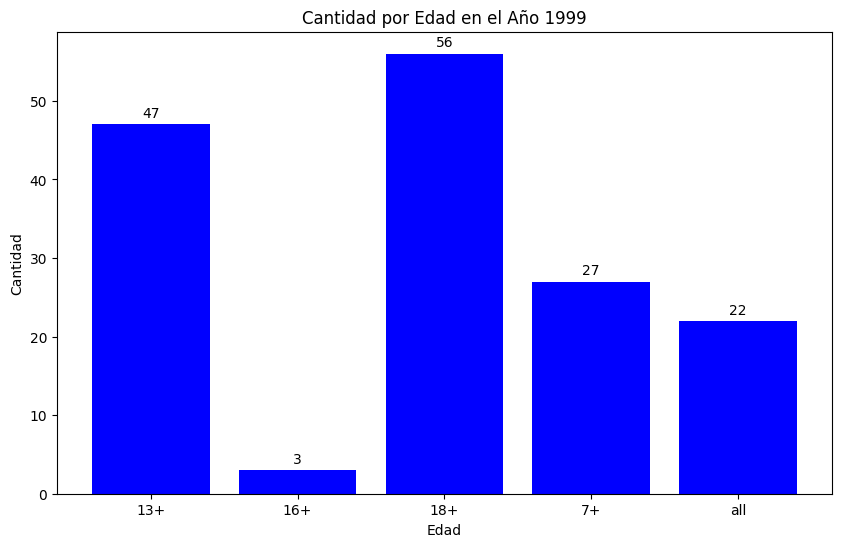

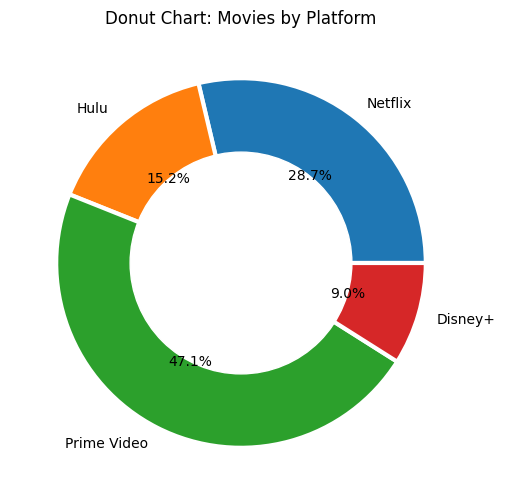

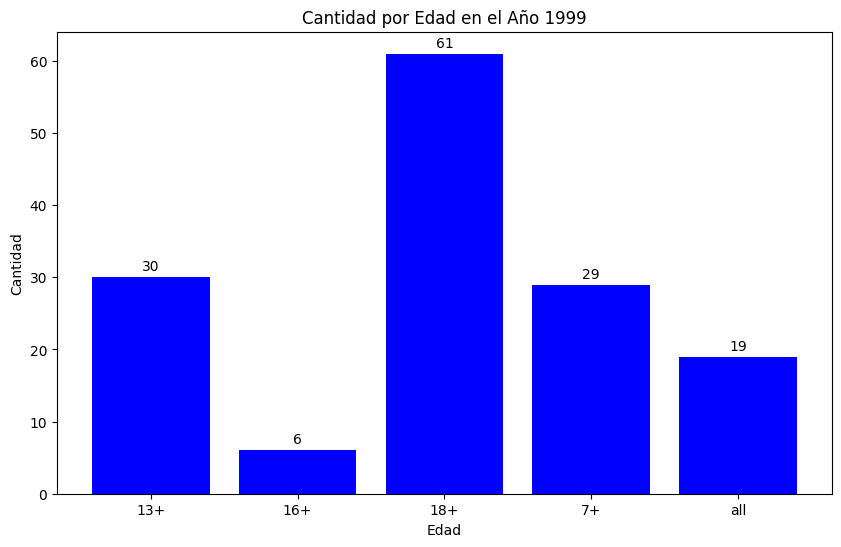

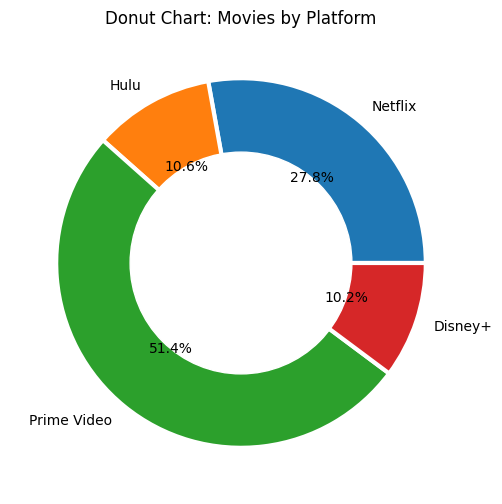

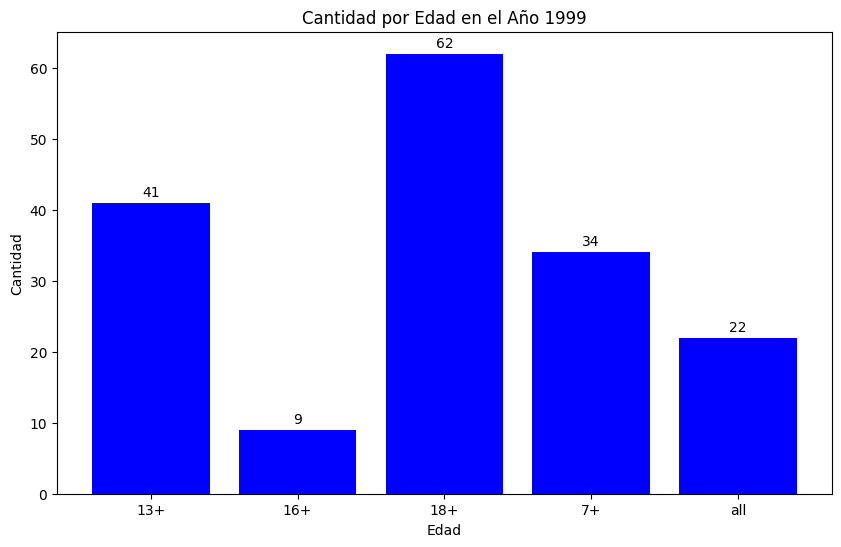

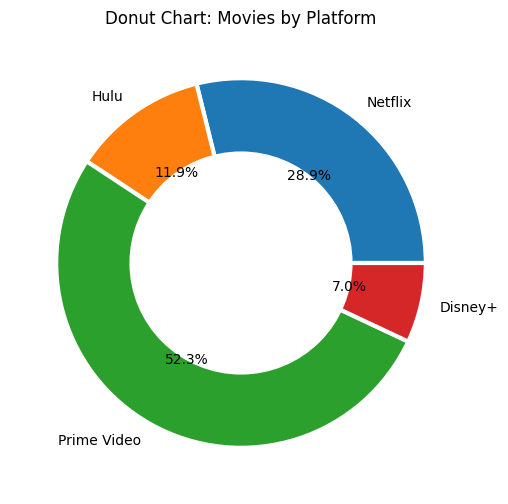

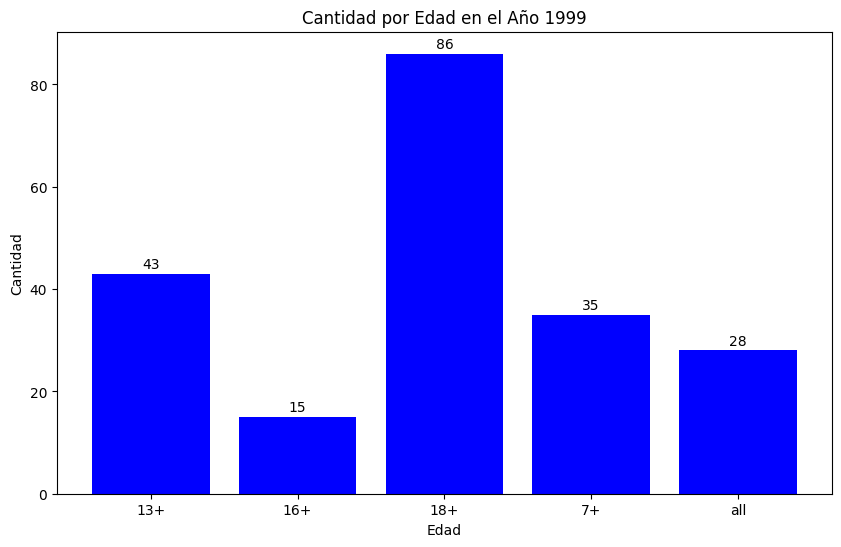

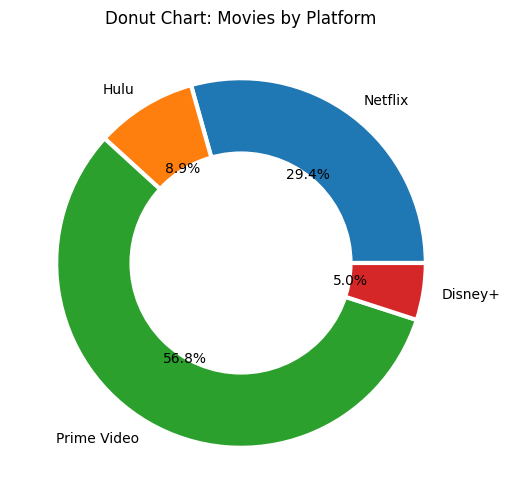

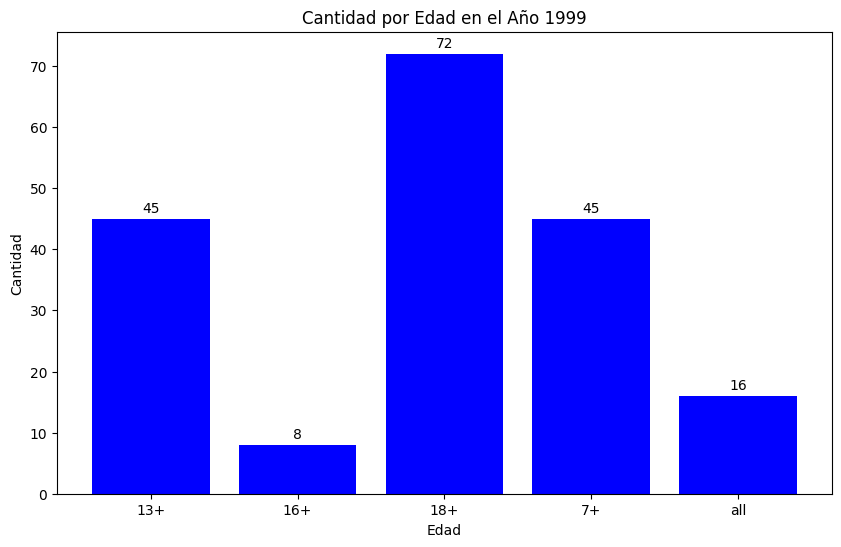

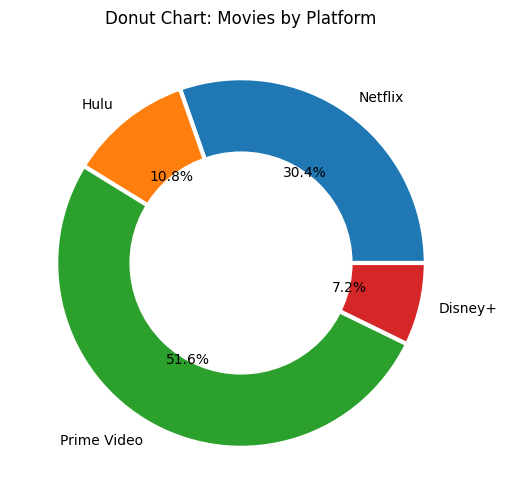

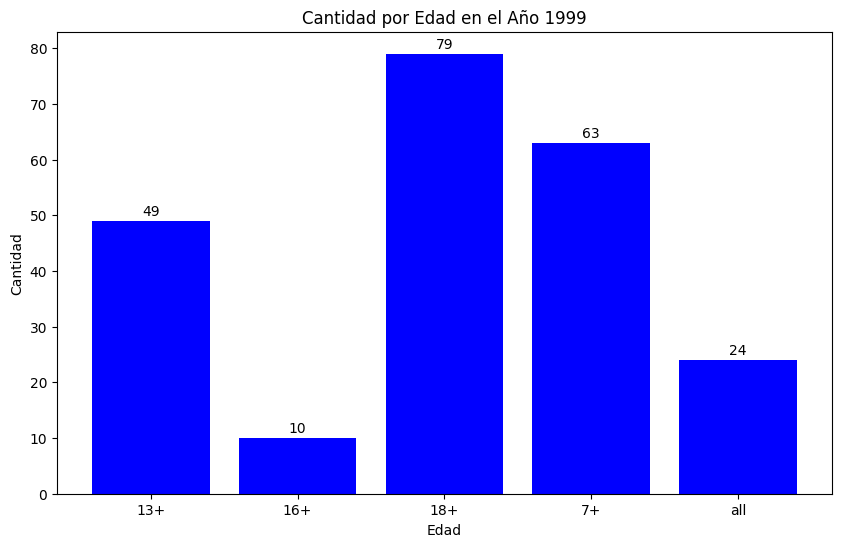

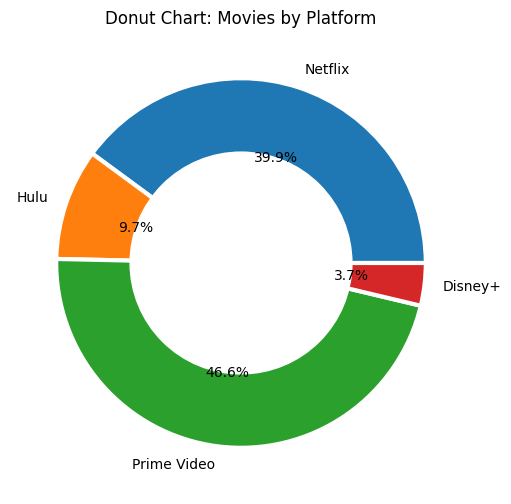

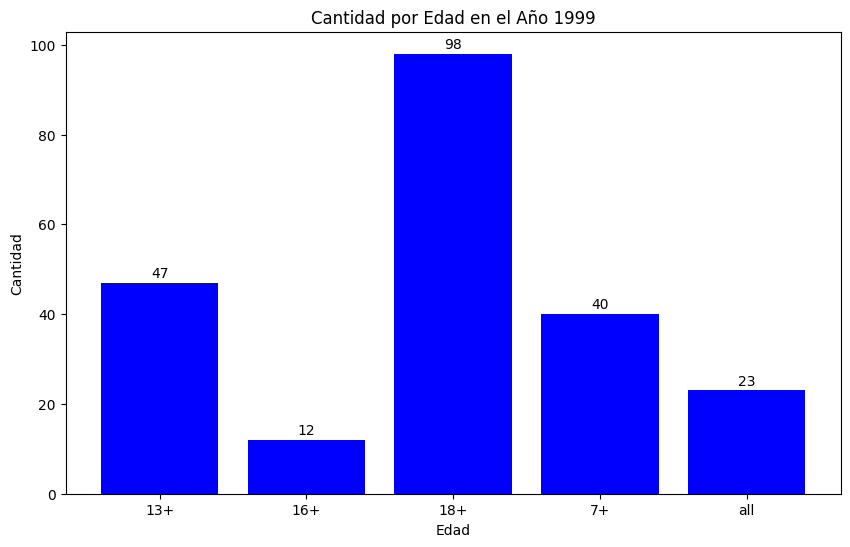

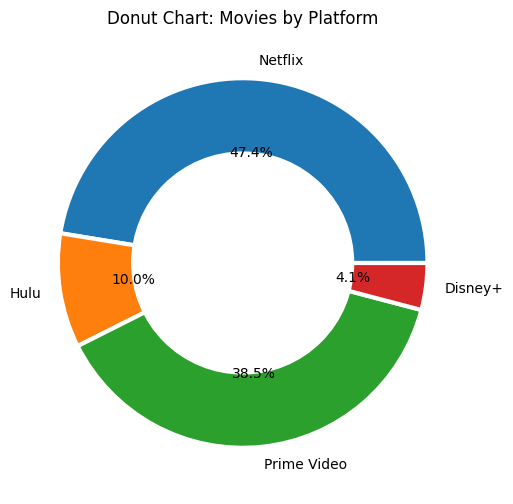

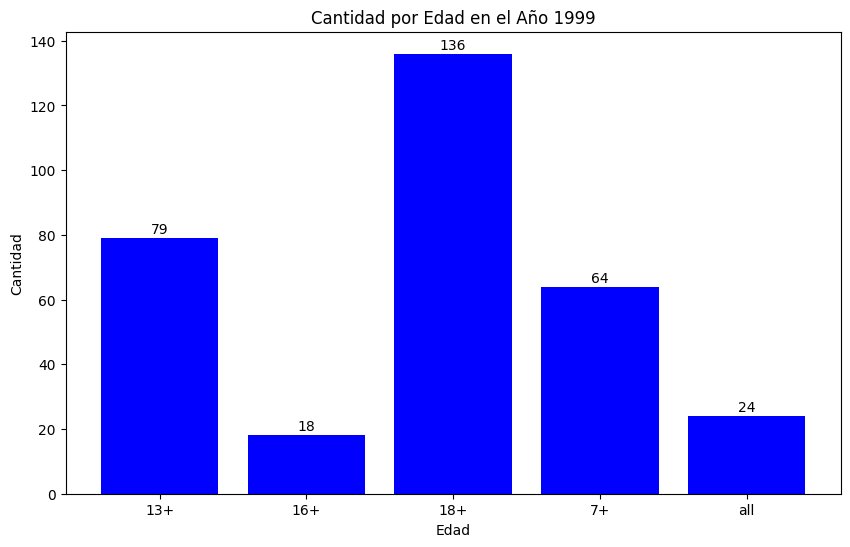

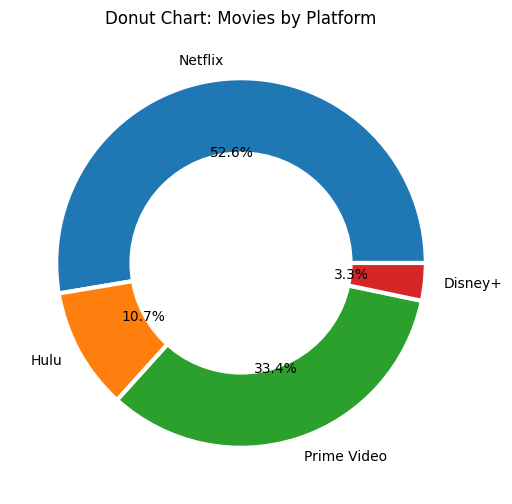

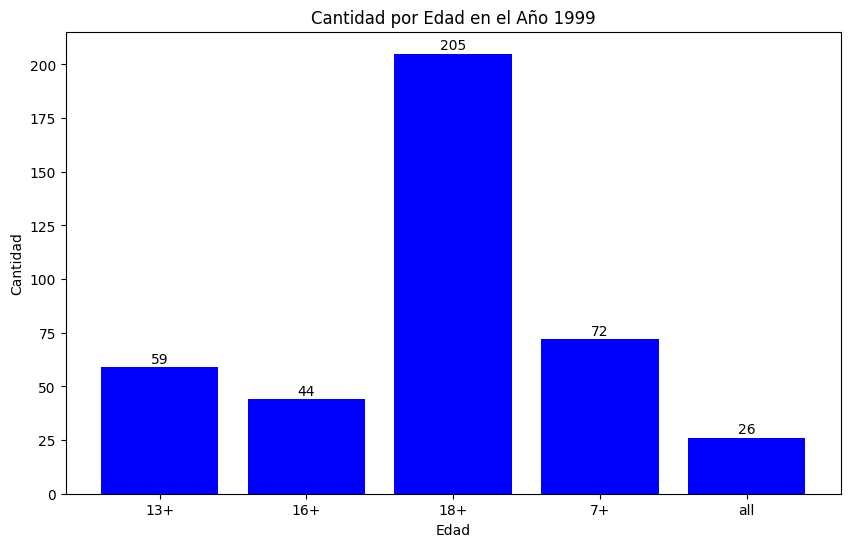

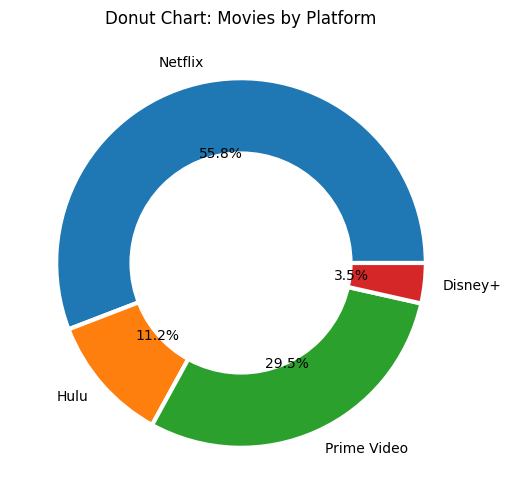

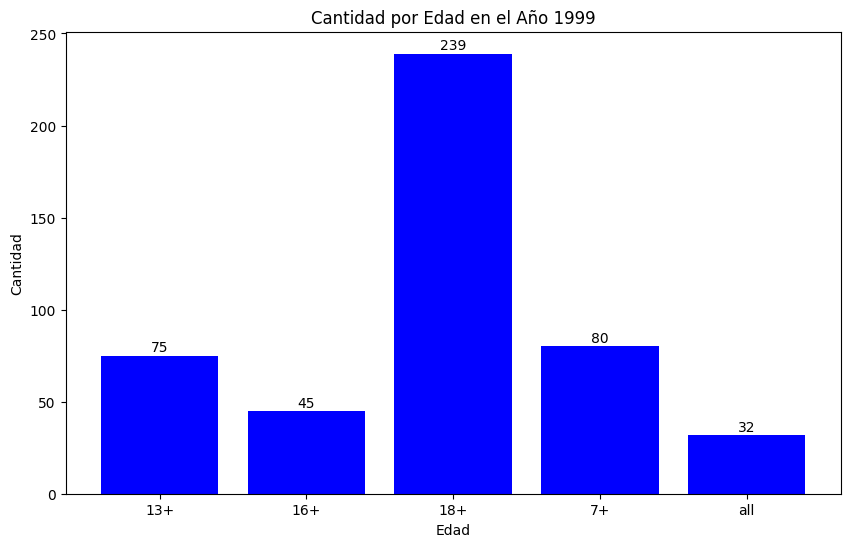

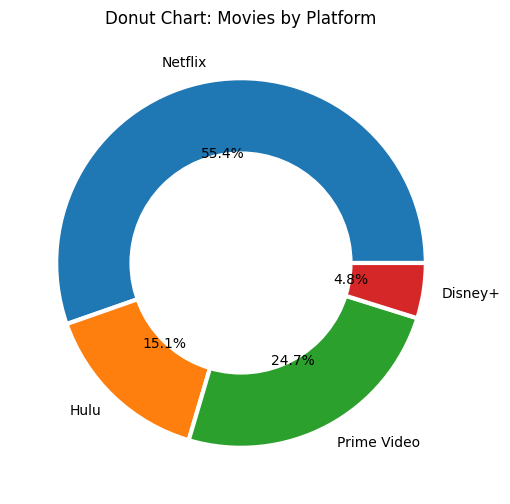

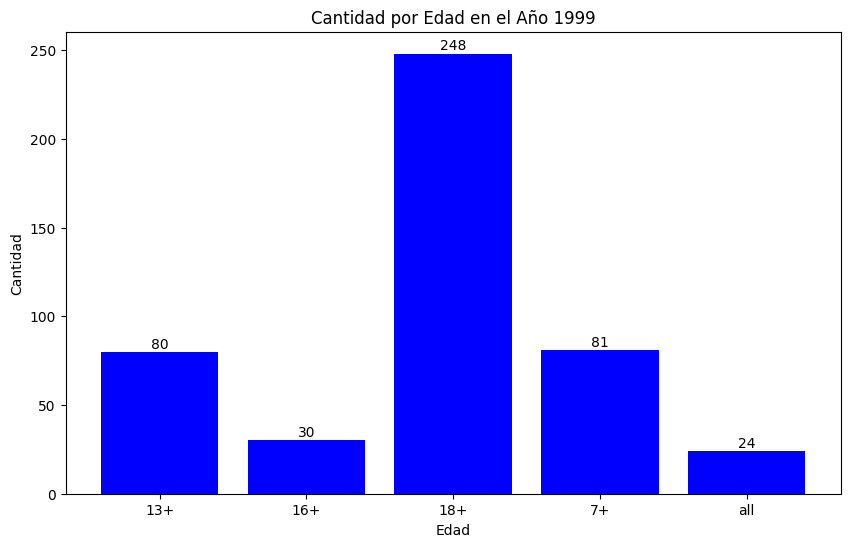

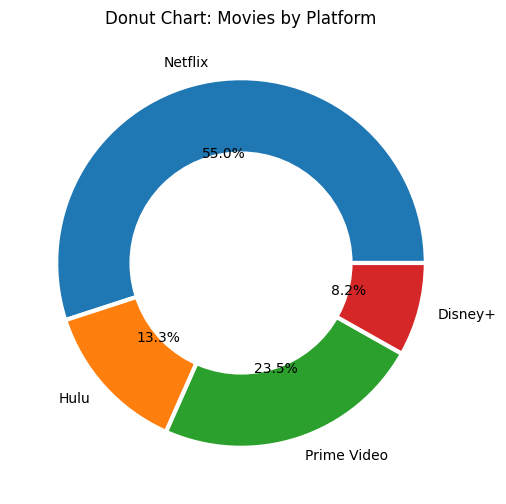

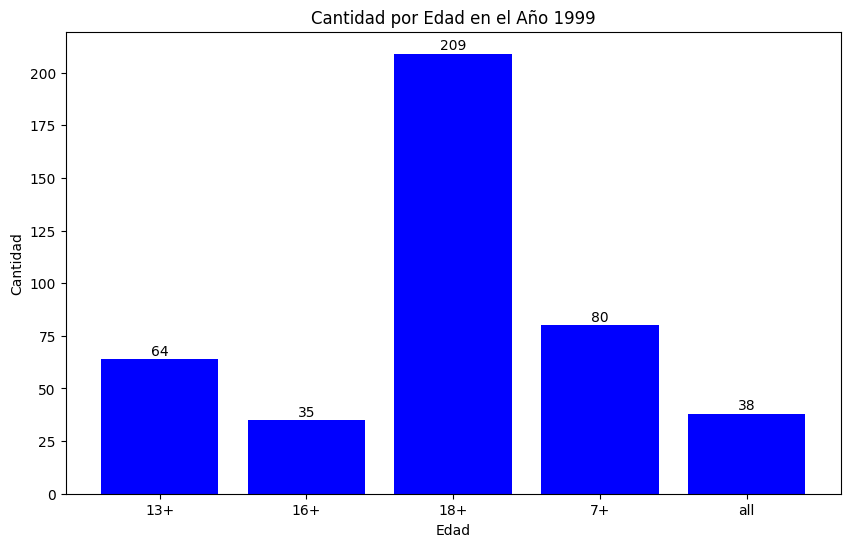

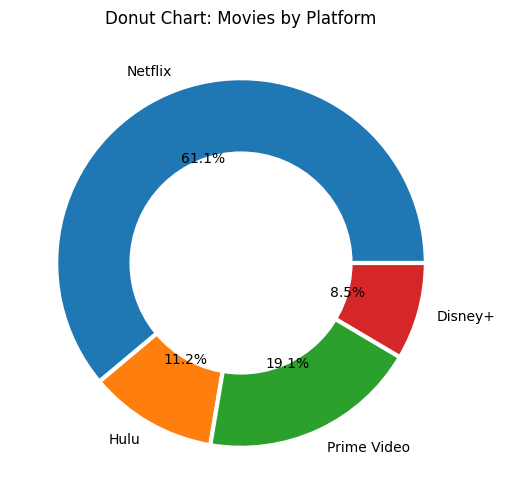

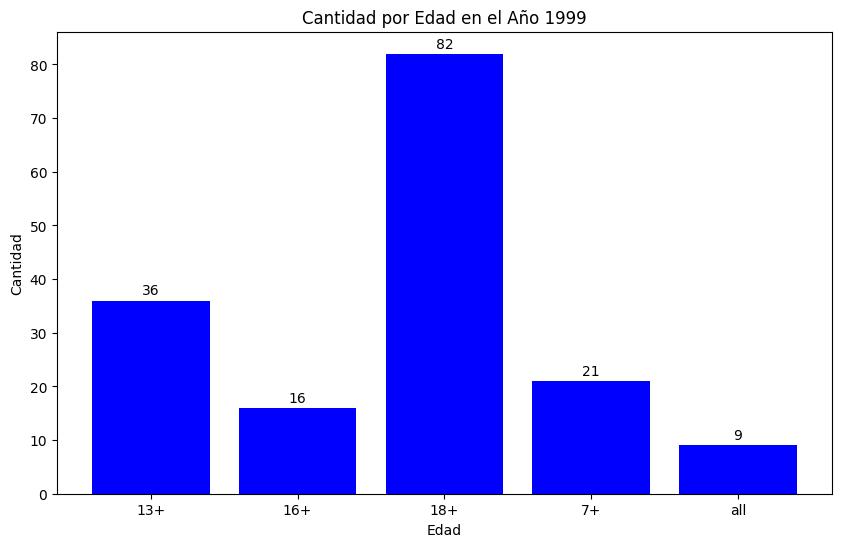

In [47]:
pdf = PDFWithBackground()
pdf.set_background('images/background.png')

pdf.add_page()

pdf.set_y(100)
pdf.set_font('Courier',style='B',size=57)
pdf.cell(0,0,'Reporte',0,1,'C')

pdf.set_y(125)
pdf.set_font('Courier',style='B',size=57)
pdf.cell(0,0,'automático en',0,1,'C')

pdf.set_y(150)
pdf.set_font('Courier',style='B',size=57)
pdf.cell(0,0,'Python',0,1,'C')

pdf.set_y(170)
pdf.set_font('Courier',size=27)
pdf.cell(0,0,'Curso de Python',0,1,'C')

pdf.set_y(180)
pdf.set_font('Courier',size=17)
pdf.cell(0,0,'Desde aspectos básicos hasta aplicaciones analíticas',0,1,'C')

pdf.add_page()

pdf.set_y(45)
pdf.set_font('Courier',style='B',size=27)   # Arial, Times, Courier
pdf.cell(0,0,'Mi primer reporte',0,1,'R')

pdf.set_y(54)
pdf.set_font('Courier',size=14)   # Arial, Times, Courier
pdf.cell(0,0,'Desarrollado netamente con python :D',0,1,'R')

pdf.set_y(75)
pdf.set_font('Courier','B',size=20)   # Arial, Times, Courier
pdf.cell(0,0,'Reporte general por años y edades permitidas',0,1,'R')

imagen = 'visualization.png'
pdf.image(f'images/{imagen}',x=15,y=83,w=190,h=65)


pdf.set_y(155)
pdf.set_font('Courier',size=15) 
pdf.multi_cell(190,6,'Este reporte presenta un análisis de películas lanzadas en años recientes, clasificadas por edad permitida. Explora tendencias en producción cinematográfica y cómo las clasificaciones de edad impactan la distribución y recepción de películas. Se discuten estadísticas clave y cambios en las preferencias del público, ofreciendo una visión clara de la relación entre el cine y su audiencia objetivo.',0,1,'L')

years = [i for i in range(1914,2022)]
for year in years:
    try:
        dona_grafico(year)
        histograma_grafico(year)
        pdf.add_page()

        pdf.set_y(45)
        pdf.set_font('Courier',style='B',size=23)   # Arial, Times, Courier
        pdf.cell(0,0,f'Reporte del año {year}',0,1,'R')

        pdf.image(f'images/donuts_platform_year_{year}.png',x=15,y=63,w=90,h=90)
        pdf.image(f'images/histogram_age_year_{year}.png',x=15,y=143,w=90,h=65)

        pdf.set_y(103)
        pdf.set_font('Courier',size=13)   # Arial, Times, Courier
        pdf.cell(0,0,f'Peliculas por plataforma {year}',0,1,'R')

        pdf.set_y(178)
        pdf.set_font('Courier',size=13)   # Arial, Times, Courier
        pdf.cell(0,0,f'Edades permitidas por pelicula {year}',0,1,'R')
    except:
        print(f'El año {year} no se encuentra en la base')
pdf.output("reports/Mi_Primer_PDF.pdf")

# Criterios de projecto Final
### Entrega: 8 de Mayo

Requerimientos:
* Descargar o obtener un dataset de su interes
* Tiene que ser una aplicación desarrollada en streamlit
* Tiene que poder generar un reporte en PDF y poder descargarlo desde la aplicación
* Tiene que poder generar un reporte en Excel y poder descargao desde la aplicación
* Tiene que tener gráficos interactivos (Dashboard) (Filtros dependiendo de la data)

Pueden escribirme en el caso que necesiten ayuda con el proyecto o solicitar una pequeña tutoria para revisar dudas o a su vez planificar el proyecto

# Reportes Personalizados en Excel 

In [64]:
edades_permitidas(2010)

Age  Amount
0  13+      30
1  16+       6
2  18+      61
3   7+      29
4  all      19

In [75]:
plataforma(2010)

Netflix         64
Hulu            34
Prime Video    105
Disney+         20
dtype: int64

In [76]:
from openpyxl import Workbook
from openpyxl.styles import Font, Color, Alignment, PatternFill, Border
from openpyxl.drawing.image import Image

# Crear un nuevo libro y seleccionar la hoja activa
wb = Workbook()
ws = wb.active

year = 2010

# Añadir texto a una celda
ws['E1'] = f"Reporte Personalizado {year}"

# Establecer fuente, tamaño y color
ws['E1'].font = Font(name='Amercian Typewriter',size=20,bold=True,italic=True,color='FFFFFF')

# Ajustar el tamaño de la celda 
ws.row_dimensions[1].height = 30
ws.column_dimensions['E'].width = 60

# Alinear el texto
ws['E1'].alignment = Alignment(horizontal='center',vertical='center')

# Aplicar un color de fondo a una celda
ws['E1'].fill = PatternFill(start_color='050505',end_color='050505',fill_type='solid')

img = Image(f'images/donuts_platform_year_{year}.png')
ws.add_image(img,'A4')

img = Image(f'images/histogram_age_year_{year}.png')
ws.add_image(img,'F4')

plataformas = ['Netflix','Hulu','Prime Video','Disney+']
valores = plataforma(year)
edades = edades_permitidas(year)
aux = 0
for i in range(35,39):
    ws[f'C{str(i)}'] = plataformas[aux]
    ws[f'C{str(i)}'].font = Font(name='Amercian Typewriter',size=12,bold=True,italic=True,color='050505')
    ws[f'D{str(i)}'] = valores[plataformas[aux]]
    aux +=1

aux = 0
for i in range(35,39):
    ws[f'L{str(i)}'] = edades.iloc[aux]['Age']
    ws[f'L{str(i)}'].font = Font(name='Amercian Typewriter',size=12,bold=True,italic=True,color='050505')
    ws[f'M{str(i)}'] = edades.iloc[aux]['Amount']
    aux +=1
    
# Guaradar el libro de trabajo
wb.save('reporte_personalizado.xlsx')
